In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rdkit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

import torch
from torch import nn

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Katritch Lab/ChEMBL Activity Data/5HT1A_Human.csv')
df.head()

,chk,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,...,standard_text_value,standard_upper_value,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,0,CHEMBL51457,C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]...,369.2,3.368,2,4,1,0.0,0.36,...,NaN,NaN,9606,NaN,NaN,pKi,NaN,UO_0000065,NaN,0.36
1,0,CHEMBL457890,COc1cccc(CCc2ccccc2OCCCCCN2CCN(CC2)c2cccc(c2)[...,492.3,7.501,12,3,0,1.0,<2.30103,...,NaN,NaN,9606,NaN,NaN,Ki,uM,UO_0000065,NaN,5000.00
2,0,CHEMBL459158,COc1cccc(CCc2ccccc2OCCCCN2CCN(CC2)c2cccc(c2)C(...,512.3,7.223,12,3,0,1.0,<2.30103,...,NaN,NaN,9606,NaN,NaN,Ki,uM,UO_0000065,NaN,5000.00
3,0,CHEMBL458991,COc1cccc(CCc2ccccc2OCCCCCN2CCN(CC2)c2ccccc2OC)c1,488.3,6.918,13,4,0,1.0,<2.30103,...,NaN,NaN,9606,NaN,NaN,Ki,uM,UO_0000065,NaN,5000.00
4,0,CHEMBL456673,COc1cccc(CCc2ccccc2OCCCCN2CCN(CC2)c2ccc(cc2)F)c1,462.3,6.572,11,3,0,1.0,<2.30103,...,NaN,NaN,9606,NaN,NaN,Ki,uM,UO_0000065,NaN,5000.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   chk                        11477 non-null  int64  
 1   molecule_pref_name         11477 non-null  object 
 2   mol                        11470 non-null  object 
 3   molWeight                  11477 non-null  float64
 4   molLogP                    11477 non-null  float64
 5   nof_RotB                   11477 non-null  int64  
 6   nof_HBA                    11477 non-null  int64  
 7   nof_HBD                    11477 non-null  int64  
 8   molCharge_total            11477 non-null  float64
 9   pAct                       7580 non-null   object 
 10  Uniprot_ID                 11477 non-null  object 
 11  target_pref_name           11477 non-null  object 
 12  confidence_score           11477 non-null  int64  
 13  target_type                11477 non-null  obj

In [ ]:
important_columns = ['molecule_pref_name', 'mol', 'molWeight', 'molLogP', 'nof_RotB', 'nof_HBA', 'nof_HBD',
                     'molCharge_total', 'pAct', 'standard_type', 'relation', 'standard_value', 'standard_units',
                     'assay_type', 'document_year']

In [ ]:
df_masked = df[important_columns]
df_masked.head()

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,relation,standard_value,standard_units,assay_type,document_year
0,CHEMBL51457,C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]...,369.2,3.368,2,4,1,0.0,0.36,Ki,=,436500000.0,nM,B,2012
1,CHEMBL457890,COc1cccc(CCc2ccccc2OCCCCCN2CCN(CC2)c2cccc(c2)[...,492.3,7.501,12,3,0,1.0,<2.30103,Ki,>,5000000.0,nM,B,2008
2,CHEMBL459158,COc1cccc(CCc2ccccc2OCCCCN2CCN(CC2)c2cccc(c2)C(...,512.3,7.223,12,3,0,1.0,<2.30103,Ki,>,5000000.0,nM,B,2008
3,CHEMBL458991,COc1cccc(CCc2ccccc2OCCCCCN2CCN(CC2)c2ccccc2OC)c1,488.3,6.918,13,4,0,1.0,<2.30103,Ki,>,5000000.0,nM,B,2008
4,CHEMBL456673,COc1cccc(CCc2ccccc2OCCCCN2CCN(CC2)c2ccc(cc2)F)c1,462.3,6.572,11,3,0,1.0,<2.30103,Ki,>,5000000.0,nM,B,2008


In [ ]:
df_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  11477 non-null  object 
 1   mol                 11470 non-null  object 
 2   molWeight           11477 non-null  float64
 3   molLogP             11477 non-null  float64
 4   nof_RotB            11477 non-null  int64  
 5   nof_HBA             11477 non-null  int64  
 6   nof_HBD             11477 non-null  int64  
 7   molCharge_total     11477 non-null  float64
 8   pAct                7580 non-null   object 
 9   standard_type       11475 non-null  object 
 10  relation            10405 non-null  object 
 11  standard_value      10613 non-null  float64
 12  standard_units      9949 non-null   object 
 13  assay_type          11477 non-null  object 
 14  document_year       11477 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 1.3+

In [ ]:
#Aminergic receptor dictionaries by family
receptor_list_serotonin = {'5HT1A': 'placeholder', '5HT1B': 'placeholder', '5HT1D': 'placeholder', '5HT2A': 'placeholder',
                           '5HT2B': 'placeholder', '5HT2C': 'placeholder', '5HT4R': 'placeholder', '5HT5A': 'placeholder',
                           '5HT6R': 'placeholder', '5HT7R': 'placeholder', '5HT1E': 'placeholder', '5HT1F': 'placeholder'
                           }

receptor_list_muscarinic = {'ACM1': 'placeholder', 'ACM2': 'placeholder', 'ACM3': 'placeholder', 'ACM4': 'placeholder',
                            'ACM5': 'placeholder'}

receptor_list_histamine = {'HRH1': 'placeholder', 'HRH2': 'placeholder', 'HRH3': 'placeholder', 'HRH4': 'placeholder'}

receptor_list_dopamine = {'DRD1': 'placeholder', 'DRD2': 'placeholder', 'DRD3': 'placeholder', 'DRD4': 'placeholder',
                          'DRD5': 'placeholder'}

receptor_list_adrenoceptors = {'ADA1A': 'placeholder', 'ADA1B': 'placeholder', 'ADA1D': 'placeholder', 'ADA2A': 'placeholder',
                               'ADA2B': 'placeholder', 'ADA2C': 'placeholder', 'ADRB1': 'placeholder', 'ADRB2': 'placeholder',
                               'ADRB3': 'placeholder'}

In [ ]:
important_columns = ['molecule_pref_name', 'mol', 'molWeight', 'molLogP', 'nof_RotB', 'nof_HBA', 'nof_HBD',
                     'molCharge_total', 'pAct', 'standard_type', #'relation', 'standard_value', 'standard_units',
                     'assay_type', 'document_year']

In [ ]:
#Importing the serotonin receptor data, dropping empty columns, renaming columns
for i in range(len(receptor_list_serotonin.keys())):
  keys = list(receptor_list_serotonin.keys())

  file_path = '/content/drive/MyDrive/Katritch Lab/ChEMBL Activity Data/{}_Human.csv'.format(list(receptor_list_serotonin.keys())[i])
  receptor_list_serotonin[keys[i]] = pd.read_csv(file_path)
  receptor_list_serotonin[keys[i]] = receptor_list_serotonin[keys[i]][important_columns]

for receptor in receptor_list_serotonin.keys():
  receptor_list_serotonin[receptor]['Receptor Family'] = 'Serotonin'
  receptor_list_serotonin[receptor]['Receptor'] = receptor

In [ ]:
#Importing the muscarinic receptor data, dropping empty columns, renaming columns
for i in range(len(receptor_list_muscarinic.keys())):
  keys = list(receptor_list_muscarinic.keys())

  file_path = '/content/drive/MyDrive/Katritch Lab/ChEMBL Activity Data/{}_Human.csv'.format(list(receptor_list_muscarinic.keys())[i])
  receptor_list_muscarinic[keys[i]] = pd.read_csv(file_path)
  receptor_list_muscarinic[keys[i]] = receptor_list_muscarinic[keys[i]][important_columns]

for receptor in receptor_list_muscarinic.keys():
  receptor_list_muscarinic[receptor]['Receptor Family'] = 'Muscarinic'
  receptor_list_muscarinic[receptor]['Receptor'] = receptor

In [ ]:
#Importing the histamine receptor data, dropping empty columns, renaming columns
for i in range(len(receptor_list_histamine.keys())):
  keys = list(receptor_list_histamine.keys())

  file_path = '/content/drive/MyDrive/Katritch Lab/ChEMBL Activity Data/{}_Human.csv'.format(list(receptor_list_histamine.keys())[i])
  receptor_list_histamine[keys[i]] = pd.read_csv(file_path)
  receptor_list_histamine[keys[i]] = receptor_list_histamine[keys[i]][important_columns]

for receptor in receptor_list_histamine.keys():
  receptor_list_histamine[receptor]['Receptor Family'] = 'Histamine'
  receptor_list_histamine[receptor]['Receptor'] = receptor

In [ ]:
#Importing the dopamine receptor data, dropping empty columns, renaming columns
for i in range(len(receptor_list_dopamine.keys())):
  keys = list(receptor_list_dopamine.keys())

  file_path = '/content/drive/MyDrive/Katritch Lab/ChEMBL Activity Data/{}_Human.csv'.format(list(receptor_list_dopamine.keys())[i])
  receptor_list_dopamine[keys[i]] = pd.read_csv(file_path)
  receptor_list_dopamine[keys[i]] = receptor_list_dopamine[keys[i]][important_columns]

for receptor in receptor_list_dopamine.keys():
  receptor_list_dopamine[receptor]['Receptor Family'] = 'Dopamine'
  receptor_list_dopamine[receptor]['Receptor'] = receptor

<ipython-input-10-bedba0594231>:6: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  receptor_list_dopamine[keys[i]] = pd.read_csv(file_path)


In [ ]:
#Importing the adrenoceptor data, dropping empty columns, renaming columns
for i in range(len(receptor_list_adrenoceptors.keys())):
  keys = list(receptor_list_adrenoceptors.keys())

  file_path = '/content/drive/MyDrive/Katritch Lab/ChEMBL Activity Data/{}_Human.csv'.format(list(receptor_list_adrenoceptors.keys())[i])
  receptor_list_adrenoceptors[keys[i]] = pd.read_csv(file_path)
  receptor_list_adrenoceptors[keys[i]] = receptor_list_adrenoceptors[keys[i]][important_columns]

for receptor in receptor_list_adrenoceptors.keys():
  receptor_list_adrenoceptors[receptor]['Receptor Family'] = 'Adrenoceptors'
  receptor_list_adrenoceptors[receptor]['Receptor'] = receptor

In [ ]:
#Displaying the dataframes to make sure they are correct
from IPython.display import display

for receptor in receptor_list_adrenoceptors.values():
  display(receptor.head())

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,CHEMBL145843,CC1=C(C(c2ccc(c(c2)F)F)N(C(NCCCN2CCN(CC2)c2ccc...,572.2,4.115,11,12,2,0,11.,Ki,B,1999,Adrenoceptors,ADA1A
1,CHEMBL145547,CC1=C(C(c2ccc(c(c2)F)F)N(C(NCCCN2CCN(C[C@@H]2C...,586.2,4.214,11,12,2,0,10.7,Ki,B,1999,Adrenoceptors,ADA1A
2,MAZAPERTINE,CC(C)Oc1ccccc1N1CCN(CC1)Cc1cccc(c1)C(N1CCCCC1)=O,421.3,3.935,7,4,0,0,10.7,Ki,B,2008,Adrenoceptors,ADA1A
3,TAMSULOSIN,CCOc1ccccc1OCCN[C@H](C)Cc1ccc(c(c1)S(N)(=O)=O)OC,408.2,2.413,11,9,3,1,10.54,Ki,B,1997,Adrenoceptors,ADA1A
4,SILODOSIN,C[C@H](Cc1cc2CCN(CCCO)c2c(c1)C(N)=O)NCCOc1cccc...,495.2,2.903,14,6,4,1,10.44,Ki,B,2005,Adrenoceptors,ADA1A


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,PRAZOSIN,COc1cc2c(N)nc(nc2cc1OC)N1CCN(CC1)C(c1ccco1)=O,383.2,1.824,5,7,2,1,11.4,Kb,F,2018,Adrenoceptors,ADA1B
1,CHEMBL25554,COc1cccc(c1OCCNCC1COc2ccccc2O1)OC,345.2,2.471,8,6,1,1,10.42,Ki,B,2020,Adrenoceptors,ADA1B
2,CHEMBL42472,COc1cccc(c1OCCNC[C@@H]1C[C@H](c2ccccc2)c2ccccc...,419.2,4.417,9,5,1,1,10.4,Ki,B,2002,Adrenoceptors,ADA1B
3,CHEMBL342062,COc1cc2c(N)nc(nc2cc1OC)N1CCN(C(c2ccco2)=O)[C@@...,437.2,2.479,5,7,2,1,10.15,Ki,B,2018,Adrenoceptors,ADA1B
4,ABANOQUIL,COc1cc2CCN(Cc2cc1OC)c1cc(c2cc(c(cc2n1)OC)OC)N,395.2,3.458,5,5,2,1,10.1,Ki,B,1995,Adrenoceptors,ADA1B


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,DEXMEDETOMIDINE,Cc1cccc(c1C)[C@H](C)c1c[nH]cn1,200.1,3.386,2,1,1,0.0,10.82,Ki,B,2001,Adrenoceptors,ADA1D
1,PRAZOSIN,COc1cc2c(N)nc(nc2cc1OC)N1CCN(CC1)C(c1ccco1)=O,383.2,1.824,5,7,2,1.0,10.6,Kb,F,2018,Adrenoceptors,ADA1D
2,CLOPENPHENDIOXAN,COc1cccc(c1OCCNCCOc1ccccc1OCc1ccc(cc1)[Cl])OC,457.2,4.636,13,6,1,1.0,10.5,Ki,B,2005,Adrenoceptors,ADA1D
3,CHEMBL4128084,COc1cc2c(N)nc(nc2cc1OC)N1CCN(C(=O)OCc2ccccc2)[...,477.2,3.982,7,7,2,1.0,10.4,Ki,B,2018,Adrenoceptors,ADA1D
4,ABANOQUIL,COc1cc2CCN(Cc2cc1OC)c1cc(c2cc(c(cc2n1)OC)OC)N,395.2,3.458,5,5,2,1.0,10.4,Ki,B,1995,Adrenoceptors,ADA1D


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,CHEMBL1256414,C1c2ccccc2[C@H]2C[C@@]12c1c[nH]cn1,196.1,2.5210,1,1,1,1.0,10.55,Ki,B,2010,Adrenoceptors,ADA2A
1,CHEMBL4482861,CCOP(C1(C2C(C=N1)C(N(C2=O)c1ccccc1)=O)c1ccccc1...,426.1,1.5050,7,9,0,-1.0,10.38,Ki,B,2020,Adrenoceptors,ADA2A
2,CHEMBL4536304,CCOP(C1C2C(C=N1)C(N(C2=O)c1ccc(cc1)OC)=O)(=O)OCC,380.1,0.2657,7,10,0,-1.0,10.27,Ki,B,2020,Adrenoceptors,ADA2A
3,CHEMBL4438801,CCOP(C1(C2C(C=N1)C(N(C2=O)c1cccc(c1)[N+]([O-])...,471.1,1.5020,8,13,0,-1.0,10.18,Ki,B,2020,Adrenoceptors,ADA2A
4,CHEMBL1256414,C1c2ccccc2[C@H]2C[C@@]12c1c[nH]cn1,196.1,2.5210,1,1,1,1.0,10.16,Ki,B,2010,Adrenoceptors,ADA2A


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,CHEMBL1256414,C1c2ccccc2[C@H]2C[C@@]12c1c[nH]cn1,196.1,2.521,1,1,1,1.0,9.96,Ki,B,2010,Adrenoceptors,ADA2B
1,CHEMBL1256414,C1c2ccccc2[C@H]2C[C@@]12c1c[nH]cn1,196.1,2.521,1,1,1,1.0,9.94,Ki,B,2010,Adrenoceptors,ADA2B
2,CHEMBL1255723,CC[C@H]1[C@@H]2c3ccccc3C[C@]12c1c[nH]cn1,224.1,3.677,2,1,1,1.0,9.74,Ki,B,2010,Adrenoceptors,ADA2B
3,CHEMBL1256378,C[C@H]1[C@@H]2c3ccccc3C[C@]12c1c[nH]cn1,210.1,3.016,1,1,1,1.0,9.69,Ki,B,2010,Adrenoceptors,ADA2B
4,LISURIDE,CCN(CC)C(N[C@@H]1CN(C)[C@@H]2Cc3c[nH]c4cccc(C2...,338.2,2.789,5,3,2,0.0,9.625,Ki,B,0,Adrenoceptors,ADA2B


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,CHEMBL5199693,C1C[C@@H](CN(C1)C[C@H]1COc2ccccc2O1)n1cnc2ccccc12,349.2,2.961,3,4,0,0.0,11.,Kb,F,2022,Adrenoceptors,ADA2C
1,CHEMBL5202684,C1C[C@@H](CN(C1)C[C@H]1COc2ccccc2O1)N1CC(c2ccc...,393.2,3.008,4,5,1,0.0,11.,Kb,F,2022,Adrenoceptors,ADA2C
2,CHEMBL5176375,CC1(C)CN(C(N1)=O)[C@H]1CCCN(C1)C[C@H]1COc2cccc...,345.2,2.085,3,5,1,0.0,11.,Kb,F,2022,Adrenoceptors,ADA2C
3,CHEMBL5191398,C1C[C@@H](CN(C1)C[C@H]1COc2ccccc2O1)N1C(C(c2cc...,408.2,2.418,4,8,0,0.0,11.,Kb,F,2022,Adrenoceptors,ADA2C
4,CHEMBL5204741,CC1(C)C(N(C(N1)=O)[C@H]1CCCN(C1)C[C@H]1COc2ccc...,359.2,1.371,3,7,1,0.0,11.,Kb,F,2022,Adrenoceptors,ADA2C


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,CHEMBL2012522,CC(C)(Cc1ccc(cc1)Oc1ccc(cn1)C(N)=O)NC[C@@H](CO...,642.3,3.601,14,13,7,-1.0,10.64,Ki,B,2011,Adrenoceptors,ADRB1
1,CHEMBL2011218,C(CNC(Nc1cccc(c1)OCCF)=O)NC[C@@H](COc1ccccc1C#N)O,416.2,1.764,15,7,4,1.0,10.4,IC50,B,2011,Adrenoceptors,ADRB1
2,CHEMBL2011226,C(CNC(Nc1ccc(nc1)I)=O)NC[C@@H](COc1ccccc1C#N)O,481.1,1.907,12,7,4,1.0,10.3,IC50,B,2011,Adrenoceptors,ADRB1
3,CHEMBL2011227,C(CNC(Nc1ccc(nc1)[Br])=O)NC[C@@H](COc1ccccc1C#N)O,433.1,1.658,12,7,4,1.0,10.3,IC50,B,2011,Adrenoceptors,ADRB1
4,CHEMBL4860528,CCCCCNC(N=C(N)NCCCc1c(C)nc(N)s1)=O,326.2,1.897,11,4,6,0.0,10.12,Kd,B,2021,Adrenoceptors,ADRB1


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,CYANOPINDOLOL,CC(C)(C)NCC(COc1cccc2c1cc(C#N)[nH]2)O,287.2,2.701,7,4,3,1.0,12.,Kd,B,2016,Adrenoceptors,ADRB2
1,CHEMBL486278,CC(C)(Cc1ccc(cc1)OC)NC[C@@H](COc1cccc2c1NC(N2)...,385.2,2.668,9,6,4,1.0,11.89,IC50,B,2009,Adrenoceptors,ADRB2
2,CHEMBL5172865,Cn1c(COc2cccc(c2)[C@H](c2ccccc2)NC(=O)O[C@H]2C...,764.4,2.892,19,14,5,2.0,11.4,Ki,B,2022,Adrenoceptors,ADRB2
3,CHEMBL4856990,CC(C)(CCc1cccc(c1)[Cl])NCC(c1ccc(c2c1C=CC(N2)=...,436.1,3.815,7,5,5,1.0,11.2,EC50,F,2021,Adrenoceptors,ADRB2
4,OLODATEROL HYDROCHLORIDE,CC(C)(Cc1ccc(cc1)OC)NC[C@@H](c1cc(cc2c1OCC(N2)...,422.2,2.002,7,7,5,1.0,11.07,EC50,F,2020,Adrenoceptors,ADRB2


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,RAFABEGRON,C[C@H](Cc1c[nH]c2c(cccc12)OCC(O)=O)NC[C@@H](c1...,402.1,2.999,9,6,4,0.0,10.8,EC50,F,2003,Adrenoceptors,ADRB3
1,CHEMBL1257555,C1CN(CCC1NCC(COc1ccc(c(CO)c1)O)O)c1c2c(csc2ncn...,506.2,3.336,9,7,4,1.0,10.7,EC50,F,2010,Adrenoceptors,ADRB3
2,CHEMBL446806,CS(NC(c1ccc(cc1OC1CCCCC1)c1ccc(CCNC[C@@H](c2cn...,624.2,2.677,12,10,7,0.0,10.54,EC50,F,2009,Adrenoceptors,ADRB3
3,CHEMBL446806,CS(NC(c1ccc(cc1OC1CCCCC1)c1ccc(CCNC[C@@H](c2cn...,624.2,2.677,12,10,7,0.0,10.5,EC50,F,2009,Adrenoceptors,ADRB3
4,CHEMBL529659,C1CCC(CC1)Oc1cc(ccc1C(O)=O)c1ccc(CCNC[C@@H](c2...,475.2,4.035,10,7,5,0.0,10.46,EC50,F,2008,Adrenoceptors,ADRB3


###Correcting and Merging Serotonin Receptor Data

In [ ]:
#Checking datatypes and number of missing values
for receptor in receptor_list_serotonin.keys():
  display(receptor_list_serotonin[receptor].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11477 entries, 0 to 11476
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  11477 non-null  object 
 1   mol                 11470 non-null  object 
 2   molWeight           11477 non-null  float64
 3   molLogP             11477 non-null  float64
 4   nof_RotB            11477 non-null  int64  
 5   nof_HBA             11477 non-null  int64  
 6   nof_HBD             11477 non-null  int64  
 7   molCharge_total     11477 non-null  float64
 8   pAct                7580 non-null   object 
 9   standard_type       11475 non-null  object 
 10  assay_type          11477 non-null  object 
 11  document_year       11477 non-null  int64  
 12  Receptor Family     11477 non-null  object 
 13  Receptor            11477 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2739 non-null   object 
 1   mol                 2739 non-null   object 
 2   molWeight           2739 non-null   float64
 3   molLogP             2739 non-null   float64
 4   nof_RotB            2739 non-null   int64  
 5   nof_HBA             2739 non-null   int64  
 6   nof_HBD             2739 non-null   int64  
 7   molCharge_total     2739 non-null   int64  
 8   pAct                1615 non-null   object 
 9   standard_type       2739 non-null   object 
 10  assay_type          2739 non-null   object 
 11  document_year       2739 non-null   int64  
 12  Receptor Family     2739 non-null   object 
 13  Receptor            2739 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 299.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2837 non-null   object 
 1   mol                 2837 non-null   object 
 2   molWeight           2837 non-null   float64
 3   molLogP             2837 non-null   float64
 4   nof_RotB            2837 non-null   int64  
 5   nof_HBA             2837 non-null   int64  
 6   nof_HBD             2837 non-null   int64  
 7   molCharge_total     2837 non-null   int64  
 8   pAct                1920 non-null   object 
 9   standard_type       2837 non-null   object 
 10  assay_type          2837 non-null   object 
 11  document_year       2837 non-null   int64  
 12  Receptor Family     2837 non-null   object 
 13  Receptor            2837 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 310.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11906 entries, 0 to 11905
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  11906 non-null  object 
 1   mol                 11842 non-null  object 
 2   molWeight           11906 non-null  float64
 3   molLogP             11906 non-null  float64
 4   nof_RotB            11906 non-null  int64  
 5   nof_HBA             11906 non-null  int64  
 6   nof_HBD             11906 non-null  int64  
 7   molCharge_total     11906 non-null  float64
 8   pAct                7549 non-null   object 
 9   standard_type       11906 non-null  object 
 10  assay_type          11906 non-null  object 
 11  document_year       11906 non-null  int64  
 12  Receptor Family     11906 non-null  object 
 13  Receptor            11906 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6575 non-null   object 
 1   mol                 6511 non-null   object 
 2   molWeight           6575 non-null   float64
 3   molLogP             6575 non-null   float64
 4   nof_RotB            6575 non-null   int64  
 5   nof_HBA             6575 non-null   int64  
 6   nof_HBD             6575 non-null   int64  
 7   molCharge_total     6575 non-null   float64
 8   pAct                3064 non-null   object 
 9   standard_type       6575 non-null   object 
 10  assay_type          6575 non-null   object 
 11  document_year       6575 non-null   int64  
 12  Receptor Family     6575 non-null   object 
 13  Receptor            6575 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 719.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10181 entries, 0 to 10180
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  10181 non-null  object 
 1   mol                 10117 non-null  object 
 2   molWeight           10181 non-null  float64
 3   molLogP             10181 non-null  float64
 4   nof_RotB            10181 non-null  int64  
 5   nof_HBA             10181 non-null  int64  
 6   nof_HBD             10181 non-null  int64  
 7   molCharge_total     10181 non-null  float64
 8   pAct                5715 non-null   object 
 9   standard_type       10181 non-null  object 
 10  assay_type          10181 non-null  object 
 11  document_year       10181 non-null  int64  
 12  Receptor Family     10181 non-null  object 
 13  Receptor            10181 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1902 non-null   object 
 1   mol                 1902 non-null   object 
 2   molWeight           1902 non-null   float64
 3   molLogP             1902 non-null   float64
 4   nof_RotB            1902 non-null   int64  
 5   nof_HBA             1902 non-null   int64  
 6   nof_HBD             1902 non-null   int64  
 7   molCharge_total     1902 non-null   int64  
 8   pAct                990 non-null    object 
 9   standard_type       1902 non-null   object 
 10  assay_type          1902 non-null   object 
 11  document_year       1902 non-null   int64  
 12  Receptor Family     1902 non-null   object 
 13  Receptor            1902 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 208.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1301 non-null   object 
 1   mol                 1301 non-null   object 
 2   molWeight           1301 non-null   float64
 3   molLogP             1301 non-null   float64
 4   nof_RotB            1301 non-null   int64  
 5   nof_HBA             1301 non-null   int64  
 6   nof_HBD             1301 non-null   int64  
 7   molCharge_total     1301 non-null   int64  
 8   pAct                779 non-null    object 
 9   standard_type       1301 non-null   object 
 10  assay_type          1301 non-null   object 
 11  document_year       1301 non-null   int64  
 12  Receptor Family     1301 non-null   object 
 13  Receptor            1301 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 142.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9525 entries, 0 to 9524
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  9525 non-null   object 
 1   mol                 9460 non-null   object 
 2   molWeight           9525 non-null   float64
 3   molLogP             9525 non-null   float64
 4   nof_RotB            9525 non-null   int64  
 5   nof_HBA             9525 non-null   int64  
 6   nof_HBD             9525 non-null   int64  
 7   molCharge_total     9525 non-null   float64
 8   pAct                6123 non-null   object 
 9   standard_type       9525 non-null   object 
 10  assay_type          9525 non-null   object 
 11  document_year       9525 non-null   int64  
 12  Receptor Family     9525 non-null   object 
 13  Receptor            9525 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5356 non-null   object 
 1   mol                 5356 non-null   object 
 2   molWeight           5356 non-null   float64
 3   molLogP             5356 non-null   float64
 4   nof_RotB            5356 non-null   int64  
 5   nof_HBA             5356 non-null   int64  
 6   nof_HBD             5356 non-null   int64  
 7   molCharge_total     5356 non-null   int64  
 8   pAct                3914 non-null   object 
 9   standard_type       5356 non-null   object 
 10  assay_type          5356 non-null   object 
 11  document_year       5356 non-null   int64  
 12  Receptor Family     5356 non-null   object 
 13  Receptor            5356 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 585.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  649 non-null    object 
 1   mol                 649 non-null    object 
 2   molWeight           649 non-null    float64
 3   molLogP             649 non-null    float64
 4   nof_RotB            649 non-null    int64  
 5   nof_HBA             649 non-null    int64  
 6   nof_HBD             649 non-null    int64  
 7   molCharge_total     649 non-null    int64  
 8   pAct                288 non-null    object 
 9   standard_type       649 non-null    object 
 10  assay_type          649 non-null    object 
 11  document_year       617 non-null    float64
 12  Receptor Family     649 non-null    object 
 13  Receptor            649 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 71.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  245 non-null    object 
 1   mol                 245 non-null    object 
 2   molWeight           245 non-null    float64
 3   molLogP             245 non-null    float64
 4   nof_RotB            245 non-null    int64  
 5   nof_HBA             245 non-null    int64  
 6   nof_HBD             245 non-null    int64  
 7   molCharge_total     245 non-null    int64  
 8   pAct                190 non-null    object 
 9   standard_type       245 non-null    object 
 10  assay_type          245 non-null    object 
 11  document_year       245 non-null    int64  
 12  Receptor Family     245 non-null    object 
 13  Receptor            245 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 26.9+ KB


None

In [ ]:
receptor_list_serotonin['5HT1A'].sample(20)

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
7146,CHEMBL182652,COc1ccccc1N1CCN(CCCCNC(c2ccc(s2)I)=O)CC1,499.1,3.7110,9,4,1,1.0,8.,Ki,B,2004,Serotonin,5HT1A
9058,CHEMBL329583,Cc1cc2c(cccc2[nH]1)OC[C@@H](CN1CC[C@H](C[C@@H]...,418.2,4.9970,6,4,2,1.0,8.857,Ki,B,2004,Serotonin,5HT1A
6575,CHEMBL158973,CC(C)(C)SCCN(C)C,161.1,1.7920,4,2,0,1.0,7.77,Ki,B,2004,Serotonin,5HT1A
342,CHEMBL2037524,C(CC(c1nc2ccccc2s1)=O)CN1CCN(CC1)c1ccc(cc1)[Cl],399.1,4.4620,6,4,0,1.0,<5.,Ki,B,2012,Serotonin,5HT1A
8820,CHEMBL5189101,C(CCCN1C(N2C=CC=CC2=N1)=O)CCN1CCN(CC1)c1cccc2c...,437.2,3.2320,8,6,0,1.0,8.699,Kb,B,2022,Serotonin,5HT1A
2769,CHEMBL243742,CCCc1ccccc1N1CCN(CCCCCC(NC2CCCc3ccccc23)=O)CC1,447.3,6.1610,11,3,1,1.0,6.775,Ki,B,2007,Serotonin,5HT1A
10052,CHEMBL3330612,CN1C(C=NN(CCCCN2CCN(CC2)c2ccccn2)C1=O)=O,344.2,0.7233,6,7,0,1.0,10.1,EC50,F,2014,Serotonin,5HT1A
4031,CHEMBL2314732,COc1ccc2C[C@H]3c4cc5c(cc4CCN3Cc2c1O)OCO5,325.1,3.0020,1,5,1,1.0,NaN,Inhibition,B,2013,Serotonin,5HT1A
3701,CHEMBL5218467,CN(CCCc1c[nH]c2ccc(cc12)F)CC1CCN(CC1)C(c1ccc(c...,459.2,4.4640,8,3,1,1.0,NaN,Inhibition,B,2022,Serotonin,5HT1A
11061,CHEMBL1258998,Cc1ccc(CNCC2(CCN(CC2)C(c2cc3cc(ccc3s2)[Br])=O)...,475.1,4.6150,6,4,1,1.0,NaN,Emax,F,2010,Serotonin,5HT1A


In [ ]:
#Calculating percentage of missing pAct values
missing_proportion = 0

for receptor in receptor_list_serotonin.keys():
  missing_proportion += receptor_list_serotonin[receptor].pAct.isnull().mean()

missing_proportion / len(receptor_list_serotonin.keys())

0.3916333449830971

Most receptors are missing a large portion of pAct data. About 40% across all serotonin receptors

In [ ]:
#Just the serotonin receptor data with missing pAct value
first_receptor = receptor_list_serotonin['5HT1A']
serotonin_wo_pAct = first_receptor[first_receptor['pAct'].isna()]

for receptor in receptor_list_serotonin.keys():
  curr_receptor = receptor_list_serotonin[receptor]

  if receptor != '5HT1A':
    serotonin_wo_pAct.merge(curr_receptor[curr_receptor['pAct'].isna()])

serotonin_wo_pAct.head()

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
485,CHEMBL199824,[11C]Oc1ccc2cccc(c2c1)N1CCN(CCCCN2C(N(C)C(C=N2...,422.2,2.235,7,7,0,1.0,NaN,Ratio Ki,B,2006,Serotonin,5HT1A
786,CHEMBL4756233,C1CN(CCC1(CNCCOc1cccc2c1cc[nH]2)F)C(c1ccc(c(c1...,447.2,3.474,8,4,2,1.0,NaN,Ratio EC50,B,2020,Serotonin,5HT1A
1790,CHEMBL119455,CN1CCc2cccc3c4c(C[C@@H]1c23)cccc4O,251.1,3.101,0,2,1,0.0,NaN,Ratio,B,1995,Serotonin,5HT1A
1794,SUMATRIPTAN,CNS(Cc1ccc2c(c1)c(CCN(C)C)c[nH]2)(=O)=O,295.1,1.070,6,6,2,1.0,NaN,IC50,B,1996,Serotonin,5HT1A
2213,RIZATRIPTAN,CN(C)CCc1c[nH]c2ccc(Cn3cncn3)cc12,269.2,1.078,5,3,1,1.0,NaN,IC50,B,1996,Serotonin,5HT1A


In [ ]:
serotonin_wo_pAct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3897 entries, 485 to 11476
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3897 non-null   object 
 1   mol                 3897 non-null   object 
 2   molWeight           3897 non-null   float64
 3   molLogP             3897 non-null   float64
 4   nof_RotB            3897 non-null   int64  
 5   nof_HBA             3897 non-null   int64  
 6   nof_HBD             3897 non-null   int64  
 7   molCharge_total     3897 non-null   float64
 8   pAct                0 non-null      object 
 9   standard_type       3895 non-null   object 
 10  assay_type          3897 non-null   object 
 11  document_year       3897 non-null   int64  
 12  Receptor Family     3897 non-null   object 
 13  Receptor            3897 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 456.7+ KB


In [ ]:
#Activity type, assay type, and year for serotonin entries missing pAct
display(serotonin_wo_pAct['standard_type'].value_counts())
display(serotonin_wo_pAct['document_year'].value_counts())

Emax                                                   962
Inhibition                                             878
Activity                                               479
Ratio                                                  271
Intrinsic activity                                     246
Ki                                                     236
pD2                                                    175
EC50                                                   119
Efficacy                                                96
Imax                                                    45
FSC recovery                                            35
IC50                                                    34
%max                                                    30
Stimulation                                             27
IA                                                      24
Emin                                                    24
ED50                                                    

2010    461
2020    362
2019    314
2021    249
2008    221
2013    191
2012    189
2005    172
2017    166
2007    159
2004    150
2003    148
2015    144
2018    105
2014     96
2009     91
2006     91
1998     86
2011     85
2016     82
2001     74
2022     61
2002     55
2000     43
1999     38
1995     37
1993     11
1996      6
0         3
1992      3
1997      3
1994      1
Name: document_year, dtype: int64

For now, the entries with missing pAct values will be dropped

In [ ]:
#Dropping entries with missing pAct values
for receptor in receptor_list_serotonin.keys():
  receptor_list_serotonin[receptor] = receptor_list_serotonin[receptor].dropna(subset = ['pAct'])
  display(receptor_list_serotonin[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7580 entries, 0 to 10120
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  7580 non-null   object 
 1   mol                 7573 non-null   object 
 2   molWeight           7580 non-null   float64
 3   molLogP             7580 non-null   float64
 4   nof_RotB            7580 non-null   int64  
 5   nof_HBA             7580 non-null   int64  
 6   nof_HBD             7580 non-null   int64  
 7   molCharge_total     7580 non-null   float64
 8   pAct                7580 non-null   object 
 9   standard_type       7580 non-null   object 
 10  assay_type          7580 non-null   object 
 11  document_year       7580 non-null   int64  
 12  Receptor Family     7580 non-null   object 
 13  Receptor            7580 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 888.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1614
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1615 non-null   object 
 1   mol                 1615 non-null   object 
 2   molWeight           1615 non-null   float64
 3   molLogP             1615 non-null   float64
 4   nof_RotB            1615 non-null   int64  
 5   nof_HBA             1615 non-null   int64  
 6   nof_HBD             1615 non-null   int64  
 7   molCharge_total     1615 non-null   int64  
 8   pAct                1615 non-null   object 
 9   standard_type       1615 non-null   object 
 10  assay_type          1615 non-null   object 
 11  document_year       1615 non-null   int64  
 12  Receptor Family     1615 non-null   object 
 13  Receptor            1615 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 189.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1919
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1920 non-null   object 
 1   mol                 1920 non-null   object 
 2   molWeight           1920 non-null   float64
 3   molLogP             1920 non-null   float64
 4   nof_RotB            1920 non-null   int64  
 5   nof_HBA             1920 non-null   int64  
 6   nof_HBD             1920 non-null   int64  
 7   molCharge_total     1920 non-null   int64  
 8   pAct                1920 non-null   object 
 9   standard_type       1920 non-null   object 
 10  assay_type          1920 non-null   object 
 11  document_year       1920 non-null   int64  
 12  Receptor Family     1920 non-null   object 
 13  Receptor            1920 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 225.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7549 entries, 0 to 7548
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  7549 non-null   object 
 1   mol                 7549 non-null   object 
 2   molWeight           7549 non-null   float64
 3   molLogP             7549 non-null   float64
 4   nof_RotB            7549 non-null   int64  
 5   nof_HBA             7549 non-null   int64  
 6   nof_HBD             7549 non-null   int64  
 7   molCharge_total     7549 non-null   float64
 8   pAct                7549 non-null   object 
 9   standard_type       7549 non-null   object 
 10  assay_type          7549 non-null   object 
 11  document_year       7549 non-null   int64  
 12  Receptor Family     7549 non-null   object 
 13  Receptor            7549 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 884.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3064 entries, 0 to 3063
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3064 non-null   object 
 1   mol                 3062 non-null   object 
 2   molWeight           3064 non-null   float64
 3   molLogP             3064 non-null   float64
 4   nof_RotB            3064 non-null   int64  
 5   nof_HBA             3064 non-null   int64  
 6   nof_HBD             3064 non-null   int64  
 7   molCharge_total     3064 non-null   float64
 8   pAct                3064 non-null   object 
 9   standard_type       3064 non-null   object 
 10  assay_type          3064 non-null   object 
 11  document_year       3064 non-null   int64  
 12  Receptor Family     3064 non-null   object 
 13  Receptor            3064 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 359.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5715 entries, 0 to 5714
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5715 non-null   object 
 1   mol                 5713 non-null   object 
 2   molWeight           5715 non-null   float64
 3   molLogP             5715 non-null   float64
 4   nof_RotB            5715 non-null   int64  
 5   nof_HBA             5715 non-null   int64  
 6   nof_HBD             5715 non-null   int64  
 7   molCharge_total     5715 non-null   float64
 8   pAct                5715 non-null   object 
 9   standard_type       5715 non-null   object 
 10  assay_type          5715 non-null   object 
 11  document_year       5715 non-null   int64  
 12  Receptor Family     5715 non-null   object 
 13  Receptor            5715 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 669.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  990 non-null    object 
 1   mol                 990 non-null    object 
 2   molWeight           990 non-null    float64
 3   molLogP             990 non-null    float64
 4   nof_RotB            990 non-null    int64  
 5   nof_HBA             990 non-null    int64  
 6   nof_HBD             990 non-null    int64  
 7   molCharge_total     990 non-null    int64  
 8   pAct                990 non-null    object 
 9   standard_type       990 non-null    object 
 10  assay_type          990 non-null    object 
 11  document_year       990 non-null    int64  
 12  Receptor Family     990 non-null    object 
 13  Receptor            990 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 116.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  779 non-null    object 
 1   mol                 779 non-null    object 
 2   molWeight           779 non-null    float64
 3   molLogP             779 non-null    float64
 4   nof_RotB            779 non-null    int64  
 5   nof_HBA             779 non-null    int64  
 6   nof_HBD             779 non-null    int64  
 7   molCharge_total     779 non-null    int64  
 8   pAct                779 non-null    object 
 9   standard_type       779 non-null    object 
 10  assay_type          779 non-null    object 
 11  document_year       779 non-null    int64  
 12  Receptor Family     779 non-null    object 
 13  Receptor            779 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 91.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6123 entries, 0 to 6122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6123 non-null   object 
 1   mol                 6120 non-null   object 
 2   molWeight           6123 non-null   float64
 3   molLogP             6123 non-null   float64
 4   nof_RotB            6123 non-null   int64  
 5   nof_HBA             6123 non-null   int64  
 6   nof_HBD             6123 non-null   int64  
 7   molCharge_total     6123 non-null   float64
 8   pAct                6123 non-null   object 
 9   standard_type       6123 non-null   object 
 10  assay_type          6123 non-null   object 
 11  document_year       6123 non-null   int64  
 12  Receptor Family     6123 non-null   object 
 13  Receptor            6123 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 717.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 0 to 3913
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3914 non-null   object 
 1   mol                 3914 non-null   object 
 2   molWeight           3914 non-null   float64
 3   molLogP             3914 non-null   float64
 4   nof_RotB            3914 non-null   int64  
 5   nof_HBA             3914 non-null   int64  
 6   nof_HBD             3914 non-null   int64  
 7   molCharge_total     3914 non-null   int64  
 8   pAct                3914 non-null   object 
 9   standard_type       3914 non-null   object 
 10  assay_type          3914 non-null   object 
 11  document_year       3914 non-null   int64  
 12  Receptor Family     3914 non-null   object 
 13  Receptor            3914 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 458.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  288 non-null    object 
 1   mol                 288 non-null    object 
 2   molWeight           288 non-null    float64
 3   molLogP             288 non-null    float64
 4   nof_RotB            288 non-null    int64  
 5   nof_HBA             288 non-null    int64  
 6   nof_HBD             288 non-null    int64  
 7   molCharge_total     288 non-null    int64  
 8   pAct                288 non-null    object 
 9   standard_type       288 non-null    object 
 10  assay_type          288 non-null    object 
 11  document_year       256 non-null    float64
 12  Receptor Family     288 non-null    object 
 13  Receptor            288 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 33.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  190 non-null    object 
 1   mol                 190 non-null    object 
 2   molWeight           190 non-null    float64
 3   molLogP             190 non-null    float64
 4   nof_RotB            190 non-null    int64  
 5   nof_HBA             190 non-null    int64  
 6   nof_HBD             190 non-null    int64  
 7   molCharge_total     190 non-null    int64  
 8   pAct                190 non-null    object 
 9   standard_type       190 non-null    object 
 10  assay_type          190 non-null    object 
 11  document_year       190 non-null    int64  
 12  Receptor Family     190 non-null    object 
 13  Receptor            190 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 22.3+ KB


None

molCharge_total should be an integer value and pAct should be a float value

In [ ]:
#Looking at molCharge_total column
for receptor in receptor_list_serotonin.values():
  display(receptor['molCharge_total'].value_counts())

 1.0    5631
 0.0    1480
 2.0     372
-1.0      87
-2.0       6
 3.0       3
-3.0       1
Name: molCharge_total, dtype: int64

 1    1202
 2     184
 0     178
-1      46
 3       4
-3       1
Name: molCharge_total, dtype: int64

 1    1465
 2     247
 0     168
-1      37
 3       3
Name: molCharge_total, dtype: int64

 1.0    5341
 0.0    1815
 2.0     319
-1.0      63
 3.0      11
Name: molCharge_total, dtype: int64

 1.0    1882
 0.0    1013
 2.0     113
-1.0      49
-2.0       6
-3.0       1
Name: molCharge_total, dtype: int64

 1.0    3871
 0.0    1630
 2.0     149
-1.0      54
 3.0      10
-3.0       1
Name: molCharge_total, dtype: int64

 1    774
 0    116
 2     92
-1      4
 4      4
Name: molCharge_total, dtype: int64

 1    504
 0    235
 2     19
-1     17
-2      2
-3      1
 3      1
Name: molCharge_total, dtype: int64

 1.0    4701
 0.0    1157
 2.0     167
-1.0      96
 3.0       1
-3.0       1
Name: molCharge_total, dtype: int64

 1    3151
 0     613
 2      94
-1      30
-2      23
 3       2
-3       1
Name: molCharge_total, dtype: int64

 1    160
 0    107
 2     13
-1      8
Name: molCharge_total, dtype: int64

 1    152
 0     26
-1      7
 2      5
Name: molCharge_total, dtype: int64

In [ ]:
#Changing datatype of all 'molCharge_total' columns to int64
for receptor in receptor_list_serotonin.keys():
  if receptor_list_serotonin[receptor]['molCharge_total'].dtype != 'int64':
    receptor_list_serotonin[receptor]['molCharge_total'] = receptor_list_serotonin[receptor]['molCharge_total'].astype('int64')

<ipython-input-20-f7a3fd96a773>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receptor_list_serotonin[receptor]['molCharge_total'] = receptor_list_serotonin[receptor]['molCharge_total'].astype('int64')


In [ ]:
#Checking that the datatype was properly adjusted
for receptor in receptor_list_serotonin.values():
  display(receptor.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7580 entries, 0 to 10120
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  7580 non-null   object 
 1   mol                 7573 non-null   object 
 2   molWeight           7580 non-null   float64
 3   molLogP             7580 non-null   float64
 4   nof_RotB            7580 non-null   int64  
 5   nof_HBA             7580 non-null   int64  
 6   nof_HBD             7580 non-null   int64  
 7   molCharge_total     7580 non-null   int64  
 8   pAct                7580 non-null   object 
 9   standard_type       7580 non-null   object 
 10  assay_type          7580 non-null   object 
 11  document_year       7580 non-null   int64  
 12  Receptor Family     7580 non-null   object 
 13  Receptor            7580 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 888.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 1614
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1615 non-null   object 
 1   mol                 1615 non-null   object 
 2   molWeight           1615 non-null   float64
 3   molLogP             1615 non-null   float64
 4   nof_RotB            1615 non-null   int64  
 5   nof_HBA             1615 non-null   int64  
 6   nof_HBD             1615 non-null   int64  
 7   molCharge_total     1615 non-null   int64  
 8   pAct                1615 non-null   object 
 9   standard_type       1615 non-null   object 
 10  assay_type          1615 non-null   object 
 11  document_year       1615 non-null   int64  
 12  Receptor Family     1615 non-null   object 
 13  Receptor            1615 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 189.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 0 to 1919
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1920 non-null   object 
 1   mol                 1920 non-null   object 
 2   molWeight           1920 non-null   float64
 3   molLogP             1920 non-null   float64
 4   nof_RotB            1920 non-null   int64  
 5   nof_HBA             1920 non-null   int64  
 6   nof_HBD             1920 non-null   int64  
 7   molCharge_total     1920 non-null   int64  
 8   pAct                1920 non-null   object 
 9   standard_type       1920 non-null   object 
 10  assay_type          1920 non-null   object 
 11  document_year       1920 non-null   int64  
 12  Receptor Family     1920 non-null   object 
 13  Receptor            1920 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 225.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7549 entries, 0 to 7548
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  7549 non-null   object 
 1   mol                 7549 non-null   object 
 2   molWeight           7549 non-null   float64
 3   molLogP             7549 non-null   float64
 4   nof_RotB            7549 non-null   int64  
 5   nof_HBA             7549 non-null   int64  
 6   nof_HBD             7549 non-null   int64  
 7   molCharge_total     7549 non-null   int64  
 8   pAct                7549 non-null   object 
 9   standard_type       7549 non-null   object 
 10  assay_type          7549 non-null   object 
 11  document_year       7549 non-null   int64  
 12  Receptor Family     7549 non-null   object 
 13  Receptor            7549 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 884.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3064 entries, 0 to 3063
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3064 non-null   object 
 1   mol                 3062 non-null   object 
 2   molWeight           3064 non-null   float64
 3   molLogP             3064 non-null   float64
 4   nof_RotB            3064 non-null   int64  
 5   nof_HBA             3064 non-null   int64  
 6   nof_HBD             3064 non-null   int64  
 7   molCharge_total     3064 non-null   int64  
 8   pAct                3064 non-null   object 
 9   standard_type       3064 non-null   object 
 10  assay_type          3064 non-null   object 
 11  document_year       3064 non-null   int64  
 12  Receptor Family     3064 non-null   object 
 13  Receptor            3064 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 359.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5715 entries, 0 to 5714
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5715 non-null   object 
 1   mol                 5713 non-null   object 
 2   molWeight           5715 non-null   float64
 3   molLogP             5715 non-null   float64
 4   nof_RotB            5715 non-null   int64  
 5   nof_HBA             5715 non-null   int64  
 6   nof_HBD             5715 non-null   int64  
 7   molCharge_total     5715 non-null   int64  
 8   pAct                5715 non-null   object 
 9   standard_type       5715 non-null   object 
 10  assay_type          5715 non-null   object 
 11  document_year       5715 non-null   int64  
 12  Receptor Family     5715 non-null   object 
 13  Receptor            5715 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 669.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 989
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  990 non-null    object 
 1   mol                 990 non-null    object 
 2   molWeight           990 non-null    float64
 3   molLogP             990 non-null    float64
 4   nof_RotB            990 non-null    int64  
 5   nof_HBA             990 non-null    int64  
 6   nof_HBD             990 non-null    int64  
 7   molCharge_total     990 non-null    int64  
 8   pAct                990 non-null    object 
 9   standard_type       990 non-null    object 
 10  assay_type          990 non-null    object 
 11  document_year       990 non-null    int64  
 12  Receptor Family     990 non-null    object 
 13  Receptor            990 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 116.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779 entries, 0 to 778
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  779 non-null    object 
 1   mol                 779 non-null    object 
 2   molWeight           779 non-null    float64
 3   molLogP             779 non-null    float64
 4   nof_RotB            779 non-null    int64  
 5   nof_HBA             779 non-null    int64  
 6   nof_HBD             779 non-null    int64  
 7   molCharge_total     779 non-null    int64  
 8   pAct                779 non-null    object 
 9   standard_type       779 non-null    object 
 10  assay_type          779 non-null    object 
 11  document_year       779 non-null    int64  
 12  Receptor Family     779 non-null    object 
 13  Receptor            779 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 91.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6123 entries, 0 to 6122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6123 non-null   object 
 1   mol                 6120 non-null   object 
 2   molWeight           6123 non-null   float64
 3   molLogP             6123 non-null   float64
 4   nof_RotB            6123 non-null   int64  
 5   nof_HBA             6123 non-null   int64  
 6   nof_HBD             6123 non-null   int64  
 7   molCharge_total     6123 non-null   int64  
 8   pAct                6123 non-null   object 
 9   standard_type       6123 non-null   object 
 10  assay_type          6123 non-null   object 
 11  document_year       6123 non-null   int64  
 12  Receptor Family     6123 non-null   object 
 13  Receptor            6123 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 717.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3914 entries, 0 to 3913
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3914 non-null   object 
 1   mol                 3914 non-null   object 
 2   molWeight           3914 non-null   float64
 3   molLogP             3914 non-null   float64
 4   nof_RotB            3914 non-null   int64  
 5   nof_HBA             3914 non-null   int64  
 6   nof_HBD             3914 non-null   int64  
 7   molCharge_total     3914 non-null   int64  
 8   pAct                3914 non-null   object 
 9   standard_type       3914 non-null   object 
 10  assay_type          3914 non-null   object 
 11  document_year       3914 non-null   int64  
 12  Receptor Family     3914 non-null   object 
 13  Receptor            3914 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 458.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 287
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  288 non-null    object 
 1   mol                 288 non-null    object 
 2   molWeight           288 non-null    float64
 3   molLogP             288 non-null    float64
 4   nof_RotB            288 non-null    int64  
 5   nof_HBA             288 non-null    int64  
 6   nof_HBD             288 non-null    int64  
 7   molCharge_total     288 non-null    int64  
 8   pAct                288 non-null    object 
 9   standard_type       288 non-null    object 
 10  assay_type          288 non-null    object 
 11  document_year       256 non-null    float64
 12  Receptor Family     288 non-null    object 
 13  Receptor            288 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 33.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 190 entries, 0 to 189
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  190 non-null    object 
 1   mol                 190 non-null    object 
 2   molWeight           190 non-null    float64
 3   molLogP             190 non-null    float64
 4   nof_RotB            190 non-null    int64  
 5   nof_HBA             190 non-null    int64  
 6   nof_HBD             190 non-null    int64  
 7   molCharge_total     190 non-null    int64  
 8   pAct                190 non-null    object 
 9   standard_type       190 non-null    object 
 10  assay_type          190 non-null    object 
 11  document_year       190 non-null    int64  
 12  Receptor Family     190 non-null    object 
 13  Receptor            190 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 22.3+ KB


None

In [ ]:
#Looking at pAct column (should be a float value)
for receptor in receptor_list_serotonin.values():
  display(receptor['pAct'].value_counts())

<5.         208
<6.         167
>6.          61
<4.30103     43
8.           42
           ... 
6.376         1
6.371         1
6.367         1
6.365         1
13.67         1
Name: pAct, Length: 2201, dtype: int64

<5.          152
<6.           41
8.7           21
9.            18
8.8           17
            ... 
6.78           1
6.785          1
6.79           1
6.815          1
<2.446117      1
Name: pAct, Length: 606, dtype: int64

<5.          94
9.046        29
9.           28
9.523        23
<6.          21
             ..
8.62          1
6.47          1
6.476         1
6.483         1
<2.619789     1
Name: pAct, Length: 626, dtype: int64

<5.      461
<6.       58
>5.       50
>6.       49
7.        47
        ... 
7.864      1
7.865      1
6.202      1
7.866      1
1.         1
Name: pAct, Length: 2288, dtype: int64

<5.          207
7.            32
>5.           32
6.            31
5.9           29
            ... 
6.434          1
6.433          1
6.428          1
6.427          1
<2.481486      1
Name: pAct, Length: 1135, dtype: int64

<5.      346
<6.       78
>5.       58
8.        57
9.        34
        ... 
6.273      1
6.271      1
6.269      1
6.265      1
-6.77      1
Name: pAct, Length: 1627, dtype: int64

<5.      56
8.       19
8.6      18
7.4      18
8.4      15
         ..
7.845     1
7.839     1
7.81      1
7.801     1
7.585     1
Name: pAct, Length: 394, dtype: int64

<5.          121
<4.033952     43
<4.033999     33
<4.03391      15
<4.033868      9
            ... 
6.567          1
6.569          1
6.585          1
<6.585027      1
0.28           1
Name: pAct, Length: 375, dtype: int64

<5.      147
9.        94
8.523     67
8.        61
8.699     60
        ... 
6.306      1
6.304      1
7.946      1
6.3        1
1.         1
Name: pAct, Length: 1745, dtype: int64

<5.          161
<6.           36
7.745         34
8.            31
7.921         29
            ... 
6.545          1
6.541          1
6.54           1
6.535          1
<2.400117      1
Name: pAct, Length: 1413, dtype: int64

<5.          125
>5.           35
<4.30103      13
<6.            6
5.6            5
            ... 
<6.045757      1
6.051          1
6.101          1
6.177          1
<2.270026      1
Name: pAct, Length: 91, dtype: int64

>5.          11
7.959         7
7.886         5
>6.           4
8.086         3
             ..
8.027         1
8.046         1
8.06          1
8.066         1
<2.527244     1
Name: pAct, Length: 134, dtype: int64

In [ ]:
#Merging pAct columns for serotonin receptors
merged_pAct_serotonin = pd.DataFrame(receptor_list_serotonin['5HT1A']['pAct'])

for receptor in receptor_list_serotonin.keys():
  if receptor != '5HT1A':
    curr_receptor = pd.DataFrame(receptor_list_serotonin[receptor]['pAct'])
    merged_pAct_serotonin = pd.concat([merged_pAct_serotonin, curr_receptor], ignore_index = True)

merged_pAct_serotonin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39727 entries, 0 to 39726
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pAct    39727 non-null  object
dtypes: object(1)
memory usage: 310.5+ KB


In [ ]:
#pAct values counts for all of the entries for serotonin receptors
merged_pAct_serotonin.value_counts()

pAct 
<5.      2080
<6.       488
>5.       292
8.        285
9.        277
         ... 
5.081       1
8.058       1
5.084       1
8.055       1
-3.33       1
Length: 4013, dtype: int64

In [ ]:
#filtering out any non-float values into a separate
def is_float(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

# Filter rows where values in 'values' column are not floats
nonfloat_pAct = merged_pAct_serotonin[~merged_pAct_serotonin['pAct'].apply(is_float)]
display(nonfloat_pAct.value_counts())
display(nonfloat_pAct.info())

pAct     
<5.          2080
<6.           488
>5.           292
>6.           233
<4.30103      125
             ... 
<5.552842       1
<4.034413       1
<5.487182       1
<5.477165       1
<2.104025       1
Length: 231, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4632 entries, 1 to 39726
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pAct    4632 non-null   object
dtypes: object(1)
memory usage: 72.4+ KB


None

In [ ]:
merged_pAct_serotonin[merged_pAct_serotonin['pAct'].apply(is_float)]

,pAct
0,0.36
17,2.542
18,2.556
19,2.851
20,2.876
...,...
39702,5.62
39703,5.602
39707,5.495
39708,5.42


In [ ]:
merged_pAct_serotonin['pAct'].value_counts()

<5.          2080
<6.           488
>5.           292
8.            285
9.            277
             ... 
7.909           1
7.913           1
7.922           1
7.944           1
<2.527244       1
Name: pAct, Length: 4013, dtype: int64

In [ ]:
for index, row in nonfloat_pAct.iterrows():
  row['pAct'] = row['pAct'][1:]

nonfloat_pAct

,pAct
1,2.30103
2,2.30103
3,2.30103
4,2.30103
5,2.30103
...,...
39722,5.
39723,5.
39724,5.
39725,5.


In [ ]:
nonfloat_pAct['pAct'] = nonfloat_pAct['pAct'].astype('float64')
nonfloat_pAct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4632 entries, 1 to 39726
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pAct    4632 non-null   float64
dtypes: float64(1)
memory usage: 72.4 KB


<ipython-input-29-aacf8f61abae>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nonfloat_pAct['pAct'] = nonfloat_pAct['pAct'].astype('float64')


In [ ]:
nonfloat_pAct.value_counts()

pAct    
5.000000    2372
6.000000     721
4.301030     125
5.301030     117
4.000000     114
            ... 
5.102373       1
5.112946       1
5.113509       1
2.126679       1
5.119186       1
Length: 216, dtype: int64

Could be flawed, > 6 and < 6 are be combined into one value (6). It might be better just to drop the entries with a non-specific pAct

In [ ]:
receptor_list_serotonin['5HT1A']['pAct'].iloc[1][0].isdigit()

False

In [ ]:
receptor_list_serotonin['5HT1A'].iloc[0]

molecule_pref_name                                          CHEMBL51457
mol                   C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]...
molWeight                                                         369.2
molLogP                                                           3.368
nof_RotB                                                              2
nof_HBA                                                               4
nof_HBD                                                               1
molCharge_total                                                       0
pAct                                                               0.36
standard_type                                                        Ki
assay_type                                                            B
document_year                                                      2012
Receptor Family                                               Serotonin
Receptor                                                        

In [ ]:
#Function that strips the first digit off an entry in the pAct column if it isn't a digit
def process_pAct(value, inequality_adjustment_factor):
  first_character = value[0]

  if not first_character.isdigit():
    stripped_pAct = value[1:]
    converted_pAct = float(stripped_pAct)

    if first_character == '>':
      return converted_pAct + inequality_adjustment_factor

    elif first_character == '<':
      return converted_pAct - inequality_adjustment_factor

    else:
      return converted_pAct

  else:
    return value

In [ ]:
#Function that returns a weird value if the first digit off an entry in the pAct column isn't a digit
def filter_inequalities(value):
  first_character = value[0]

  if not first_character.isdigit():
    return -42069

  else:
    return value

In [ ]:
#Testing the process_pAct function on 5HT1A dataset
relevant_rows = receptor_list_serotonin['5HT1A'].loc[receptor_list_serotonin['5HT1A']['pAct'] == '<5.']
relevant_rows['pAct'] = relevant_rows['pAct'].apply(process_pAct, args = (1, ))
relevant_rows

<ipython-input-35-82bc2708c986>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_rows['pAct'] = relevant_rows['pAct'].apply(process_pAct, args = (1, ))


,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
250,CHEMBL338115,CC1c2c(CCN=1)c1cc(ccc1[nH]2)OC,214.1,2.621,1,2,1,0,4.0,Ki,B,2003,Serotonin,5HT1A
251,CHEMBL133455,C[C@@H](Cc1c[nH]c2ccc3c(CCCO3)c12)N,230.1,2.362,2,2,3,1,4.0,IC50,B,2003,Serotonin,5HT1A
252,CHEMBL133868,CC(Cc1c[nH]c2ccc3c(CCCO3)c12)N,230.1,2.362,2,2,3,1,4.0,EC50,B,2003,Serotonin,5HT1A
253,CHEMBL6310,COc1ccc2c3CCNCc3[nH]c2c1,202.1,1.157,1,2,2,1,4.0,Ki,B,2003,Serotonin,5HT1A
254,HARMINE,Cc1c2c(ccn1)c1ccc(cc1[nH]2)OC,212.1,3.396,1,2,1,1,4.0,Ki,B,2003,Serotonin,5HT1A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,CHEMBL4867560,COc1ccccc1c1c(c[nH]n1)N1CCCNCC1,272.2,1.400,3,3,2,1,4.0,Ki,B,2021,Serotonin,5HT1A
454,CHEMBL4876036,COc1ccccc1c1c(c[nH]n1)N1CCNCC1,258.1,1.382,3,3,2,1,4.0,Ki,B,2021,Serotonin,5HT1A
455,CHEMBL4859827,C1CN(CCN1)c1c[nH]nc1c1ccccc1[Cl],262.1,2.017,2,2,2,1,4.0,Ki,B,2021,Serotonin,5HT1A
456,CHEMBL282199,CC1CCN(CC1)CC[C@H]1CCCN1S(c1cccc(c1)O)(=O)=O,352.2,2.876,5,7,1,1,4.0,Ki,B,2021,Serotonin,5HT1A


In [ ]:
merged_pAct_serotonin[merged_pAct_serotonin['pAct'].apply(is_float)]

,pAct
0,0.36
17,2.542
18,2.556
19,2.851
20,2.876
...,...
39702,5.62
39703,5.602
39707,5.495
39708,5.42


In [ ]:
#Applying the function to all of the serotonin data. Comment out the current lines and uncomment the other one to make it keep inequalities
for receptor in receptor_list_serotonin.keys():
  receptor_list_serotonin[receptor]['pAct'] = receptor_list_serotonin[receptor]['pAct'].apply(filter_inequalities)
  curr_receptor = receptor_list_serotonin[receptor]
  receptor_list_serotonin[receptor] = curr_receptor[curr_receptor['pAct'] != -42069]
  #receptor_list_serotonin[receptor]['pAct'] = receptor_list_serotonin[receptor]['pAct'].apply(process_pAct, args = (1, ))

for receptor in receptor_list_serotonin:
  display(receptor_list_serotonin[receptor]['pAct'].value_counts())

<ipython-input-37-cf97d1ca0907>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receptor_list_serotonin[receptor]['pAct'] = receptor_list_serotonin[receptor]['pAct'].apply(filter_inequalities)


8.       42
9.       42
5.3      37
6.       36
7.921    35
         ..
6.413     1
6.412     1
6.407     1
6.405     1
13.67     1
Name: pAct, Length: 2132, dtype: int64

8.7      21
9.       18
8.8      17
6.       16
7.       15
         ..
6.848     1
6.85      1
6.87      1
6.876     1
3.86      1
Name: pAct, Length: 574, dtype: int64

9.046    29
9.       28
9.523    23
9.222    21
9.8      20
         ..
6.796     1
6.804     1
6.81      1
6.82      1
4.29      1
Name: pAct, Length: 599, dtype: int64

7.       47
6.2      38
6.4      38
6.       37
6.6      34
         ..
6.259     1
6.254     1
7.885     1
6.249     1
1.        1
Name: pAct, Length: 2225, dtype: int64

7.       32
6.       31
5.9      29
6.5      24
6.9      24
         ..
6.483     1
6.481     1
6.476     1
6.475     1
4.194     1
Name: pAct, Length: 1083, dtype: int64

8.           57
9.           34
8.2          34
8.5          31
8.3          30
             ..
6.301         1
6.299         1
6.296         1
6.295         1
1.776e-15     1
Name: pAct, Length: 1561, dtype: int64

8.       19
8.6      18
7.4      18
8.4      15
9.1      15
         ..
9.441     1
7.284     1
7.276     1
7.268     1
11.9      1
Name: pAct, Length: 380, dtype: int64

6.       9
6.7      5
6.9      5
0.32     5
7.921    5
        ..
6.721    1
6.708    1
6.648    1
6.644    1
0.28     1
Name: pAct, Length: 305, dtype: int64

9.       94
8.523    67
8.       61
8.699    60
7.921    49
         ..
6.321     1
6.32      1
6.318     1
7.946     1
1.        1
Name: pAct, Length: 1709, dtype: int64

7.745    34
8.       31
7.921    29
8.155    26
7.796    24
         ..
6.561     1
6.56      1
6.556     1
6.548     1
3.295     1
Name: pAct, Length: 1376, dtype: int64

5.6      5
5.       3
4.805    2
5.62     2
6.114    2
        ..
6.051    1
6.101    1
6.177    1
6.18     1
5.748    1
Name: pAct, Length: 75, dtype: int64

7.959    7
7.886    5
8.678    3
8.796    3
7.699    3
        ..
8.06     1
8.066    1
8.076    1
8.081    1
5.143    1
Name: pAct, Length: 123, dtype: int64

In [ ]:
#Changing datatype of all 'pAct' columns to float64
for receptor in receptor_list_serotonin.keys():
  if receptor_list_serotonin[receptor]['pAct'].dtype != 'float64':
    receptor_list_serotonin[receptor]['pAct'] = receptor_list_serotonin[receptor]['pAct'].astype('float64')

<ipython-input-38-e7a149f895c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receptor_list_serotonin[receptor]['pAct'] = receptor_list_serotonin[receptor]['pAct'].astype('float64')


In [ ]:
for receptor in receptor_list_serotonin.keys():
  display(receptor_list_serotonin[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6876 entries, 0 to 10120
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6876 non-null   object 
 1   mol                 6869 non-null   object 
 2   molWeight           6876 non-null   float64
 3   molLogP             6876 non-null   float64
 4   nof_RotB            6876 non-null   int64  
 5   nof_HBA             6876 non-null   int64  
 6   nof_HBD             6876 non-null   int64  
 7   molCharge_total     6876 non-null   int64  
 8   pAct                6876 non-null   float64
 9   standard_type       6876 non-null   object 
 10  assay_type          6876 non-null   object 
 11  document_year       6876 non-null   int64  
 12  Receptor Family     6876 non-null   object 
 13  Receptor            6876 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 805.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333 entries, 0 to 1613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1333 non-null   object 
 1   mol                 1333 non-null   object 
 2   molWeight           1333 non-null   float64
 3   molLogP             1333 non-null   float64
 4   nof_RotB            1333 non-null   int64  
 5   nof_HBA             1333 non-null   int64  
 6   nof_HBD             1333 non-null   int64  
 7   molCharge_total     1333 non-null   int64  
 8   pAct                1333 non-null   float64
 9   standard_type       1333 non-null   object 
 10  assay_type          1333 non-null   object 
 11  document_year       1333 non-null   int64  
 12  Receptor Family     1333 non-null   object 
 13  Receptor            1333 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 156.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1722 entries, 0 to 1915
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1722 non-null   object 
 1   mol                 1722 non-null   object 
 2   molWeight           1722 non-null   float64
 3   molLogP             1722 non-null   float64
 4   nof_RotB            1722 non-null   int64  
 5   nof_HBA             1722 non-null   int64  
 6   nof_HBD             1722 non-null   int64  
 7   molCharge_total     1722 non-null   int64  
 8   pAct                1722 non-null   float64
 9   standard_type       1722 non-null   object 
 10  assay_type          1722 non-null   object 
 11  document_year       1722 non-null   int64  
 12  Receptor Family     1722 non-null   object 
 13  Receptor            1722 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 201.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6661 entries, 0 to 7548
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6661 non-null   object 
 1   mol                 6661 non-null   object 
 2   molWeight           6661 non-null   float64
 3   molLogP             6661 non-null   float64
 4   nof_RotB            6661 non-null   int64  
 5   nof_HBA             6661 non-null   int64  
 6   nof_HBD             6661 non-null   int64  
 7   molCharge_total     6661 non-null   int64  
 8   pAct                6661 non-null   float64
 9   standard_type       6661 non-null   object 
 10  assay_type          6661 non-null   object 
 11  document_year       6661 non-null   int64  
 12  Receptor Family     6661 non-null   object 
 13  Receptor            6661 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 780.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2608 entries, 0 to 3062
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2608 non-null   object 
 1   mol                 2606 non-null   object 
 2   molWeight           2608 non-null   float64
 3   molLogP             2608 non-null   float64
 4   nof_RotB            2608 non-null   int64  
 5   nof_HBA             2608 non-null   int64  
 6   nof_HBD             2608 non-null   int64  
 7   molCharge_total     2608 non-null   int64  
 8   pAct                2608 non-null   float64
 9   standard_type       2608 non-null   object 
 10  assay_type          2608 non-null   object 
 11  document_year       2608 non-null   int64  
 12  Receptor Family     2608 non-null   object 
 13  Receptor            2608 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 305.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 0 to 5706
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4997 non-null   object 
 1   mol                 4995 non-null   object 
 2   molWeight           4997 non-null   float64
 3   molLogP             4997 non-null   float64
 4   nof_RotB            4997 non-null   int64  
 5   nof_HBA             4997 non-null   int64  
 6   nof_HBD             4997 non-null   int64  
 7   molCharge_total     4997 non-null   int64  
 8   pAct                4997 non-null   float64
 9   standard_type       4997 non-null   object 
 10  assay_type          4997 non-null   object 
 11  document_year       4997 non-null   int64  
 12  Receptor Family     4997 non-null   object 
 13  Receptor            4997 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 585.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 989
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  905 non-null    object 
 1   mol                 905 non-null    object 
 2   molWeight           905 non-null    float64
 3   molLogP             905 non-null    float64
 4   nof_RotB            905 non-null    int64  
 5   nof_HBA             905 non-null    int64  
 6   nof_HBD             905 non-null    int64  
 7   molCharge_total     905 non-null    int64  
 8   pAct                905 non-null    float64
 9   standard_type       905 non-null    object 
 10  assay_type          905 non-null    object 
 11  document_year       905 non-null    int64  
 12  Receptor Family     905 non-null    object 
 13  Receptor            905 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 106.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 778
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  397 non-null    object 
 1   mol                 397 non-null    object 
 2   molWeight           397 non-null    float64
 3   molLogP             397 non-null    float64
 4   nof_RotB            397 non-null    int64  
 5   nof_HBA             397 non-null    int64  
 6   nof_HBD             397 non-null    int64  
 7   molCharge_total     397 non-null    int64  
 8   pAct                397 non-null    float64
 9   standard_type       397 non-null    object 
 10  assay_type          397 non-null    object 
 11  document_year       397 non-null    int64  
 12  Receptor Family     397 non-null    object 
 13  Receptor            397 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 46.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5759 entries, 0 to 6122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5759 non-null   object 
 1   mol                 5756 non-null   object 
 2   molWeight           5759 non-null   float64
 3   molLogP             5759 non-null   float64
 4   nof_RotB            5759 non-null   int64  
 5   nof_HBA             5759 non-null   int64  
 6   nof_HBD             5759 non-null   int64  
 7   molCharge_total     5759 non-null   int64  
 8   pAct                5759 non-null   float64
 9   standard_type       5759 non-null   object 
 10  assay_type          5759 non-null   object 
 11  document_year       5759 non-null   int64  
 12  Receptor Family     5759 non-null   object 
 13  Receptor            5759 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 674.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3577 entries, 0 to 3912
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3577 non-null   object 
 1   mol                 3577 non-null   object 
 2   molWeight           3577 non-null   float64
 3   molLogP             3577 non-null   float64
 4   nof_RotB            3577 non-null   int64  
 5   nof_HBA             3577 non-null   int64  
 6   nof_HBD             3577 non-null   int64  
 7   molCharge_total     3577 non-null   int64  
 8   pAct                3577 non-null   float64
 9   standard_type       3577 non-null   object 
 10  assay_type          3577 non-null   object 
 11  document_year       3577 non-null   int64  
 12  Receptor Family     3577 non-null   object 
 13  Receptor            3577 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 419.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 271
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  89 non-null     object 
 1   mol                 89 non-null     object 
 2   molWeight           89 non-null     float64
 3   molLogP             89 non-null     float64
 4   nof_RotB            89 non-null     int64  
 5   nof_HBA             89 non-null     int64  
 6   nof_HBD             89 non-null     int64  
 7   molCharge_total     89 non-null     int64  
 8   pAct                89 non-null     float64
 9   standard_type       89 non-null     object 
 10  assay_type          89 non-null     object 
 11  document_year       70 non-null     float64
 12  Receptor Family     89 non-null     object 
 13  Receptor            89 non-null     object 
dtypes: float64(4), int64(4), object(6)
memory usage: 10.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 174
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  163 non-null    object 
 1   mol                 163 non-null    object 
 2   molWeight           163 non-null    float64
 3   molLogP             163 non-null    float64
 4   nof_RotB            163 non-null    int64  
 5   nof_HBA             163 non-null    int64  
 6   nof_HBD             163 non-null    int64  
 7   molCharge_total     163 non-null    int64  
 8   pAct                163 non-null    float64
 9   standard_type       163 non-null    object 
 10  assay_type          163 non-null    object 
 11  document_year       163 non-null    int64  
 12  Receptor Family     163 non-null    object 
 13  Receptor            163 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 19.1+ KB


None

In [ ]:
receptor_list_serotonin['5HT1E']['document_year'].value_counts()

2021.0    11
2002.0     7
2018.0     7
2016.0     6
2013.0     4
2017.0     4
2000.0     4
2019.0     4
2014.0     4
2022.0     3
2010.0     3
2008.0     2
1995.0     2
2003.0     2
2012.0     2
1999.0     2
2001.0     1
1997.0     1
1990.0     1
Name: document_year, dtype: int64

In [ ]:
#Changing datatype of all 'document_year' columns to int64
for receptor in receptor_list_serotonin.keys():
  if receptor_list_serotonin[receptor]['document_year'].dtype != 'int64':
    receptor_list_serotonin[receptor] = receptor_list_serotonin[receptor].dropna(subset = ['document_year'])
    receptor_list_serotonin[receptor]['document_year'] = receptor_list_serotonin[receptor]['document_year'].astype('int64')

In [ ]:
#Testing if the datatypes for each of the serotonin receptors are the same
datatypes = receptor_list_serotonin['5HT1A'].dtypes

for receptor in receptor_list_serotonin.keys():
  display(receptor_list_serotonin[receptor].dtypes == datatypes)

display(datatypes)

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name     object
mol                    object
molWeight             float64
molLogP               float64
nof_RotB                int64
nof_HBA                 int64
nof_HBD                 int64
molCharge_total         int64
pAct                  float64
standard_type          object
assay_type             object
document_year           int64
Receptor Family        object
Receptor               object
dtype: object

In [ ]:
#Merging serotonin receptor data
serotonin = receptor_list_serotonin['5HT1A']

for receptor in receptor_list_serotonin.keys():
  if receptor != '5HT1A':
    serotonin = pd.merge(serotonin, receptor_list_serotonin[receptor], how = 'outer', )

serotonin = serotonin.reset_index(drop = True)
serotonin.sample(10)

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
34708,CHEMBL4277264,Cc1cc(ccc1c1c(C)ncc2nccn12)Oc1c2ccoc2ccn1,356.1,3.723,3,5,0,0,5.108,Ki,B,2019,Serotonin,5HT7R
8127,CHEMBL334923,Cc1csc2C(c3cccn3c12)=NOCCN(C)C,275.1,3.179,4,3,0,1,5.570,IC50,B,2001,Serotonin,5HT1B
11591,CHEMBL1774083,C(CCOc1ccc2CCC(Nc2n1)=O)CN1CCN(CC1)c1ccc(c2ccc...,448.2,4.584,7,5,1,1,7.932,Ki,B,2011,Serotonin,5HT2A
10191,CHEMBL599225,Cn1c(c2cc(ccc2OC)NC(Nc2ccc(cc2)[Br])=O)c(cn1)[Br],478.0,4.996,6,4,2,0,9.300,IC50,F,2010,Serotonin,5HT2A
22491,CHEMBL61771,C1CN2C(CN1)C(Nc1c2cc(cc1[Cl])[Cl])=O,271.0,1.322,0,3,2,1,6.434,Ki,B,2000,Serotonin,5HT2C
17973,CHEMBL365751,Cc1c(CCN(C)C)c2cc(ccc2[nH]1)[Cl],236.1,3.454,3,1,1,1,6.611,Ki,B,2015,Serotonin,5HT2B
28972,CHEMBL370215,Cc1ccc(cc1)S(n1cc(C[C@@H]2CCCN2C)c2ccccc12)(=O)=O,368.2,4.001,4,5,0,1,7.249,IC50,F,2005,Serotonin,5HT6R
33754,CHEMBL1086754,Cc1c(cc(c2ccccc2)n1C)C(NCCCN1CCN(CC1)c1cccc(c1...,484.2,5.377,8,3,1,1,6.478,IC50,B,2010,Serotonin,5HT7R
7793,CHEMBL420748,CCCN(CCCOc1cccc(c1)[Cl])C1CCc2ccc3c(cc[nH]3)c2C1,396.2,6.222,8,2,1,1,6.614,Ki,B,1995,Serotonin,5HT1B
953,CHEMBL150161,C(CC(c1ccc(cc1)F)=O)CN1CCC(C1)(c1ccc(cc1)[Cl])O,361.1,3.518,6,4,1,1,6.112,Ki,B,2008,Serotonin,5HT1A


In [ ]:
serotonin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35068 entries, 0 to 35067
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  35068 non-null  object 
 1   mol                 35054 non-null  object 
 2   molWeight           35068 non-null  float64
 3   molLogP             35068 non-null  float64
 4   nof_RotB            35068 non-null  int64  
 5   nof_HBA             35068 non-null  int64  
 6   nof_HBD             35068 non-null  int64  
 7   molCharge_total     35068 non-null  int64  
 8   pAct                35068 non-null  float64
 9   standard_type       35068 non-null  object 
 10  assay_type          35068 non-null  object 
 11  document_year       35068 non-null  int64  
 12  Receptor Family     35068 non-null  object 
 13  Receptor            35068 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 3.7+ MB


###Correcting and Merging Muscarinic Receptor Data

In [ ]:
#Checking datatypes and number of missing values
for receptor in receptor_list_muscarinic.keys():
  display(receptor_list_muscarinic[receptor].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  9486 non-null   object 
 1   mol                 9422 non-null   object 
 2   molWeight           9486 non-null   float64
 3   molLogP             9486 non-null   float64
 4   nof_RotB            9486 non-null   int64  
 5   nof_HBA             9486 non-null   int64  
 6   nof_HBD             9486 non-null   int64  
 7   molCharge_total     9486 non-null   float64
 8   pAct                4432 non-null   object 
 9   standard_type       9486 non-null   object 
 10  assay_type          9486 non-null   object 
 11  document_year       9486 non-null   int64  
 12  Receptor Family     9486 non-null   object 
 13  Receptor            9486 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.0+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6891 entries, 0 to 6890
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6891 non-null   object 
 1   mol                 6827 non-null   object 
 2   molWeight           6891 non-null   float64
 3   molLogP             6891 non-null   float64
 4   nof_RotB            6891 non-null   int64  
 5   nof_HBA             6891 non-null   int64  
 6   nof_HBD             6891 non-null   int64  
 7   molCharge_total     6891 non-null   float64
 8   pAct                3326 non-null   object 
 9   standard_type       6891 non-null   object 
 10  assay_type          6891 non-null   object 
 11  document_year       6891 non-null   int64  
 12  Receptor Family     6891 non-null   object 
 13  Receptor            6891 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 753.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6425 entries, 0 to 6424
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6425 non-null   object 
 1   mol                 6361 non-null   object 
 2   molWeight           6425 non-null   float64
 3   molLogP             6425 non-null   float64
 4   nof_RotB            6425 non-null   int64  
 5   nof_HBA             6425 non-null   int64  
 6   nof_HBD             6425 non-null   int64  
 7   molCharge_total     6425 non-null   float64
 8   pAct                3229 non-null   object 
 9   standard_type       6425 non-null   object 
 10  assay_type          6425 non-null   object 
 11  document_year       6425 non-null   int64  
 12  Receptor Family     6425 non-null   object 
 13  Receptor            6425 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 702.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832 entries, 0 to 5831
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5832 non-null   object 
 1   mol                 5768 non-null   object 
 2   molWeight           5832 non-null   float64
 3   molLogP             5832 non-null   float64
 4   nof_RotB            5832 non-null   int64  
 5   nof_HBA             5832 non-null   int64  
 6   nof_HBD             5832 non-null   int64  
 7   molCharge_total     5832 non-null   float64
 8   pAct                2326 non-null   object 
 9   standard_type       5832 non-null   object 
 10  assay_type          5832 non-null   object 
 11  document_year       5832 non-null   int64  
 12  Receptor Family     5832 non-null   object 
 13  Receptor            5832 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 638.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4449 non-null   object 
 1   mol                 4385 non-null   object 
 2   molWeight           4449 non-null   float64
 3   molLogP             4449 non-null   float64
 4   nof_RotB            4449 non-null   int64  
 5   nof_HBA             4449 non-null   int64  
 6   nof_HBD             4449 non-null   int64  
 7   molCharge_total     4449 non-null   float64
 8   pAct                1650 non-null   object 
 9   standard_type       4449 non-null   object 
 10  assay_type          4449 non-null   object 
 11  document_year       4449 non-null   int64  
 12  Receptor Family     4449 non-null   object 
 13  Receptor            4449 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 486.7+ KB


None

In [ ]:
#Dropping entries with missing pAct values
for receptor in receptor_list_muscarinic.keys():
  receptor_list_muscarinic[receptor] = receptor_list_muscarinic[receptor].dropna(subset = ['pAct'])
  display(receptor_list_muscarinic[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4432 entries, 0 to 4431
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4432 non-null   object 
 1   mol                 4432 non-null   object 
 2   molWeight           4432 non-null   float64
 3   molLogP             4432 non-null   float64
 4   nof_RotB            4432 non-null   int64  
 5   nof_HBA             4432 non-null   int64  
 6   nof_HBD             4432 non-null   int64  
 7   molCharge_total     4432 non-null   float64
 8   pAct                4432 non-null   object 
 9   standard_type       4432 non-null   object 
 10  assay_type          4432 non-null   object 
 11  document_year       4432 non-null   int64  
 12  Receptor Family     4432 non-null   object 
 13  Receptor            4432 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 519.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 0 to 3325
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3326 non-null   object 
 1   mol                 3326 non-null   object 
 2   molWeight           3326 non-null   float64
 3   molLogP             3326 non-null   float64
 4   nof_RotB            3326 non-null   int64  
 5   nof_HBA             3326 non-null   int64  
 6   nof_HBD             3326 non-null   int64  
 7   molCharge_total     3326 non-null   float64
 8   pAct                3326 non-null   object 
 9   standard_type       3326 non-null   object 
 10  assay_type          3326 non-null   object 
 11  document_year       3326 non-null   int64  
 12  Receptor Family     3326 non-null   object 
 13  Receptor            3326 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 389.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 3228
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3229 non-null   object 
 1   mol                 3229 non-null   object 
 2   molWeight           3229 non-null   float64
 3   molLogP             3229 non-null   float64
 4   nof_RotB            3229 non-null   int64  
 5   nof_HBA             3229 non-null   int64  
 6   nof_HBD             3229 non-null   int64  
 7   molCharge_total     3229 non-null   float64
 8   pAct                3229 non-null   object 
 9   standard_type       3229 non-null   object 
 10  assay_type          3229 non-null   object 
 11  document_year       3229 non-null   int64  
 12  Receptor Family     3229 non-null   object 
 13  Receptor            3229 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 378.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2326 non-null   object 
 1   mol                 2326 non-null   object 
 2   molWeight           2326 non-null   float64
 3   molLogP             2326 non-null   float64
 4   nof_RotB            2326 non-null   int64  
 5   nof_HBA             2326 non-null   int64  
 6   nof_HBD             2326 non-null   int64  
 7   molCharge_total     2326 non-null   float64
 8   pAct                2326 non-null   object 
 9   standard_type       2326 non-null   object 
 10  assay_type          2326 non-null   object 
 11  document_year       2326 non-null   int64  
 12  Receptor Family     2326 non-null   object 
 13  Receptor            2326 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 272.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1650 non-null   object 
 1   mol                 1648 non-null   object 
 2   molWeight           1650 non-null   float64
 3   molLogP             1650 non-null   float64
 4   nof_RotB            1650 non-null   int64  
 5   nof_HBA             1650 non-null   int64  
 6   nof_HBD             1650 non-null   int64  
 7   molCharge_total     1650 non-null   float64
 8   pAct                1650 non-null   object 
 9   standard_type       1650 non-null   object 
 10  assay_type          1650 non-null   object 
 11  document_year       1650 non-null   int64  
 12  Receptor Family     1650 non-null   object 
 13  Receptor            1650 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 193.4+ KB


None

In [ ]:
#Looking at molCharge_total column
for receptor in receptor_list_muscarinic.values():
  display(receptor['molCharge_total'].value_counts())

 1.0    2720
 0.0    1267
 2.0     198
-1.0     184
-2.0      47
 3.0       6
 4.0       5
-4.0       4
-3.0       1
Name: molCharge_total, dtype: int64

 1.0    2412
 0.0     540
 2.0     205
 4.0      50
-2.0      46
-1.0      42
 3.0      15
-6.0       8
-4.0       7
-3.0       1
Name: molCharge_total, dtype: int64

 1.0    2214
 2.0     523
 0.0     404
-2.0      43
-1.0      34
-4.0       4
 4.0       4
 3.0       2
-3.0       1
Name: molCharge_total, dtype: int64

 1.0    1090
 0.0    1047
 2.0     102
-2.0      43
-1.0      33
-4.0       4
 4.0       4
 3.0       2
-3.0       1
Name: molCharge_total, dtype: int64

 1.0    822
 0.0    689
 2.0     59
-2.0     46
-1.0     28
 4.0      4
 3.0      1
-3.0      1
Name: molCharge_total, dtype: int64

In [ ]:
#Changing datatype of all 'molCharge_total' columns to int64
for receptor in receptor_list_muscarinic.keys():
  if receptor_list_muscarinic[receptor]['molCharge_total'].dtype != 'int64':
    receptor_list_muscarinic[receptor]['molCharge_total'] = receptor_list_muscarinic[receptor]['molCharge_total'].astype('int64')

In [ ]:
#Checking that the datatype was properly adjusted
for receptor in receptor_list_muscarinic.values():
  display(receptor.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4432 entries, 0 to 4431
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4432 non-null   object 
 1   mol                 4432 non-null   object 
 2   molWeight           4432 non-null   float64
 3   molLogP             4432 non-null   float64
 4   nof_RotB            4432 non-null   int64  
 5   nof_HBA             4432 non-null   int64  
 6   nof_HBD             4432 non-null   int64  
 7   molCharge_total     4432 non-null   int64  
 8   pAct                4432 non-null   object 
 9   standard_type       4432 non-null   object 
 10  assay_type          4432 non-null   object 
 11  document_year       4432 non-null   int64  
 12  Receptor Family     4432 non-null   object 
 13  Receptor            4432 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 519.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3326 entries, 0 to 3325
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3326 non-null   object 
 1   mol                 3326 non-null   object 
 2   molWeight           3326 non-null   float64
 3   molLogP             3326 non-null   float64
 4   nof_RotB            3326 non-null   int64  
 5   nof_HBA             3326 non-null   int64  
 6   nof_HBD             3326 non-null   int64  
 7   molCharge_total     3326 non-null   int64  
 8   pAct                3326 non-null   object 
 9   standard_type       3326 non-null   object 
 10  assay_type          3326 non-null   object 
 11  document_year       3326 non-null   int64  
 12  Receptor Family     3326 non-null   object 
 13  Receptor            3326 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 389.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 3228
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3229 non-null   object 
 1   mol                 3229 non-null   object 
 2   molWeight           3229 non-null   float64
 3   molLogP             3229 non-null   float64
 4   nof_RotB            3229 non-null   int64  
 5   nof_HBA             3229 non-null   int64  
 6   nof_HBD             3229 non-null   int64  
 7   molCharge_total     3229 non-null   int64  
 8   pAct                3229 non-null   object 
 9   standard_type       3229 non-null   object 
 10  assay_type          3229 non-null   object 
 11  document_year       3229 non-null   int64  
 12  Receptor Family     3229 non-null   object 
 13  Receptor            3229 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 378.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 0 to 2325
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2326 non-null   object 
 1   mol                 2326 non-null   object 
 2   molWeight           2326 non-null   float64
 3   molLogP             2326 non-null   float64
 4   nof_RotB            2326 non-null   int64  
 5   nof_HBA             2326 non-null   int64  
 6   nof_HBD             2326 non-null   int64  
 7   molCharge_total     2326 non-null   int64  
 8   pAct                2326 non-null   object 
 9   standard_type       2326 non-null   object 
 10  assay_type          2326 non-null   object 
 11  document_year       2326 non-null   int64  
 12  Receptor Family     2326 non-null   object 
 13  Receptor            2326 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 272.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1650 non-null   object 
 1   mol                 1648 non-null   object 
 2   molWeight           1650 non-null   float64
 3   molLogP             1650 non-null   float64
 4   nof_RotB            1650 non-null   int64  
 5   nof_HBA             1650 non-null   int64  
 6   nof_HBD             1650 non-null   int64  
 7   molCharge_total     1650 non-null   int64  
 8   pAct                1650 non-null   object 
 9   standard_type       1650 non-null   object 
 10  assay_type          1650 non-null   object 
 11  document_year       1650 non-null   int64  
 12  Receptor Family     1650 non-null   object 
 13  Receptor            1650 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 193.4+ KB


None

In [ ]:
#Looking at pAct column (should be a float value)
for receptor in receptor_list_muscarinic.values():
  display(receptor['pAct'].value_counts())

<5.          330
>5.          122
<4.           49
>4.           38
6.            28
            ... 
6.535          1
6.533          1
6.526          1
<6.522879      1
-5.08          1
Name: pAct, Length: 1579, dtype: int64

<5.          135
<4.522879     62
<4.           31
7.            21
>5.           20
            ... 
6.195          1
6.194          1
7.936          1
6.186          1
-4.81          1
Name: pAct, Length: 1405, dtype: int64

10.      188
<5.       99
9.699     94
>5.       70
>8.       41
        ... 
6.66       1
6.657      1
6.651      1
6.642      1
-5.        1
Name: pAct, Length: 1100, dtype: int64

<5.          134
>5.           43
<4.522879     35
<4.           33
>4.           31
            ... 
6.496          1
6.495          1
6.489          1
6.488          1
6.341          1
Name: pAct, Length: 1043, dtype: int64

<5.          137
>5.           49
<4.           45
<4.522879     34
>4.           21
            ... 
6.416          1
6.398          1
6.397          1
6.378          1
-5.43          1
Name: pAct, Length: 792, dtype: int64

In [ ]:
#Applying the process_pAct function to all of the muscarinic data
for receptor in receptor_list_muscarinic.keys():
  receptor_list_muscarinic[receptor]['pAct'] = receptor_list_muscarinic[receptor]['pAct'].apply(filter_inequalities)
  curr_receptor = receptor_list_muscarinic[receptor]
  receptor_list_muscarinic[receptor] = curr_receptor[curr_receptor['pAct'] != -42069]
  #receptor_list_muscarinic[receptor]['pAct'] = receptor_list_muscarinic[receptor]['pAct'].apply(process_pAct, args = (1, ))

for receptor in receptor_list_muscarinic:
  display(receptor_list_muscarinic[receptor]['pAct'].value_counts())

6.       28
7.       22
8.       20
5.921    19
6.77     19
         ..
6.587     1
6.575     1
6.572     1
6.564     1
2.322     1
Name: pAct, Length: 1522, dtype: int64

7.       21
7.921    16
6.2      14
9.       13
7.77     12
         ..
6.709     1
6.697     1
6.695     1
6.693     1
3.34      1
Name: pAct, Length: 1349, dtype: int64

10.          188
9.699         94
9.523         28
9.8           27
8.            26
            ... 
6.69           1
6.688          1
6.675          1
6.67           1
1.776e-15      1
Name: pAct, Length: 1059, dtype: int64

5.2      12
6.699    11
7.699    11
7.       10
6.8      10
         ..
6.539     1
6.535     1
6.533     1
6.532     1
3.55      1
Name: pAct, Length: 1018, dtype: int64

5.886    10
6.06      8
5.42      8
6.        8
5.796     8
         ..
6.455     1
6.438     1
6.432     1
6.43      1
3.64      1
Name: pAct, Length: 773, dtype: int64

In [ ]:
#Changing datatype of all 'pAct' columns to float64
for receptor in receptor_list_muscarinic.keys():
  if receptor_list_muscarinic[receptor]['pAct'].dtype != 'float64':
    receptor_list_muscarinic[receptor]['pAct'] = receptor_list_muscarinic[receptor]['pAct'].astype('float64')

<ipython-input-52-bdcf48ad0f6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receptor_list_muscarinic[receptor]['pAct'] = receptor_list_muscarinic[receptor]['pAct'].astype('float64')


In [ ]:
for receptor in receptor_list_muscarinic.keys():
  display(receptor_list_muscarinic[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3733 entries, 0 to 4424
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3733 non-null   object 
 1   mol                 3733 non-null   object 
 2   molWeight           3733 non-null   float64
 3   molLogP             3733 non-null   float64
 4   nof_RotB            3733 non-null   int64  
 5   nof_HBA             3733 non-null   int64  
 6   nof_HBD             3733 non-null   int64  
 7   molCharge_total     3733 non-null   int64  
 8   pAct                3733 non-null   float64
 9   standard_type       3733 non-null   object 
 10  assay_type          3733 non-null   object 
 11  document_year       3733 non-null   int64  
 12  Receptor Family     3733 non-null   object 
 13  Receptor            3733 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 437.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2917 entries, 0 to 3320
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2917 non-null   object 
 1   mol                 2917 non-null   object 
 2   molWeight           2917 non-null   float64
 3   molLogP             2917 non-null   float64
 4   nof_RotB            2917 non-null   int64  
 5   nof_HBA             2917 non-null   int64  
 6   nof_HBD             2917 non-null   int64  
 7   molCharge_total     2917 non-null   int64  
 8   pAct                2917 non-null   float64
 9   standard_type       2917 non-null   object 
 10  assay_type          2917 non-null   object 
 11  document_year       2917 non-null   int64  
 12  Receptor Family     2917 non-null   object 
 13  Receptor            2917 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 341.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2787 entries, 0 to 3223
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2787 non-null   object 
 1   mol                 2787 non-null   object 
 2   molWeight           2787 non-null   float64
 3   molLogP             2787 non-null   float64
 4   nof_RotB            2787 non-null   int64  
 5   nof_HBA             2787 non-null   int64  
 6   nof_HBD             2787 non-null   int64  
 7   molCharge_total     2787 non-null   int64  
 8   pAct                2787 non-null   float64
 9   standard_type       2787 non-null   object 
 10  assay_type          2787 non-null   object 
 11  document_year       2787 non-null   int64  
 12  Receptor Family     2787 non-null   object 
 13  Receptor            2787 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 326.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 2322
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1993 non-null   object 
 1   mol                 1993 non-null   object 
 2   molWeight           1993 non-null   float64
 3   molLogP             1993 non-null   float64
 4   nof_RotB            1993 non-null   int64  
 5   nof_HBA             1993 non-null   int64  
 6   nof_HBD             1993 non-null   int64  
 7   molCharge_total     1993 non-null   int64  
 8   pAct                1993 non-null   float64
 9   standard_type       1993 non-null   object 
 10  assay_type          1993 non-null   object 
 11  document_year       1993 non-null   int64  
 12  Receptor Family     1993 non-null   object 
 13  Receptor            1993 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 233.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1324 entries, 0 to 1645
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1324 non-null   object 
 1   mol                 1322 non-null   object 
 2   molWeight           1324 non-null   float64
 3   molLogP             1324 non-null   float64
 4   nof_RotB            1324 non-null   int64  
 5   nof_HBA             1324 non-null   int64  
 6   nof_HBD             1324 non-null   int64  
 7   molCharge_total     1324 non-null   int64  
 8   pAct                1324 non-null   float64
 9   standard_type       1324 non-null   object 
 10  assay_type          1324 non-null   object 
 11  document_year       1324 non-null   int64  
 12  Receptor Family     1324 non-null   object 
 13  Receptor            1324 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 155.2+ KB


None

In [ ]:
receptor_list_muscarinic.keys()

dict_keys(['ACM1', 'ACM2', 'ACM3', 'ACM4', 'ACM5'])

In [ ]:
#Testing if the datatypes for each of the muscarinic receptors are the same
datatypes = receptor_list_muscarinic['ACM1'].dtypes

for receptor in receptor_list_muscarinic.keys():
  display(receptor_list_muscarinic[receptor].dtypes == datatypes)

display(datatypes)

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name     object
mol                    object
molWeight             float64
molLogP               float64
nof_RotB                int64
nof_HBA                 int64
nof_HBD                 int64
molCharge_total         int64
pAct                  float64
standard_type          object
assay_type             object
document_year           int64
Receptor Family        object
Receptor               object
dtype: object

In [ ]:
#Merging muscarinic receptor data
muscarinic = receptor_list_muscarinic['ACM1']

for receptor in receptor_list_muscarinic.keys():
  if receptor != 'ACM1':
    muscarinic = pd.merge(muscarinic, receptor_list_muscarinic[receptor], how = 'outer', )

muscarinic = muscarinic.reset_index(drop = True)
muscarinic.sample(10)

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
8151,CHEMBL166385,CCN(CCCCC1CCN(CC1)CC(N1c2ccccc2C(Nc2ccccc12)=O...,506.3,4.4710,12,8,1,0,7.407,Ki,B,1997,Muscarinic,ACM3
10293,CHEMBL2435362,Cc1cc(C)nc2c1c(c(C(NCc1ccc(c(c1F)F)OC)=O)s2)N....,413.1,3.8500,5,4,4,0,6.620,EC50,B,2013,Muscarinic,ACM4
9771,CHEMBL4062319,Cc1c2c(c(C(NC3CN(C3)c3cccc(c3F)F)=O)sc2nnc1C)N,389.1,2.6100,4,4,3,0,7.721,EC50,F,2017,Muscarinic,ACM4
891,CHEMBL3401642,C1CN2CCC1[C@H](C2)NC(C(c1cccs1)c1cccs1)=O,332.1,2.4990,5,3,1,1,7.458,IC50,B,2015,Muscarinic,ACM1
7119,CHEMBL3645319,CC(Cc1cc(CC(Nc2cccc(c2)N(C)C(CCN2CCC(CC2)OC(Nc...,880.4,5.6150,21,14,6,2,9.699,Ki,B,2016,Muscarinic,ACM3
11330,CHEMBL278129,CN(C)CCOC(C1=CC(=Cc2ccncc2)c2ccccc12)=O,320.2,2.6680,6,5,0,1,4.830,Ki,B,2001,Muscarinic,ACM4
10997,CHEMBL4846447,CC(N[C@H](CCCN)C(NC([C@H](CCCNC(N)=N)NCCCC1CCN...,1046.0,-0.4298,25,23,13,1,5.670,Ki,B,2021,Muscarinic,ACM4
5905,CHEMBL4096727,C[C@H]1CCCCN1c1ccc(nn1)N1CCN(CC1)S(c1ccccc1[Cl...,435.1,3.4980,4,7,0,0,5.921,IC50,F,2017,Muscarinic,ACM2
8936,CHEMBL355769,CC(C1=C(CCN(C)C(C)C)Cc2ccccc12)c1ccccn1,320.2,4.3700,6,2,0,1,5.740,Ki,B,2003,Muscarinic,ACM3
5593,CHEMBL266295,C[N+](C)(CCCCCC[N+](C)(C)CCCN1C(c2ccccc2C1=O)=...,706.2,3.5980,15,8,0,2,6.320,IC50,B,2017,Muscarinic,ACM2


In [ ]:
muscarinic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12754 entries, 0 to 12753
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  12754 non-null  object 
 1   mol                 12752 non-null  object 
 2   molWeight           12754 non-null  float64
 3   molLogP             12754 non-null  float64
 4   nof_RotB            12754 non-null  int64  
 5   nof_HBA             12754 non-null  int64  
 6   nof_HBD             12754 non-null  int64  
 7   molCharge_total     12754 non-null  int64  
 8   pAct                12754 non-null  float64
 9   standard_type       12754 non-null  object 
 10  assay_type          12754 non-null  object 
 11  document_year       12754 non-null  int64  
 12  Receptor Family     12754 non-null  object 
 13  Receptor            12754 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.4+ MB


###Correcting and Merging Histamine Receptor Data

In [ ]:
#Checking datatypes and number of missing values
for receptor in receptor_list_histamine.keys():
  display(receptor_list_histamine[receptor].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5877 non-null   object 
 1   mol                 5813 non-null   object 
 2   molWeight           5877 non-null   float64
 3   molLogP             5877 non-null   float64
 4   nof_RotB            5877 non-null   int64  
 5   nof_HBA             5877 non-null   int64  
 6   nof_HBD             5877 non-null   int64  
 7   molCharge_total     5877 non-null   float64
 8   pAct                2607 non-null   object 
 9   standard_type       5877 non-null   object 
 10  assay_type          5877 non-null   object 
 11  document_year       5877 non-null   int64  
 12  Receptor Family     5877 non-null   object 
 13  Receptor            5877 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 642.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3975 non-null   object 
 1   mol                 3911 non-null   object 
 2   molWeight           3975 non-null   float64
 3   molLogP             3975 non-null   float64
 4   nof_RotB            3975 non-null   int64  
 5   nof_HBA             3975 non-null   int64  
 6   nof_HBD             3975 non-null   int64  
 7   molCharge_total     3975 non-null   float64
 8   pAct                1129 non-null   object 
 9   standard_type       3975 non-null   object 
 10  assay_type          3975 non-null   object 
 11  document_year       3975 non-null   int64  
 12  Receptor Family     3975 non-null   object 
 13  Receptor            3975 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 434.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8306 entries, 0 to 8305
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  8306 non-null   object 
 1   mol                 8305 non-null   object 
 2   molWeight           8306 non-null   float64
 3   molLogP             8306 non-null   float64
 4   nof_RotB            8306 non-null   int64  
 5   nof_HBA             8306 non-null   int64  
 6   nof_HBD             8306 non-null   int64  
 7   molCharge_total     8306 non-null   float64
 8   pAct                6536 non-null   object 
 9   standard_type       8306 non-null   object 
 10  assay_type          8306 non-null   object 
 11  document_year       8306 non-null   int64  
 12  Receptor Family     8306 non-null   object 
 13  Receptor            8306 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 908.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3950 entries, 0 to 3949
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3950 non-null   object 
 1   mol                 3950 non-null   object 
 2   molWeight           3950 non-null   float64
 3   molLogP             3950 non-null   float64
 4   nof_RotB            3950 non-null   int64  
 5   nof_HBA             3950 non-null   int64  
 6   nof_HBD             3950 non-null   int64  
 7   molCharge_total     3950 non-null   int64  
 8   pAct                2656 non-null   object 
 9   standard_type       3950 non-null   object 
 10  assay_type          3950 non-null   object 
 11  document_year       3950 non-null   int64  
 12  Receptor Family     3950 non-null   object 
 13  Receptor            3950 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 432.2+ KB


None

In [ ]:
#Dropping entries with missing pAct values
for receptor in receptor_list_histamine.keys():
  receptor_list_histamine[receptor] = receptor_list_histamine[receptor].dropna(subset = ['pAct'])
  display(receptor_list_histamine[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 2606
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2607 non-null   object 
 1   mol                 2607 non-null   object 
 2   molWeight           2607 non-null   float64
 3   molLogP             2607 non-null   float64
 4   nof_RotB            2607 non-null   int64  
 5   nof_HBA             2607 non-null   int64  
 6   nof_HBD             2607 non-null   int64  
 7   molCharge_total     2607 non-null   float64
 8   pAct                2607 non-null   object 
 9   standard_type       2607 non-null   object 
 10  assay_type          2607 non-null   object 
 11  document_year       2607 non-null   int64  
 12  Receptor Family     2607 non-null   object 
 13  Receptor            2607 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 305.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 1128
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1129 non-null   object 
 1   mol                 1129 non-null   object 
 2   molWeight           1129 non-null   float64
 3   molLogP             1129 non-null   float64
 4   nof_RotB            1129 non-null   int64  
 5   nof_HBA             1129 non-null   int64  
 6   nof_HBD             1129 non-null   int64  
 7   molCharge_total     1129 non-null   float64
 8   pAct                1129 non-null   object 
 9   standard_type       1129 non-null   object 
 10  assay_type          1129 non-null   object 
 11  document_year       1129 non-null   int64  
 12  Receptor Family     1129 non-null   object 
 13  Receptor            1129 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 132.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6536 entries, 0 to 6535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6536 non-null   object 
 1   mol                 6535 non-null   object 
 2   molWeight           6536 non-null   float64
 3   molLogP             6536 non-null   float64
 4   nof_RotB            6536 non-null   int64  
 5   nof_HBA             6536 non-null   int64  
 6   nof_HBD             6536 non-null   int64  
 7   molCharge_total     6536 non-null   float64
 8   pAct                6536 non-null   object 
 9   standard_type       6536 non-null   object 
 10  assay_type          6536 non-null   object 
 11  document_year       6536 non-null   int64  
 12  Receptor Family     6536 non-null   object 
 13  Receptor            6536 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 765.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2656 entries, 0 to 2655
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2656 non-null   object 
 1   mol                 2656 non-null   object 
 2   molWeight           2656 non-null   float64
 3   molLogP             2656 non-null   float64
 4   nof_RotB            2656 non-null   int64  
 5   nof_HBA             2656 non-null   int64  
 6   nof_HBD             2656 non-null   int64  
 7   molCharge_total     2656 non-null   int64  
 8   pAct                2656 non-null   object 
 9   standard_type       2656 non-null   object 
 10  assay_type          2656 non-null   object 
 11  document_year       2656 non-null   int64  
 12  Receptor Family     2656 non-null   object 
 13  Receptor            2656 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 311.2+ KB


None

In [ ]:
#Looking at molCharge_total column
for receptor in receptor_list_histamine.values():
  display(receptor['molCharge_total'].value_counts())

 1.0    1697
 0.0     583
 2.0     194
-1.0     122
-2.0       7
 3.0       3
-3.0       1
Name: molCharge_total, dtype: int64

 1.0    553
 0.0    372
-1.0    106
 2.0     94
-2.0      2
 3.0      1
-3.0      1
Name: molCharge_total, dtype: int64

 1.0    4027
 2.0    1239
 0.0    1048
-1.0     196
-2.0      19
 3.0       7
Name: molCharge_total, dtype: int64

 1    1148
 2     945
 0     478
-1      74
-2      10
 3       1
Name: molCharge_total, dtype: int64

In [ ]:
#Changing datatype of all 'molCharge_total' columns to int64
for receptor in receptor_list_histamine.keys():
  if receptor_list_histamine[receptor]['molCharge_total'].dtype != 'int64':
    receptor_list_histamine[receptor]['molCharge_total'] = receptor_list_histamine[receptor]['molCharge_total'].astype('int64')

In [ ]:
#Checking that the datatype was properly adjusted
for receptor in receptor_list_histamine.values():
  display(receptor.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 2606
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2607 non-null   object 
 1   mol                 2607 non-null   object 
 2   molWeight           2607 non-null   float64
 3   molLogP             2607 non-null   float64
 4   nof_RotB            2607 non-null   int64  
 5   nof_HBA             2607 non-null   int64  
 6   nof_HBD             2607 non-null   int64  
 7   molCharge_total     2607 non-null   int64  
 8   pAct                2607 non-null   object 
 9   standard_type       2607 non-null   object 
 10  assay_type          2607 non-null   object 
 11  document_year       2607 non-null   int64  
 12  Receptor Family     2607 non-null   object 
 13  Receptor            2607 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 305.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1129 entries, 0 to 1128
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1129 non-null   object 
 1   mol                 1129 non-null   object 
 2   molWeight           1129 non-null   float64
 3   molLogP             1129 non-null   float64
 4   nof_RotB            1129 non-null   int64  
 5   nof_HBA             1129 non-null   int64  
 6   nof_HBD             1129 non-null   int64  
 7   molCharge_total     1129 non-null   int64  
 8   pAct                1129 non-null   object 
 9   standard_type       1129 non-null   object 
 10  assay_type          1129 non-null   object 
 11  document_year       1129 non-null   int64  
 12  Receptor Family     1129 non-null   object 
 13  Receptor            1129 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 132.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6536 entries, 0 to 6535
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6536 non-null   object 
 1   mol                 6535 non-null   object 
 2   molWeight           6536 non-null   float64
 3   molLogP             6536 non-null   float64
 4   nof_RotB            6536 non-null   int64  
 5   nof_HBA             6536 non-null   int64  
 6   nof_HBD             6536 non-null   int64  
 7   molCharge_total     6536 non-null   int64  
 8   pAct                6536 non-null   object 
 9   standard_type       6536 non-null   object 
 10  assay_type          6536 non-null   object 
 11  document_year       6536 non-null   int64  
 12  Receptor Family     6536 non-null   object 
 13  Receptor            6536 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 765.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2656 entries, 0 to 2655
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2656 non-null   object 
 1   mol                 2656 non-null   object 
 2   molWeight           2656 non-null   float64
 3   molLogP             2656 non-null   float64
 4   nof_RotB            2656 non-null   int64  
 5   nof_HBA             2656 non-null   int64  
 6   nof_HBD             2656 non-null   int64  
 7   molCharge_total     2656 non-null   int64  
 8   pAct                2656 non-null   object 
 9   standard_type       2656 non-null   object 
 10  assay_type          2656 non-null   object 
 11  document_year       2656 non-null   int64  
 12  Receptor Family     2656 non-null   object 
 13  Receptor            2656 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 311.2+ KB


None

In [ ]:
#Looking at pAct column (should be a float value)
for receptor in receptor_list_histamine.values():
  display(receptor['pAct'].value_counts())

<5.          133
>5.599999     58
8.347         45
>5.           36
<6.           30
            ... 
6.802          1
6.777          1
6.76           1
6.757          1
-8.7           1
Name: pAct, Length: 1009, dtype: int64

<5.      114
7.914     43
>5.       41
>6.       19
5.        15
        ... 
6.082      1
6.085      1
6.107      1
6.108      1
1.         1
Name: pAct, Length: 571, dtype: int64

8.523        97
8.699        84
9.           66
<6.          65
8.398        60
             ..
6.723         1
6.716         1
6.712         1
6.709         1
1.776e-15     1
Name: pAct, Length: 1554, dtype: int64

<5.      170
>5.       72
7.796     52
7.2       38
7.9       33
        ... 
8.72       1
7.21       1
8.678      1
6.009      1
-7.84      1
Name: pAct, Length: 892, dtype: int64

In [ ]:
#Applying the process_pAct function to all of the histamine data
for receptor in receptor_list_histamine.keys():
  receptor_list_histamine[receptor]['pAct'] = receptor_list_histamine[receptor]['pAct'].apply(filter_inequalities)
  curr_receptor = receptor_list_histamine[receptor]
  receptor_list_histamine[receptor] = curr_receptor[curr_receptor['pAct'] != -42069]
  #receptor_list_histamine[receptor]['pAct'] = receptor_list_histamine[receptor]['pAct'].apply(process_pAct, args = (1, ))

for receptor in receptor_list_histamine:
  display(receptor_list_histamine[receptor]['pAct'].value_counts())

8.347    45
7.3      25
6.       24
7.7      24
7.6      23
         ..
6.883     1
6.879     1
6.873     1
6.87      1
6.569     1
Name: pAct, Length: 954, dtype: int64

7.914    43
5.       15
6.        7
5.4       6
7.2       6
         ..
6.108     1
6.12      1
6.121     1
6.129     1
1.        1
Name: pAct, Length: 551, dtype: int64

8.523        97
8.699        84
9.           66
8.398        60
8.           58
             ..
6.962         1
6.955         1
6.953         1
6.943         1
1.776e-15     1
Name: pAct, Length: 1514, dtype: int64

7.796    52
7.2      38
7.9      33
8.       31
7.6      28
         ..
6.188     1
6.197     1
7.627     1
7.59      1
11.2      1
Name: pAct, Length: 847, dtype: int64

In [ ]:
#Changing datatype of all 'pAct' columns to float64
for receptor in receptor_list_histamine.keys():
  if receptor_list_histamine[receptor]['pAct'].dtype != 'float64':
    receptor_list_histamine[receptor]['pAct'] = receptor_list_histamine[receptor]['pAct'].astype('float64')

<ipython-input-65-3292599406b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receptor_list_histamine[receptor]['pAct'] = receptor_list_histamine[receptor]['pAct'].astype('float64')


In [ ]:
receptor_list_histamine.keys()

dict_keys(['HRH1', 'HRH2', 'HRH3', 'HRH4'])

In [ ]:
#Testing if the datatypes for each of the histamine receptors are the same
datatypes = receptor_list_histamine['HRH1'].dtypes

for receptor in receptor_list_histamine.keys():
  display(receptor_list_histamine[receptor].dtypes == datatypes)

display(datatypes)

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name     object
mol                    object
molWeight             float64
molLogP               float64
nof_RotB                int64
nof_HBA                 int64
nof_HBD                 int64
molCharge_total         int64
pAct                  float64
standard_type          object
assay_type             object
document_year           int64
Receptor Family        object
Receptor               object
dtype: object

In [ ]:
#Merging histamine receptor data
histamine = receptor_list_histamine['HRH1']

for receptor in receptor_list_histamine.keys():
  if receptor != 'HRH1':
    histamine = pd.merge(histamine, receptor_list_histamine[receptor], how = 'outer', )

histamine = histamine.reset_index(drop = True)
histamine.sample(10)

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
8438,CHEMBL589508,CN(C)C1CCN(C1)C(c1ccc(Cn2cnc3ccccc23)cc1)=O,348.2,1.807,5,4,0,1,6.409,Ki,B,2010,Histamine,HRH3
6015,CHEMBL3221637,CC(C)N1CCC(CC1)Oc1ccc(cc1)C1(CCOCC1)C(N)=O,346.2,2.110,5,5,2,1,8.018,Ki,B,2012,Histamine,HRH3
3981,CHEMBL563779,CC1C(c2ccc(cc2)OCCCN2CCC[C@@H]2C)Oc2c(cccc2S1(...,445.2,3.809,7,8,0,1,9.086,IC50,F,2009,Histamine,HRH3
5469,CHEMBL324650,Cc1ccn2cc(c3ccc(cc3)OCCCN3CCCC3)nc2c1,335.2,4.251,6,3,0,1,8.301,Ki,B,2002,Histamine,HRH3
10884,CHEMBL259957,CN1CCN(CC1)c1c(nc2ccccc2n1)OCc1ccccn1,335.2,2.751,4,5,0,1,6.330,Ki,B,2008,Histamine,HRH4
8694,CHEMBL3402669,CN(C)[C@@H]1Cc2ccccc2[C@H](C1)c1cccc(c1)[N+]([...,332.1,3.998,3,5,1,1,6.097,Ki,B,2015,Histamine,HRH3
7845,CHEMBL193552,CCCN1CCC(CC1)Oc1ccc(C#N)cc1,244.2,2.767,5,3,0,1,6.970,Ki,B,2005,Histamine,HRH3
4054,CHEMBL1824238,CN1CCN(CC1)[C@@H]1CC[C@@H](CC1)c1ccc(cc1)OCCCN...,399.3,4.571,7,4,0,2,9.036,Ki,B,2011,Histamine,HRH3
3804,MK-0249,CC1=Nc2cccc(c2C(N1c1ccc(cc1)OCCCN1CCCC1)=O)C(F...,431.2,3.970,7,5,0,1,9.200,Kd,F,2008,Histamine,HRH3
663,CHEMBL2146813,C1CCCN(CC1)CCCOc1ccc(CCCCN2CCC[C@@H]2CN2C(c3cc...,641.3,7.174,14,7,0,2,7.760,Ki,F,2012,Histamine,HRH1


In [ ]:
histamine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11586 entries, 0 to 11585
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  11586 non-null  object 
 1   mol                 11585 non-null  object 
 2   molWeight           11586 non-null  float64
 3   molLogP             11586 non-null  float64
 4   nof_RotB            11586 non-null  int64  
 5   nof_HBA             11586 non-null  int64  
 6   nof_HBD             11586 non-null  int64  
 7   molCharge_total     11586 non-null  int64  
 8   pAct                11586 non-null  float64
 9   standard_type       11586 non-null  object 
 10  assay_type          11586 non-null  object 
 11  document_year       11586 non-null  int64  
 12  Receptor Family     11586 non-null  object 
 13  Receptor            11586 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


###Correcting and Merging Dopamine Receptor Data

In [ ]:
#Checking datatypes and number of missing values
for receptor in receptor_list_dopamine.keys():
  display(receptor_list_dopamine[receptor].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  6942 non-null   object 
 1   mol                 6877 non-null   object 
 2   molWeight           6942 non-null   float64
 3   molLogP             6942 non-null   float64
 4   nof_RotB            6942 non-null   int64  
 5   nof_HBA             6942 non-null   int64  
 6   nof_HBD             6942 non-null   int64  
 7   molCharge_total     6942 non-null   float64
 8   pAct                3320 non-null   object 
 9   standard_type       6942 non-null   object 
 10  assay_type          6942 non-null   object 
 11  document_year       6942 non-null   int64  
 12  Receptor Family     6942 non-null   object 
 13  Receptor            6942 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 759.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22045 entries, 0 to 22044
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  22045 non-null  object 
 1   mol                 21966 non-null  object 
 2   molWeight           22045 non-null  float64
 3   molLogP             22045 non-null  float64
 4   nof_RotB            22045 non-null  int64  
 5   nof_HBA             22045 non-null  int64  
 6   nof_HBD             22045 non-null  int64  
 7   molCharge_total     22045 non-null  float64
 8   pAct                14223 non-null  object 
 9   standard_type       22045 non-null  object 
 10  assay_type          22045 non-null  object 
 11  document_year       22045 non-null  int64  
 12  Receptor Family     22045 non-null  object 
 13  Receptor            22045 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 2.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11985 entries, 0 to 11984
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  11985 non-null  object 
 1   mol                 11903 non-null  object 
 2   molWeight           11985 non-null  float64
 3   molLogP             11985 non-null  float64
 4   nof_RotB            11985 non-null  int64  
 5   nof_HBA             11985 non-null  int64  
 6   nof_HBD             11985 non-null  int64  
 7   molCharge_total     11985 non-null  float64
 8   pAct                8233 non-null   object 
 9   standard_type       11985 non-null  object 
 10  assay_type          11985 non-null  object 
 11  document_year       11985 non-null  int64  
 12  Receptor Family     11985 non-null  object 
 13  Receptor            11985 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.3+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7361 entries, 0 to 7360
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  7361 non-null   object 
 1   mol                 7270 non-null   object 
 2   molWeight           7361 non-null   float64
 3   molLogP             7361 non-null   float64
 4   nof_RotB            7361 non-null   int64  
 5   nof_HBA             7361 non-null   int64  
 6   nof_HBD             7361 non-null   int64  
 7   molCharge_total     7361 non-null   float64
 8   pAct                4145 non-null   object 
 9   standard_type       7361 non-null   object 
 10  assay_type          7361 non-null   object 
 11  document_year       7361 non-null   int64  
 12  Receptor Family     7361 non-null   object 
 13  Receptor            7361 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 805.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1477 entries, 0 to 1476
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1477 non-null   object 
 1   mol                 1477 non-null   object 
 2   molWeight           1477 non-null   float64
 3   molLogP             1477 non-null   float64
 4   nof_RotB            1477 non-null   int64  
 5   nof_HBA             1477 non-null   int64  
 6   nof_HBD             1477 non-null   int64  
 7   molCharge_total     1477 non-null   int64  
 8   pAct                688 non-null    object 
 9   standard_type       1477 non-null   object 
 10  assay_type          1477 non-null   object 
 11  document_year       1477 non-null   int64  
 12  Receptor Family     1477 non-null   object 
 13  Receptor            1477 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 161.7+ KB


None

In [ ]:
#Dropping entries with missing pAct values
for receptor in receptor_list_dopamine.keys():
  receptor_list_dopamine[receptor] = receptor_list_dopamine[receptor].dropna(subset = ['pAct'])
  display(receptor_list_dopamine[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 0 to 3319
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3320 non-null   object 
 1   mol                 3319 non-null   object 
 2   molWeight           3320 non-null   float64
 3   molLogP             3320 non-null   float64
 4   nof_RotB            3320 non-null   int64  
 5   nof_HBA             3320 non-null   int64  
 6   nof_HBD             3320 non-null   int64  
 7   molCharge_total     3320 non-null   float64
 8   pAct                3320 non-null   object 
 9   standard_type       3320 non-null   object 
 10  assay_type          3320 non-null   object 
 11  document_year       3320 non-null   int64  
 12  Receptor Family     3320 non-null   object 
 13  Receptor            3320 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 389.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14223 entries, 0 to 14222
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  14223 non-null  object 
 1   mol                 14208 non-null  object 
 2   molWeight           14223 non-null  float64
 3   molLogP             14223 non-null  float64
 4   nof_RotB            14223 non-null  int64  
 5   nof_HBA             14223 non-null  int64  
 6   nof_HBD             14223 non-null  int64  
 7   molCharge_total     14223 non-null  float64
 8   pAct                14223 non-null  object 
 9   standard_type       14223 non-null  object 
 10  assay_type          14223 non-null  object 
 11  document_year       14223 non-null  int64  
 12  Receptor Family     14223 non-null  object 
 13  Receptor            14223 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8233 entries, 0 to 8232
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  8233 non-null   object 
 1   mol                 8214 non-null   object 
 2   molWeight           8233 non-null   float64
 3   molLogP             8233 non-null   float64
 4   nof_RotB            8233 non-null   int64  
 5   nof_HBA             8233 non-null   int64  
 6   nof_HBD             8233 non-null   int64  
 7   molCharge_total     8233 non-null   float64
 8   pAct                8233 non-null   object 
 9   standard_type       8233 non-null   object 
 10  assay_type          8233 non-null   object 
 11  document_year       8233 non-null   int64  
 12  Receptor Family     8233 non-null   object 
 13  Receptor            8233 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 964.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4145 entries, 0 to 4144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4145 non-null   object 
 1   mol                 4126 non-null   object 
 2   molWeight           4145 non-null   float64
 3   molLogP             4145 non-null   float64
 4   nof_RotB            4145 non-null   int64  
 5   nof_HBA             4145 non-null   int64  
 6   nof_HBD             4145 non-null   int64  
 7   molCharge_total     4145 non-null   float64
 8   pAct                4145 non-null   object 
 9   standard_type       4145 non-null   object 
 10  assay_type          4145 non-null   object 
 11  document_year       4145 non-null   int64  
 12  Receptor Family     4145 non-null   object 
 13  Receptor            4145 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 485.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 687
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  688 non-null    object 
 1   mol                 688 non-null    object 
 2   molWeight           688 non-null    float64
 3   molLogP             688 non-null    float64
 4   nof_RotB            688 non-null    int64  
 5   nof_HBA             688 non-null    int64  
 6   nof_HBD             688 non-null    int64  
 7   molCharge_total     688 non-null    int64  
 8   pAct                688 non-null    object 
 9   standard_type       688 non-null    object 
 10  assay_type          688 non-null    object 
 11  document_year       688 non-null    int64  
 12  Receptor Family     688 non-null    object 
 13  Receptor            688 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 80.6+ KB


None

In [ ]:
#Looking at molCharge_total column
for receptor in receptor_list_dopamine.values():
  display(receptor['molCharge_total'].value_counts())

 1.0    2047
 0.0    1077
-1.0     107
 2.0      67
-2.0       9
-4.0       9
-3.0       3
 4.0       1
Name: molCharge_total, dtype: int64

 1.0    10256
 0.0     2811
 2.0      775
-1.0      268
 3.0       47
-2.0       37
 4.0       24
 7.0        2
 8.0        2
-3.0        1
Name: molCharge_total, dtype: int64

 1.0    5733
 0.0    1836
 2.0     367
-1.0     229
-2.0      51
 3.0      16
-3.0       1
Name: molCharge_total, dtype: int64

 1.0    2617
 0.0    1194
 2.0     196
-1.0     125
-2.0      10
 3.0       2
-3.0       1
Name: molCharge_total, dtype: int64

 1    515
 0    122
-1     36
 2     14
-3      1
Name: molCharge_total, dtype: int64

In [ ]:
#Changing datatype of all 'molCharge_total' columns to int64
for receptor in receptor_list_dopamine.keys():
  if receptor_list_dopamine[receptor]['molCharge_total'].dtype != 'int64':
    receptor_list_dopamine[receptor]['molCharge_total'] = receptor_list_dopamine[receptor]['molCharge_total'].astype('int64')

In [ ]:
#Checking that the datatype was properly adjusted
for receptor in receptor_list_dopamine.values():
  display(receptor.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3320 entries, 0 to 3319
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3320 non-null   object 
 1   mol                 3319 non-null   object 
 2   molWeight           3320 non-null   float64
 3   molLogP             3320 non-null   float64
 4   nof_RotB            3320 non-null   int64  
 5   nof_HBA             3320 non-null   int64  
 6   nof_HBD             3320 non-null   int64  
 7   molCharge_total     3320 non-null   int64  
 8   pAct                3320 non-null   object 
 9   standard_type       3320 non-null   object 
 10  assay_type          3320 non-null   object 
 11  document_year       3320 non-null   int64  
 12  Receptor Family     3320 non-null   object 
 13  Receptor            3320 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 389.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14223 entries, 0 to 14222
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  14223 non-null  object 
 1   mol                 14208 non-null  object 
 2   molWeight           14223 non-null  float64
 3   molLogP             14223 non-null  float64
 4   nof_RotB            14223 non-null  int64  
 5   nof_HBA             14223 non-null  int64  
 6   nof_HBD             14223 non-null  int64  
 7   molCharge_total     14223 non-null  int64  
 8   pAct                14223 non-null  object 
 9   standard_type       14223 non-null  object 
 10  assay_type          14223 non-null  object 
 11  document_year       14223 non-null  int64  
 12  Receptor Family     14223 non-null  object 
 13  Receptor            14223 non-null  object 
dtypes: float64(2), int64(5), object(7)
memory usage: 1.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8233 entries, 0 to 8232
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  8233 non-null   object 
 1   mol                 8214 non-null   object 
 2   molWeight           8233 non-null   float64
 3   molLogP             8233 non-null   float64
 4   nof_RotB            8233 non-null   int64  
 5   nof_HBA             8233 non-null   int64  
 6   nof_HBD             8233 non-null   int64  
 7   molCharge_total     8233 non-null   int64  
 8   pAct                8233 non-null   object 
 9   standard_type       8233 non-null   object 
 10  assay_type          8233 non-null   object 
 11  document_year       8233 non-null   int64  
 12  Receptor Family     8233 non-null   object 
 13  Receptor            8233 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 964.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4145 entries, 0 to 4144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4145 non-null   object 
 1   mol                 4126 non-null   object 
 2   molWeight           4145 non-null   float64
 3   molLogP             4145 non-null   float64
 4   nof_RotB            4145 non-null   int64  
 5   nof_HBA             4145 non-null   int64  
 6   nof_HBD             4145 non-null   int64  
 7   molCharge_total     4145 non-null   int64  
 8   pAct                4145 non-null   object 
 9   standard_type       4145 non-null   object 
 10  assay_type          4145 non-null   object 
 11  document_year       4145 non-null   int64  
 12  Receptor Family     4145 non-null   object 
 13  Receptor            4145 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 485.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 687
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  688 non-null    object 
 1   mol                 688 non-null    object 
 2   molWeight           688 non-null    float64
 3   molLogP             688 non-null    float64
 4   nof_RotB            688 non-null    int64  
 5   nof_HBA             688 non-null    int64  
 6   nof_HBD             688 non-null    int64  
 7   molCharge_total     688 non-null    int64  
 8   pAct                688 non-null    object 
 9   standard_type       688 non-null    object 
 10  assay_type          688 non-null    object 
 11  document_year       688 non-null    int64  
 12  Receptor Family     688 non-null    object 
 13  Receptor            688 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 80.6+ KB


None

In [ ]:
#Looking at pAct column (should be a float value)
for receptor in receptor_list_dopamine.values():
  display(receptor['pAct'].value_counts())

<5.      237
<6.       69
>5.       44
4.95      37
5.        34
        ... 
6.197      1
6.196      1
7.58       1
6.193      1
2.8        1
Name: pAct, Length: 1224, dtype: int64

<5.          745
<6.          255
>5.          115
<4.           90
<5.30103      85
            ... 
6.816          1
6.819          1
6.825          1
6.826          1
1.776e-15      1
Name: pAct, Length: 2819, dtype: int64

<5.      159
>5.       73
8.        68
8.4       66
<6.       59
        ... 
7.304      1
7.312      1
7.313      1
7.317      1
3.1        1
Name: pAct, Length: 2230, dtype: int64

<5.      134
<6.       51
7.796     38
8.523     31
7.959     31
        ... 
6.698      1
6.682      1
6.675      1
6.668      1
2.577      1
Name: pAct, Length: 1377, dtype: int64

<5.         145
<4.69897     26
<5.30103     24
<6.          13
>5.          11
           ... 
7.023         1
7.025         1
7.036         1
7.039         1
4.081         1
Name: pAct, Length: 373, dtype: int64

In [ ]:
#Applying the process_pAct function to all of the dopamine data
for receptor in receptor_list_dopamine.keys():
  receptor_list_dopamine[receptor]['pAct'] = receptor_list_dopamine[receptor]['pAct'].apply(filter_inequalities)
  curr_receptor = receptor_list_dopamine[receptor]
  receptor_list_dopamine[receptor] = curr_receptor[curr_receptor['pAct'] != -42069]
  #receptor_list_dopamine[receptor]['pAct'] = receptor_list_dopamine[receptor]['pAct'].apply(process_pAct, args = (1, ))

for receptor in receptor_list_dopamine:
  display(receptor_list_dopamine[receptor]['pAct'].value_counts())

4.95     37
5.       34
4.9      30
4.85     27
5.236    23
         ..
6.738     1
6.719     1
6.697     1
6.695     1
2.8       1
Name: pAct, Length: 1205, dtype: int64

6.4          82
6.           78
6.5          73
6.3          69
7.           68
             ..
6.843         1
6.855         1
6.861         1
6.862         1
1.776e-15     1
Name: pAct, Length: 2725, dtype: int64

8.       68
8.4      66
9.       57
8.2      48
8.8      47
         ..
7.372     1
7.379     1
7.383     1
7.391     1
3.1       1
Name: pAct, Length: 2152, dtype: int64

7.796    38
8.523    31
7.959    31
8.       28
7.77     28
         ..
6.75      1
6.742     1
6.728     1
6.727     1
2.577     1
Name: pAct, Length: 1337, dtype: int64

5.       8
4.796    6
8.824    6
6.       5
8.125    5
        ..
7.039    1
7.046    1
7.051    1
7.087    1
4.081    1
Name: pAct, Length: 360, dtype: int64

In [ ]:
#Changing datatype of all 'pAct' columns to float64
for receptor in receptor_list_dopamine.keys():
  if receptor_list_dopamine[receptor]['pAct'].dtype != 'float64':
    receptor_list_dopamine[receptor]['pAct'] = receptor_list_dopamine[receptor]['pAct'].astype('float64')

<ipython-input-77-b2b4066efed2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receptor_list_dopamine[receptor]['pAct'] = receptor_list_dopamine[receptor]['pAct'].astype('float64')


In [ ]:
for receptor in receptor_list_dopamine.keys():
  display(receptor_list_dopamine[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2889 entries, 0 to 3319
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2889 non-null   object 
 1   mol                 2888 non-null   object 
 2   molWeight           2889 non-null   float64
 3   molLogP             2889 non-null   float64
 4   nof_RotB            2889 non-null   int64  
 5   nof_HBA             2889 non-null   int64  
 6   nof_HBD             2889 non-null   int64  
 7   molCharge_total     2889 non-null   int64  
 8   pAct                2889 non-null   float64
 9   standard_type       2889 non-null   object 
 10  assay_type          2889 non-null   object 
 11  document_year       2889 non-null   int64  
 12  Receptor Family     2889 non-null   object 
 13  Receptor            2889 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 338.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12279 entries, 0 to 14222
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  12279 non-null  object 
 1   mol                 12264 non-null  object 
 2   molWeight           12279 non-null  float64
 3   molLogP             12279 non-null  float64
 4   nof_RotB            12279 non-null  int64  
 5   nof_HBA             12279 non-null  int64  
 6   nof_HBD             12279 non-null  int64  
 7   molCharge_total     12279 non-null  int64  
 8   pAct                12279 non-null  float64
 9   standard_type       12279 non-null  object 
 10  assay_type          12279 non-null  object 
 11  document_year       12279 non-null  int64  
 12  Receptor Family     12279 non-null  object 
 13  Receptor            12279 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.4+ MB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7716 entries, 0 to 8232
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  7716 non-null   object 
 1   mol                 7697 non-null   object 
 2   molWeight           7716 non-null   float64
 3   molLogP             7716 non-null   float64
 4   nof_RotB            7716 non-null   int64  
 5   nof_HBA             7716 non-null   int64  
 6   nof_HBD             7716 non-null   int64  
 7   molCharge_total     7716 non-null   int64  
 8   pAct                7716 non-null   float64
 9   standard_type       7716 non-null   object 
 10  assay_type          7716 non-null   object 
 11  document_year       7716 non-null   int64  
 12  Receptor Family     7716 non-null   object 
 13  Receptor            7716 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 904.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3828 entries, 0 to 4144
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3828 non-null   object 
 1   mol                 3809 non-null   object 
 2   molWeight           3828 non-null   float64
 3   molLogP             3828 non-null   float64
 4   nof_RotB            3828 non-null   int64  
 5   nof_HBA             3828 non-null   int64  
 6   nof_HBD             3828 non-null   int64  
 7   molCharge_total     3828 non-null   int64  
 8   pAct                3828 non-null   float64
 9   standard_type       3828 non-null   object 
 10  assay_type          3828 non-null   object 
 11  document_year       3828 non-null   int64  
 12  Receptor Family     3828 non-null   object 
 13  Receptor            3828 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 448.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 459 entries, 0 to 687
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  459 non-null    object 
 1   mol                 459 non-null    object 
 2   molWeight           459 non-null    float64
 3   molLogP             459 non-null    float64
 4   nof_RotB            459 non-null    int64  
 5   nof_HBA             459 non-null    int64  
 6   nof_HBD             459 non-null    int64  
 7   molCharge_total     459 non-null    int64  
 8   pAct                459 non-null    float64
 9   standard_type       459 non-null    object 
 10  assay_type          459 non-null    object 
 11  document_year       459 non-null    int64  
 12  Receptor Family     459 non-null    object 
 13  Receptor            459 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 53.8+ KB


None

In [ ]:
receptor_list_dopamine.keys()

dict_keys(['DRD1', 'DRD2', 'DRD3', 'DRD4', 'DRD5'])

In [ ]:
#Testing if the datatypes for each of the dopamine receptors are the same
datatypes = receptor_list_dopamine['DRD1'].dtypes

for receptor in receptor_list_dopamine.keys():
  display(receptor_list_dopamine[receptor].dtypes == datatypes)

display(datatypes)

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name     object
mol                    object
molWeight             float64
molLogP               float64
nof_RotB                int64
nof_HBA                 int64
nof_HBD                 int64
molCharge_total         int64
pAct                  float64
standard_type          object
assay_type             object
document_year           int64
Receptor Family        object
Receptor               object
dtype: object

In [ ]:
#Merging dopamine receptor data
dopamine = receptor_list_dopamine['DRD1']

for receptor in receptor_list_dopamine.keys():
  if receptor != 'DRD1':
    dopamine = pd.merge(dopamine, receptor_list_dopamine[receptor], how = 'outer', )

dopamine = dopamine.reset_index(drop = True)
dopamine.sample(10)

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
11999,CHEMBL3354065,CCCCC1CCN(CCCN2C(CCc3ccccc23)=O)CC1,328.3,5.076,7,3,0,1,6.170,Ki,B,2022,Dopamine,DRD2
4419,CHEMBL5194270,C(CCCN1CCN(CC1)c1cccc(c1[Cl])[Cl])CCNc1nc(N)nc...,438.2,3.745,9,4,5,1,8.301,Ki,B,2022,Dopamine,DRD2
3119,CHEMBL4069145,COc1ccccc1N1CCN(CCCCOc2ccc3c(C=NO)cnn3c2)CC1,423.2,3.068,9,6,1,1,9.360,EC50,F,2017,Dopamine,DRD2
9409,CHEMBL243523,CCc1ccccc1N1CCN(CCCCCC(NC2CCCc3ccccc23)=O)CC1,433.3,5.364,10,3,1,1,6.762,Ki,B,2007,Dopamine,DRD2
14609,CHEMBL1429115,COc1cccc(c1)Nc1c2c3CCCCc3sc2nc(CN2CCOCC2)n1,410.2,4.431,5,5,1,0,5.096,Kb,F,2018,Dopamine,DRD2
11387,CHEMBL2029931,C(CN1CCN(CC1)c1ccccc1)c1ccccc1,266.2,3.519,4,1,0,1,6.321,Ki,B,2012,Dopamine,DRD2
7657,CHEMBL3318838,C(CCCCCC(=O)OC1(CCN(CCCC(c2ccc(cc2)F)=O)CC1)c1...,944.4,11.090,27,12,0,2,7.180,Ki,B,2014,Dopamine,DRD2
16984,CHEMBL1079497,Cc1ccc2c(cccc2n1)c1nnc(n1C)SCCCN1CC2CC2(C1)c1c...,533.1,5.854,7,5,0,1,8.400,Ki,F,2010,Dopamine,DRD3
7339,CHEMBL3318844,Cc1ccc(cc1)C(=O)OC1(CCN(CCCC(c2ccc(cc2)F)=O)CC...,493.2,5.971,9,6,0,1,7.252,Ki,B,2014,Dopamine,DRD2
15096,CHEMBL1836484,C1CCN(CC1)c1c2c3CCCCc3sc2ncn1,273.1,4.369,1,2,0,0,4.227,Kb,F,2019,Dopamine,DRD2


In [ ]:
dopamine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27171 entries, 0 to 27170
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  27171 non-null  object 
 1   mol                 27117 non-null  object 
 2   molWeight           27171 non-null  float64
 3   molLogP             27171 non-null  float64
 4   nof_RotB            27171 non-null  int64  
 5   nof_HBA             27171 non-null  int64  
 6   nof_HBD             27171 non-null  int64  
 7   molCharge_total     27171 non-null  int64  
 8   pAct                27171 non-null  float64
 9   standard_type       27171 non-null  object 
 10  assay_type          27171 non-null  object 
 11  document_year       27171 non-null  int64  
 12  Receptor Family     27171 non-null  object 
 13  Receptor            27171 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.9+ MB


###Correcting and Merging Adrenoceptor Data

In [ ]:
#Checking datatypes and number of missing values
for receptor in receptor_list_adrenoceptors.keys():
  display(receptor_list_adrenoceptors[receptor].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3725 entries, 0 to 3724
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3725 non-null   object 
 1   mol                 3725 non-null   object 
 2   molWeight           3725 non-null   float64
 3   molLogP             3725 non-null   float64
 4   nof_RotB            3725 non-null   int64  
 5   nof_HBA             3725 non-null   int64  
 6   nof_HBD             3725 non-null   int64  
 7   molCharge_total     3725 non-null   int64  
 8   pAct                2589 non-null   object 
 9   standard_type       3725 non-null   object 
 10  assay_type          3725 non-null   object 
 11  document_year       3725 non-null   int64  
 12  Receptor Family     3725 non-null   object 
 13  Receptor            3725 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 407.5+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2859 non-null   object 
 1   mol                 2859 non-null   object 
 2   molWeight           2859 non-null   float64
 3   molLogP             2859 non-null   float64
 4   nof_RotB            2859 non-null   int64  
 5   nof_HBA             2859 non-null   int64  
 6   nof_HBD             2859 non-null   int64  
 7   molCharge_total     2859 non-null   int64  
 8   pAct                2134 non-null   object 
 9   standard_type       2859 non-null   object 
 10  assay_type          2859 non-null   object 
 11  document_year       2859 non-null   int64  
 12  Receptor Family     2859 non-null   object 
 13  Receptor            2859 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 312.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4120 entries, 0 to 4119
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4120 non-null   object 
 1   mol                 4056 non-null   object 
 2   molWeight           4120 non-null   float64
 3   molLogP             4120 non-null   float64
 4   nof_RotB            4120 non-null   int64  
 5   nof_HBA             4120 non-null   int64  
 6   nof_HBD             4120 non-null   int64  
 7   molCharge_total     4120 non-null   float64
 8   pAct                1968 non-null   object 
 9   standard_type       4120 non-null   object 
 10  assay_type          4120 non-null   object 
 11  document_year       4120 non-null   int64  
 12  Receptor Family     4120 non-null   object 
 13  Receptor            4120 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 450.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5691 entries, 0 to 5690
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5691 non-null   object 
 1   mol                 5627 non-null   object 
 2   molWeight           5691 non-null   float64
 3   molLogP             5691 non-null   float64
 4   nof_RotB            5691 non-null   int64  
 5   nof_HBA             5691 non-null   int64  
 6   nof_HBD             5691 non-null   int64  
 7   molCharge_total     5691 non-null   float64
 8   pAct                1584 non-null   object 
 9   standard_type       5686 non-null   object 
 10  assay_type          5691 non-null   object 
 11  document_year       5691 non-null   int64  
 12  Receptor Family     5691 non-null   object 
 13  Receptor            5691 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 622.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3132 entries, 0 to 3131
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3132 non-null   object 
 1   mol                 3068 non-null   object 
 2   molWeight           3132 non-null   float64
 3   molLogP             3132 non-null   float64
 4   nof_RotB            3132 non-null   int64  
 5   nof_HBA             3132 non-null   int64  
 6   nof_HBD             3132 non-null   int64  
 7   molCharge_total     3132 non-null   float64
 8   pAct                988 non-null    object 
 9   standard_type       3125 non-null   object 
 10  assay_type          3132 non-null   object 
 11  document_year       3132 non-null   int64  
 12  Receptor Family     3132 non-null   object 
 13  Receptor            3132 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 342.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3546 entries, 0 to 3545
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  3546 non-null   object 
 1   mol                 3482 non-null   object 
 2   molWeight           3546 non-null   float64
 3   molLogP             3546 non-null   float64
 4   nof_RotB            3546 non-null   int64  
 5   nof_HBA             3546 non-null   int64  
 6   nof_HBD             3546 non-null   int64  
 7   molCharge_total     3546 non-null   float64
 8   pAct                1315 non-null   object 
 9   standard_type       3543 non-null   object 
 10  assay_type          3546 non-null   object 
 11  document_year       3546 non-null   int64  
 12  Receptor Family     3546 non-null   object 
 13  Receptor            3546 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 388.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5287 entries, 0 to 5286
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5287 non-null   object 
 1   mol                 5223 non-null   object 
 2   molWeight           5287 non-null   float64
 3   molLogP             5287 non-null   float64
 4   nof_RotB            5287 non-null   int64  
 5   nof_HBA             5287 non-null   int64  
 6   nof_HBD             5287 non-null   int64  
 7   molCharge_total     5287 non-null   float64
 8   pAct                2233 non-null   object 
 9   standard_type       5287 non-null   object 
 10  assay_type          5287 non-null   object 
 11  document_year       5287 non-null   int64  
 12  Receptor Family     5287 non-null   object 
 13  Receptor            5287 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 578.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10162 entries, 0 to 10161
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  10162 non-null  object 
 1   mol                 10097 non-null  object 
 2   molWeight           10162 non-null  float64
 3   molLogP             10162 non-null  float64
 4   nof_RotB            10162 non-null  int64  
 5   nof_HBA             10162 non-null  int64  
 6   nof_HBD             10162 non-null  int64  
 7   molCharge_total     10162 non-null  float64
 8   pAct                4908 non-null   object 
 9   standard_type       10162 non-null  object 
 10  assay_type          10162 non-null  object 
 11  document_year       10162 non-null  int64  
 12  Receptor Family     10162 non-null  object 
 13  Receptor            10162 non-null  object 
dtypes: float64(3), int64(4), object(7)
memory usage: 1.1+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519 entries, 0 to 5518
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  5519 non-null   object 
 1   mol                 5455 non-null   object 
 2   molWeight           5519 non-null   float64
 3   molLogP             5519 non-null   float64
 4   nof_RotB            5519 non-null   int64  
 5   nof_HBA             5519 non-null   int64  
 6   nof_HBD             5519 non-null   int64  
 7   molCharge_total     5519 non-null   float64
 8   pAct                2003 non-null   object 
 9   standard_type       5519 non-null   object 
 10  assay_type          5519 non-null   object 
 11  document_year       5519 non-null   int64  
 12  Receptor Family     5519 non-null   object 
 13  Receptor            5519 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 603.8+ KB


None

In [ ]:
#Dropping entries with missing pAct values
for receptor in receptor_list_adrenoceptors.keys():
  receptor_list_adrenoceptors[receptor] = receptor_list_adrenoceptors[receptor].dropna(subset = ['pAct'])
  display(receptor_list_adrenoceptors[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 0 to 2588
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2589 non-null   object 
 1   mol                 2589 non-null   object 
 2   molWeight           2589 non-null   float64
 3   molLogP             2589 non-null   float64
 4   nof_RotB            2589 non-null   int64  
 5   nof_HBA             2589 non-null   int64  
 6   nof_HBD             2589 non-null   int64  
 7   molCharge_total     2589 non-null   int64  
 8   pAct                2589 non-null   object 
 9   standard_type       2589 non-null   object 
 10  assay_type          2589 non-null   object 
 11  document_year       2589 non-null   int64  
 12  Receptor Family     2589 non-null   object 
 13  Receptor            2589 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 303.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134 entries, 0 to 2133
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2134 non-null   object 
 1   mol                 2134 non-null   object 
 2   molWeight           2134 non-null   float64
 3   molLogP             2134 non-null   float64
 4   nof_RotB            2134 non-null   int64  
 5   nof_HBA             2134 non-null   int64  
 6   nof_HBD             2134 non-null   int64  
 7   molCharge_total     2134 non-null   int64  
 8   pAct                2134 non-null   object 
 9   standard_type       2134 non-null   object 
 10  assay_type          2134 non-null   object 
 11  document_year       2134 non-null   int64  
 12  Receptor Family     2134 non-null   object 
 13  Receptor            2134 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 250.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1968 non-null   object 
 1   mol                 1968 non-null   object 
 2   molWeight           1968 non-null   float64
 3   molLogP             1968 non-null   float64
 4   nof_RotB            1968 non-null   int64  
 5   nof_HBA             1968 non-null   int64  
 6   nof_HBD             1968 non-null   int64  
 7   molCharge_total     1968 non-null   float64
 8   pAct                1968 non-null   object 
 9   standard_type       1968 non-null   object 
 10  assay_type          1968 non-null   object 
 11  document_year       1968 non-null   int64  
 12  Receptor Family     1968 non-null   object 
 13  Receptor            1968 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 230.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 0 to 1583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1584 non-null   object 
 1   mol                 1574 non-null   object 
 2   molWeight           1584 non-null   float64
 3   molLogP             1584 non-null   float64
 4   nof_RotB            1584 non-null   int64  
 5   nof_HBA             1584 non-null   int64  
 6   nof_HBD             1584 non-null   int64  
 7   molCharge_total     1584 non-null   float64
 8   pAct                1584 non-null   object 
 9   standard_type       1584 non-null   object 
 10  assay_type          1584 non-null   object 
 11  document_year       1584 non-null   int64  
 12  Receptor Family     1584 non-null   object 
 13  Receptor            1584 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 185.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  988 non-null    object 
 1   mol                 984 non-null    object 
 2   molWeight           988 non-null    float64
 3   molLogP             988 non-null    float64
 4   nof_RotB            988 non-null    int64  
 5   nof_HBA             988 non-null    int64  
 6   nof_HBD             988 non-null    int64  
 7   molCharge_total     988 non-null    float64
 8   pAct                988 non-null    object 
 9   standard_type       988 non-null    object 
 10  assay_type          988 non-null    object 
 11  document_year       988 non-null    int64  
 12  Receptor Family     988 non-null    object 
 13  Receptor            988 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 115.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1314
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1315 non-null   object 
 1   mol                 1313 non-null   object 
 2   molWeight           1315 non-null   float64
 3   molLogP             1315 non-null   float64
 4   nof_RotB            1315 non-null   int64  
 5   nof_HBA             1315 non-null   int64  
 6   nof_HBD             1315 non-null   int64  
 7   molCharge_total     1315 non-null   float64
 8   pAct                1315 non-null   object 
 9   standard_type       1315 non-null   object 
 10  assay_type          1315 non-null   object 
 11  document_year       1315 non-null   int64  
 12  Receptor Family     1315 non-null   object 
 13  Receptor            1315 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 154.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2232
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2233 non-null   object 
 1   mol                 2233 non-null   object 
 2   molWeight           2233 non-null   float64
 3   molLogP             2233 non-null   float64
 4   nof_RotB            2233 non-null   int64  
 5   nof_HBA             2233 non-null   int64  
 6   nof_HBD             2233 non-null   int64  
 7   molCharge_total     2233 non-null   float64
 8   pAct                2233 non-null   object 
 9   standard_type       2233 non-null   object 
 10  assay_type          2233 non-null   object 
 11  document_year       2233 non-null   int64  
 12  Receptor Family     2233 non-null   object 
 13  Receptor            2233 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 261.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 4907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4908 non-null   object 
 1   mol                 4907 non-null   object 
 2   molWeight           4908 non-null   float64
 3   molLogP             4908 non-null   float64
 4   nof_RotB            4908 non-null   int64  
 5   nof_HBA             4908 non-null   int64  
 6   nof_HBD             4908 non-null   int64  
 7   molCharge_total     4908 non-null   float64
 8   pAct                4908 non-null   object 
 9   standard_type       4908 non-null   object 
 10  assay_type          4908 non-null   object 
 11  document_year       4908 non-null   int64  
 12  Receptor Family     4908 non-null   object 
 13  Receptor            4908 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 575.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2002
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2003 non-null   object 
 1   mol                 2003 non-null   object 
 2   molWeight           2003 non-null   float64
 3   molLogP             2003 non-null   float64
 4   nof_RotB            2003 non-null   int64  
 5   nof_HBA             2003 non-null   int64  
 6   nof_HBD             2003 non-null   int64  
 7   molCharge_total     2003 non-null   float64
 8   pAct                2003 non-null   object 
 9   standard_type       2003 non-null   object 
 10  assay_type          2003 non-null   object 
 11  document_year       2003 non-null   int64  
 12  Receptor Family     2003 non-null   object 
 13  Receptor            2003 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 234.7+ KB


None

In [ ]:
#Looking at molCharge_total column
for receptor in receptor_list_adrenoceptors.values():
  display(receptor['molCharge_total'].value_counts())

 1    1710
 0     755
 2      71
-1      50
-2       2
 3       1
Name: molCharge_total, dtype: int64

 1    1373
 0     647
 2      64
-1      47
-2       2
 3       1
Name: molCharge_total, dtype: int64

 1.0    1249
 0.0     548
 2.0      94
-1.0      51
-2.0      24
 3.0       2
Name: molCharge_total, dtype: int64

 1.0    1061
 0.0     360
 2.0     114
-1.0      47
 3.0       1
-2.0       1
Name: molCharge_total, dtype: int64

 1.0    681
 0.0    191
 2.0     89
-1.0     24
-2.0      2
 3.0      1
Name: molCharge_total, dtype: int64

 1.0    948
 0.0    212
 2.0    135
-1.0     18
 3.0      2
Name: molCharge_total, dtype: int64

 1.0    1540
 0.0     491
 2.0     178
-1.0      15
 3.0       7
 5.0       1
-3.0       1
Name: molCharge_total, dtype: int64

 1.0    2401
 0.0    1737
 2.0     524
-1.0     218
-2.0      15
 3.0      11
-3.0       1
 5.0       1
Name: molCharge_total, dtype: int64

 1.0    1328
 0.0     600
 2.0      42
-1.0      29
-2.0       2
 3.0       1
 5.0       1
Name: molCharge_total, dtype: int64

In [ ]:
#Changing datatype of all 'molCharge_total' columns to int64
for receptor in receptor_list_adrenoceptors.keys():
  if receptor_list_adrenoceptors[receptor]['molCharge_total'].dtype != 'int64':
    receptor_list_adrenoceptors[receptor]['molCharge_total'] = receptor_list_adrenoceptors[receptor]['molCharge_total'].astype('int64')

In [ ]:
#Checking that the datatype was properly adjusted
for receptor in receptor_list_adrenoceptors.values():
  display(receptor.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2589 entries, 0 to 2588
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2589 non-null   object 
 1   mol                 2589 non-null   object 
 2   molWeight           2589 non-null   float64
 3   molLogP             2589 non-null   float64
 4   nof_RotB            2589 non-null   int64  
 5   nof_HBA             2589 non-null   int64  
 6   nof_HBD             2589 non-null   int64  
 7   molCharge_total     2589 non-null   int64  
 8   pAct                2589 non-null   object 
 9   standard_type       2589 non-null   object 
 10  assay_type          2589 non-null   object 
 11  document_year       2589 non-null   int64  
 12  Receptor Family     2589 non-null   object 
 13  Receptor            2589 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 303.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2134 entries, 0 to 2133
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2134 non-null   object 
 1   mol                 2134 non-null   object 
 2   molWeight           2134 non-null   float64
 3   molLogP             2134 non-null   float64
 4   nof_RotB            2134 non-null   int64  
 5   nof_HBA             2134 non-null   int64  
 6   nof_HBD             2134 non-null   int64  
 7   molCharge_total     2134 non-null   int64  
 8   pAct                2134 non-null   object 
 9   standard_type       2134 non-null   object 
 10  assay_type          2134 non-null   object 
 11  document_year       2134 non-null   int64  
 12  Receptor Family     2134 non-null   object 
 13  Receptor            2134 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 250.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1968 non-null   object 
 1   mol                 1968 non-null   object 
 2   molWeight           1968 non-null   float64
 3   molLogP             1968 non-null   float64
 4   nof_RotB            1968 non-null   int64  
 5   nof_HBA             1968 non-null   int64  
 6   nof_HBD             1968 non-null   int64  
 7   molCharge_total     1968 non-null   int64  
 8   pAct                1968 non-null   object 
 9   standard_type       1968 non-null   object 
 10  assay_type          1968 non-null   object 
 11  document_year       1968 non-null   int64  
 12  Receptor Family     1968 non-null   object 
 13  Receptor            1968 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 230.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1584 entries, 0 to 1583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1584 non-null   object 
 1   mol                 1574 non-null   object 
 2   molWeight           1584 non-null   float64
 3   molLogP             1584 non-null   float64
 4   nof_RotB            1584 non-null   int64  
 5   nof_HBA             1584 non-null   int64  
 6   nof_HBD             1584 non-null   int64  
 7   molCharge_total     1584 non-null   int64  
 8   pAct                1584 non-null   object 
 9   standard_type       1584 non-null   object 
 10  assay_type          1584 non-null   object 
 11  document_year       1584 non-null   int64  
 12  Receptor Family     1584 non-null   object 
 13  Receptor            1584 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 185.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 988 entries, 0 to 987
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  988 non-null    object 
 1   mol                 984 non-null    object 
 2   molWeight           988 non-null    float64
 3   molLogP             988 non-null    float64
 4   nof_RotB            988 non-null    int64  
 5   nof_HBA             988 non-null    int64  
 6   nof_HBD             988 non-null    int64  
 7   molCharge_total     988 non-null    int64  
 8   pAct                988 non-null    object 
 9   standard_type       988 non-null    object 
 10  assay_type          988 non-null    object 
 11  document_year       988 non-null    int64  
 12  Receptor Family     988 non-null    object 
 13  Receptor            988 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 115.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1315 entries, 0 to 1314
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1315 non-null   object 
 1   mol                 1313 non-null   object 
 2   molWeight           1315 non-null   float64
 3   molLogP             1315 non-null   float64
 4   nof_RotB            1315 non-null   int64  
 5   nof_HBA             1315 non-null   int64  
 6   nof_HBD             1315 non-null   int64  
 7   molCharge_total     1315 non-null   int64  
 8   pAct                1315 non-null   object 
 9   standard_type       1315 non-null   object 
 10  assay_type          1315 non-null   object 
 11  document_year       1315 non-null   int64  
 12  Receptor Family     1315 non-null   object 
 13  Receptor            1315 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 154.1+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 0 to 2232
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2233 non-null   object 
 1   mol                 2233 non-null   object 
 2   molWeight           2233 non-null   float64
 3   molLogP             2233 non-null   float64
 4   nof_RotB            2233 non-null   int64  
 5   nof_HBA             2233 non-null   int64  
 6   nof_HBD             2233 non-null   int64  
 7   molCharge_total     2233 non-null   int64  
 8   pAct                2233 non-null   object 
 9   standard_type       2233 non-null   object 
 10  assay_type          2233 non-null   object 
 11  document_year       2233 non-null   int64  
 12  Receptor Family     2233 non-null   object 
 13  Receptor            2233 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 261.7+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 4907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4908 non-null   object 
 1   mol                 4907 non-null   object 
 2   molWeight           4908 non-null   float64
 3   molLogP             4908 non-null   float64
 4   nof_RotB            4908 non-null   int64  
 5   nof_HBA             4908 non-null   int64  
 6   nof_HBD             4908 non-null   int64  
 7   molCharge_total     4908 non-null   int64  
 8   pAct                4908 non-null   object 
 9   standard_type       4908 non-null   object 
 10  assay_type          4908 non-null   object 
 11  document_year       4908 non-null   int64  
 12  Receptor Family     4908 non-null   object 
 13  Receptor            4908 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 575.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2003 entries, 0 to 2002
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2003 non-null   object 
 1   mol                 2003 non-null   object 
 2   molWeight           2003 non-null   float64
 3   molLogP             2003 non-null   float64
 4   nof_RotB            2003 non-null   int64  
 5   nof_HBA             2003 non-null   int64  
 6   nof_HBD             2003 non-null   int64  
 7   molCharge_total     2003 non-null   int64  
 8   pAct                2003 non-null   object 
 9   standard_type       2003 non-null   object 
 10  assay_type          2003 non-null   object 
 11  document_year       2003 non-null   int64  
 12  Receptor Family     2003 non-null   object 
 13  Receptor            2003 non-null   object 
dtypes: float64(2), int64(5), object(7)
memory usage: 234.7+ KB


None

In [ ]:
#Looking at pAct column (should be a float value)
for receptor in receptor_list_adrenoceptors.values():
  display(receptor['pAct'].value_counts())

<5.      79
>6.      41
9.       27
9.699    26
9.398    18
         ..
7.263     1
7.244     1
7.241     1
7.201     1
-19.      1
Name: pAct, Length: 979, dtype: int64

<5.         108
>4.          59
>6.          39
<5.69897     36
>5.3         34
           ... 
7.213         1
7.203         1
7.187         1
7.161         1
-18.          1
Name: pAct, Length: 969, dtype: int64

<5.         78
>4.         59
>5.3        40
>6.         30
<5.30103    14
            ..
7.305        1
7.304        1
7.25         1
7.244        1
-9.44        1
Name: pAct, Length: 884, dtype: int64

<5.          80
>5.          31
<5.522879    17
<5.30103     14
<6.          14
             ..
6.656         1
6.65          1
6.646         1
6.642         1
1.776e-15     1
Name: pAct, Length: 880, dtype: int64

<5.          22
6.           21
<5.522879    20
>5.          20
<6.          18
             ..
6.712         1
6.717         1
6.724         1
6.728         1
6.253         1
Name: pAct, Length: 590, dtype: int64

>5.          29
<5.          22
7.           15
9.699        15
>5.3         14
             ..
7.032         1
7.04          1
7.046         1
7.05          1
1.776e-15     1
Name: pAct, Length: 678, dtype: int64

<5.          96
<4.69897     74
<6.          73
<4.          57
6.           33
             ..
6.772         1
6.785         1
6.799         1
6.818         1
1.776e-15     1
Name: pAct, Length: 791, dtype: int64

4.45         192
4.536        166
<5.          107
9.           107
4.5          106
            ... 
6.971          1
6.929          1
6.924          1
6.923          1
1.776e-15      1
Name: pAct, Length: 1257, dtype: int64

8.       24
<5.      23
7.854    22
7.745    19
7.       19
         ..
6.827     1
6.83      1
6.833     1
6.848     1
0.34      1
Name: pAct, Length: 722, dtype: int64

In [ ]:
#Applying the process_pAct function to all of the dopamine data
for receptor in receptor_list_adrenoceptors.keys():
  receptor_list_adrenoceptors[receptor]['pAct'] = receptor_list_adrenoceptors[receptor]['pAct'].apply(filter_inequalities)
  curr_receptor = receptor_list_adrenoceptors[receptor]
  receptor_list_adrenoceptors[receptor] = curr_receptor[curr_receptor['pAct'] != -42069]
  #receptor_list_adrenoceptors[receptor]['pAct'] = receptor_list_adrenoceptors[receptor]['pAct'].apply(process_pAct, args = (1, ))

for receptor in receptor_list_adrenoceptors:
  display(receptor_list_adrenoceptors[receptor]['pAct'].value_counts())

9.           27
9.699        26
8.           18
7.           18
9.398        18
             ..
7.387         1
7.39          1
7.406         1
7.409         1
1.776e-15     1
Name: pAct, Length: 929, dtype: int64

7.           20
7.1          19
8.           17
7.2          16
7.4          15
             ..
7.275         1
7.273         1
7.267         1
7.252         1
1.776e-15     1
Name: pAct, Length: 925, dtype: int64

9.29     13
6.9      13
8.796    11
7.6      11
8.89     11
         ..
7.454     1
7.436     1
7.427     1
7.403     1
3.597     1
Name: pAct, Length: 837, dtype: int64

6.348        11
6.77          9
7.2           8
6.43          8
7.            8
             ..
6.672         1
6.668         1
6.666         1
6.664         1
1.776e-15     1
Name: pAct, Length: 852, dtype: int64

6.       21
5.5      10
6.3       8
7.854     8
5.9       7
         ..
6.717     1
6.724     1
6.728     1
6.74      1
6.275     1
Name: pAct, Length: 576, dtype: int64

9.699        15
7.           15
8.           11
6.1          10
9.097         9
             ..
6.478         1
6.48          1
6.481         1
6.489         1
1.776e-15     1
Name: pAct, Length: 661, dtype: int64

6.           33
5.           29
5.699        27
7.           21
8.1          20
             ..
6.876         1
6.889         1
6.908         1
6.92          1
1.776e-15     1
Name: pAct, Length: 772, dtype: int64

4.45         192
4.536        166
9.           107
4.5          106
5.186         65
            ... 
7.018          1
7.01           1
7.002          1
6.988          1
1.776e-15      1
Name: pAct, Length: 1235, dtype: int64

8.       24
7.854    22
7.       19
7.745    19
7.886    18
         ..
6.83      1
6.833     1
6.848     1
6.85      1
0.34      1
Name: pAct, Length: 710, dtype: int64

In [ ]:
#Changing datatype of all 'pAct' columns to float64
for receptor in receptor_list_adrenoceptors.keys():
  if receptor_list_adrenoceptors[receptor]['pAct'].dtype != 'float64':
    receptor_list_adrenoceptors[receptor]['pAct'] = receptor_list_adrenoceptors[receptor]['pAct'].astype('float64')

<ipython-input-90-a2e74781618a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  receptor_list_adrenoceptors[receptor]['pAct'] = receptor_list_adrenoceptors[receptor]['pAct'].astype('float64')


In [ ]:
for receptor in receptor_list_adrenoceptors.keys():
  display(receptor_list_adrenoceptors[receptor].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2332 entries, 0 to 2565
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  2332 non-null   object 
 1   mol                 2332 non-null   object 
 2   molWeight           2332 non-null   float64
 3   molLogP             2332 non-null   float64
 4   nof_RotB            2332 non-null   int64  
 5   nof_HBA             2332 non-null   int64  
 6   nof_HBD             2332 non-null   int64  
 7   molCharge_total     2332 non-null   int64  
 8   pAct                2332 non-null   float64
 9   standard_type       2332 non-null   object 
 10  assay_type          2332 non-null   object 
 11  document_year       2332 non-null   int64  
 12  Receptor Family     2332 non-null   object 
 13  Receptor            2332 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 273.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 0 to 2122
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1729 non-null   object 
 1   mol                 1729 non-null   object 
 2   molWeight           1729 non-null   float64
 3   molLogP             1729 non-null   float64
 4   nof_RotB            1729 non-null   int64  
 5   nof_HBA             1729 non-null   int64  
 6   nof_HBD             1729 non-null   int64  
 7   molCharge_total     1729 non-null   int64  
 8   pAct                1729 non-null   float64
 9   standard_type       1729 non-null   object 
 10  assay_type          1729 non-null   object 
 11  document_year       1729 non-null   int64  
 12  Receptor Family     1729 non-null   object 
 13  Receptor            1729 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 202.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1684 entries, 0 to 1942
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1684 non-null   object 
 1   mol                 1684 non-null   object 
 2   molWeight           1684 non-null   float64
 3   molLogP             1684 non-null   float64
 4   nof_RotB            1684 non-null   int64  
 5   nof_HBA             1684 non-null   int64  
 6   nof_HBD             1684 non-null   int64  
 7   molCharge_total     1684 non-null   int64  
 8   pAct                1684 non-null   float64
 9   standard_type       1684 non-null   object 
 10  assay_type          1684 non-null   object 
 11  document_year       1684 non-null   int64  
 12  Receptor Family     1684 non-null   object 
 13  Receptor            1684 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 197.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1377 entries, 0 to 1583
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1377 non-null   object 
 1   mol                 1367 non-null   object 
 2   molWeight           1377 non-null   float64
 3   molLogP             1377 non-null   float64
 4   nof_RotB            1377 non-null   int64  
 5   nof_HBA             1377 non-null   int64  
 6   nof_HBD             1377 non-null   int64  
 7   molCharge_total     1377 non-null   int64  
 8   pAct                1377 non-null   float64
 9   standard_type       1377 non-null   object 
 10  assay_type          1377 non-null   object 
 11  document_year       1377 non-null   int64  
 12  Receptor Family     1377 non-null   object 
 13  Receptor            1377 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 161.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 881 entries, 0 to 987
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  881 non-null    object 
 1   mol                 877 non-null    object 
 2   molWeight           881 non-null    float64
 3   molLogP             881 non-null    float64
 4   nof_RotB            881 non-null    int64  
 5   nof_HBA             881 non-null    int64  
 6   nof_HBD             881 non-null    int64  
 7   molCharge_total     881 non-null    int64  
 8   pAct                881 non-null    float64
 9   standard_type       881 non-null    object 
 10  assay_type          881 non-null    object 
 11  document_year       881 non-null    int64  
 12  Receptor Family     881 non-null    object 
 13  Receptor            881 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 103.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1212 entries, 0 to 1314
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1212 non-null   object 
 1   mol                 1210 non-null   object 
 2   molWeight           1212 non-null   float64
 3   molLogP             1212 non-null   float64
 4   nof_RotB            1212 non-null   int64  
 5   nof_HBA             1212 non-null   int64  
 6   nof_HBD             1212 non-null   int64  
 7   molCharge_total     1212 non-null   int64  
 8   pAct                1212 non-null   float64
 9   standard_type       1212 non-null   object 
 10  assay_type          1212 non-null   object 
 11  document_year       1212 non-null   int64  
 12  Receptor Family     1212 non-null   object 
 13  Receptor            1212 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 142.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1845 entries, 0 to 2232
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1845 non-null   object 
 1   mol                 1845 non-null   object 
 2   molWeight           1845 non-null   float64
 3   molLogP             1845 non-null   float64
 4   nof_RotB            1845 non-null   int64  
 5   nof_HBA             1845 non-null   int64  
 6   nof_HBD             1845 non-null   int64  
 7   molCharge_total     1845 non-null   int64  
 8   pAct                1845 non-null   float64
 9   standard_type       1845 non-null   object 
 10  assay_type          1845 non-null   object 
 11  document_year       1845 non-null   int64  
 12  Receptor Family     1845 non-null   object 
 13  Receptor            1845 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 216.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4522 entries, 0 to 4907
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  4522 non-null   object 
 1   mol                 4521 non-null   object 
 2   molWeight           4522 non-null   float64
 3   molLogP             4522 non-null   float64
 4   nof_RotB            4522 non-null   int64  
 5   nof_HBA             4522 non-null   int64  
 6   nof_HBD             4522 non-null   int64  
 7   molCharge_total     4522 non-null   int64  
 8   pAct                4522 non-null   float64
 9   standard_type       4522 non-null   object 
 10  assay_type          4522 non-null   object 
 11  document_year       4522 non-null   int64  
 12  Receptor Family     4522 non-null   object 
 13  Receptor            4522 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 529.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1930 entries, 0 to 2002
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  1930 non-null   object 
 1   mol                 1930 non-null   object 
 2   molWeight           1930 non-null   float64
 3   molLogP             1930 non-null   float64
 4   nof_RotB            1930 non-null   int64  
 5   nof_HBA             1930 non-null   int64  
 6   nof_HBD             1930 non-null   int64  
 7   molCharge_total     1930 non-null   int64  
 8   pAct                1930 non-null   float64
 9   standard_type       1930 non-null   object 
 10  assay_type          1930 non-null   object 
 11  document_year       1930 non-null   int64  
 12  Receptor Family     1930 non-null   object 
 13  Receptor            1930 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 226.2+ KB


None

In [ ]:
receptor_list_adrenoceptors.keys()

dict_keys(['ADA1A', 'ADA1B', 'ADA1D', 'ADA2A', 'ADA2B', 'ADA2C', 'ADRB1', 'ADRB2', 'ADRB3'])

In [ ]:
#Testing if the datatypes for each of the dopamine receptors are the same
datatypes = receptor_list_adrenoceptors['ADA1A'].dtypes

for receptor in receptor_list_adrenoceptors.keys():
  display(receptor_list_adrenoceptors[receptor].dtypes == datatypes)

display(datatypes)

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name    True
mol                   True
molWeight             True
molLogP               True
nof_RotB              True
nof_HBA               True
nof_HBD               True
molCharge_total       True
pAct                  True
standard_type         True
assay_type            True
document_year         True
Receptor Family       True
Receptor              True
dtype: bool

molecule_pref_name     object
mol                    object
molWeight             float64
molLogP               float64
nof_RotB                int64
nof_HBA                 int64
nof_HBD                 int64
molCharge_total         int64
pAct                  float64
standard_type          object
assay_type             object
document_year           int64
Receptor Family        object
Receptor               object
dtype: object

In [ ]:
#Merging adrenoceptor receptor data
adrenoceptor = receptor_list_adrenoceptors['ADA1A']

for receptor in receptor_list_adrenoceptors.keys():
  if receptor != 'ADA1A':
    adrenoceptor = pd.merge(adrenoceptor, receptor_list_adrenoceptors[receptor], how = 'outer', )

adrenoceptor = adrenoceptor.reset_index(drop = True)
adrenoceptor.sample(10)

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
7514,CYCLOMETHYLINE,CC(C1NCCN=1)Oc1ccccc1CC1CC1,244.2,3.561,5,2,1,1,6.390,Ki,B,2013,Adrenoceptors,ADA2B
16523,CHEMBL13102,CC(Nc1ccc(CCNC[C@@H](COc2ccc(cc2)O)O)cc1)=O,344.2,1.037,10,6,4,1,7.569,EC50,F,1998,Adrenoceptors,ADRB3
11908,CHEMBL1683933,C(CCCCN1CCC(CC1)OC(Nc1ccccc1c1ccccc1)=O)CCCNC[...,626.3,5.280,17,9,5,2,8.469,Ki,B,2011,Adrenoceptors,ADRB2
7462,CHEMBL199824,[11C]Oc1ccc2cccc(c2c1)N1CCN(CCCCN2C(N(C)C(C=N2...,422.2,2.235,7,7,0,1,6.500,Ki,B,2006,Adrenoceptors,ADA2B
6595,THIMEROSAL,NaN,0.0,0.237,0,0,0,0,6.274,IC50,B,0,Adrenoceptors,ADA2A
1418,CHEMBL4289498,C(CC(c1cc2CCC(N3CCc(c1)c23)=O)=O)CN1CCC(CC1)c1...,461.2,4.690,6,7,0,1,7.366,Ki,A,2021,Adrenoceptors,ADA1A
4412,DOXAZOSIN,COc1cc2c(N)nc(nc2cc1OC)N1CCN(CC1)C(C1COc2ccccc...,451.2,2.543,5,8,2,1,8.400,Ki,B,1997,Adrenoceptors,ADA1D
11799,DARIFENACIN,C(CN1CC[C@H](C1)C(C(N)=O)(c1ccccc1)c1ccccc1)c1...,426.2,4.265,7,4,2,1,8.688,EC50,F,2012,Adrenoceptors,ADRB2
247,CHEMBL25554,COc1cccc(c1OCCNCC1COc2ccccc2O1)OC,345.2,2.471,8,6,1,1,9.370,Ki,B,2003,Adrenoceptors,ADA1A
3871,CHEMBL88628,CC1=C(C(C(=C(C)N1)C(NCCCN1CCC(CC1)(c1ccccc1)c1...,606.3,4.479,11,7,3,0,5.750,Ki,B,1998,Adrenoceptors,ADA1B


In [ ]:
adrenoceptor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17512 entries, 0 to 17511
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  17512 non-null  object 
 1   mol                 17495 non-null  object 
 2   molWeight           17512 non-null  float64
 3   molLogP             17512 non-null  float64
 4   nof_RotB            17512 non-null  int64  
 5   nof_HBA             17512 non-null  int64  
 6   nof_HBD             17512 non-null  int64  
 7   molCharge_total     17512 non-null  int64  
 8   pAct                17512 non-null  float64
 9   standard_type       17512 non-null  object 
 10  assay_type          17512 non-null  object 
 11  document_year       17512 non-null  int64  
 12  Receptor Family     17512 non-null  object 
 13  Receptor            17512 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 1.9+ MB


###Full Dataset

In [ ]:
#Adding all merged datasets to a list and combining them to create a full dataset
receptor_families = {'Serotonin': serotonin, 'Muscarinic': muscarinic, 'Histamine': histamine,
                           'Dopamine': dopamine, 'Adrenoceptors': adrenoceptor}

full_ligand_data = serotonin

for family in receptor_families.keys():
  if family != 'Serotonin':
    full_ligand_data = pd.merge(full_ligand_data, receptor_families[family], how = 'outer')

full_ligand_data.sample(10)

,molecule_pref_name,mol,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
101734,TERBUTALINE SULFATE,CC(C)(C)NCC(c1cc(cc(c1)O)O)O.OS(O)(=O)=O,323.1,-2.5690,4,10,6,0,4.500,Potency,F,0,Adrenoceptors,ADRB2
10178,CHEMBL602284,C1CCC(CC1)CN(CCCN1CCN(CC1)c1ccc(cc1)F)S(c1ccc2...,523.3,6.6610,9,6,0,1,9.301,IC50,B,2010,Serotonin,5HT2A
80356,CHEMBL95230,CCCN(CCC)[C@H]1CCn2c(C1)ccc2CO,250.2,2.5900,6,2,1,1,6.380,Ki,B,2005,Dopamine,DRD3
30365,CHEMBL362984,c1cc(cc(c1)NS(c1ccc(cc1)N)(=O)=O)N,263.1,0.7436,3,4,5,0,6.200,Ki,B,2005,Serotonin,5HT6R
18441,CHEMBL59266,Cc1nc2ccc(cc2o1)NC(Nc1ccnc2ccccc12)=O,318.1,3.6180,4,5,2,0,6.200,Ki,B,2001,Serotonin,5HT2B
69563,CHEMBL293347,CC(c1ccc(C=CC(NCCCCN2CCc3ccc(cc3C2)OS(C(F)(F)F...,524.2,4.1570,12,10,1,1,6.600,Ki,B,1999,Dopamine,DRD2
81844,CHEMBL59702,C1CN(CCC1NCc1coc(c2ccccc2)n1)Cc1ccccc1,347.2,3.2660,6,4,1,1,5.215,Ki,B,2000,Dopamine,DRD3
101280,CHEMBL3199309,CCc1nnc(n1N=Cc1ccc(cc1)N(CC)CC)S,303.2,2.4580,6,4,1,-1,4.650,Potency,F,0,Adrenoceptors,ADRB2
11391,CHEMBL4870307,COc1cc(CN2CCCCC2)ccc1OCCCN1CCC(CC1)c1c2ccc(cc2...,481.3,5.2370,9,6,0,2,8.046,Ki,B,2021,Serotonin,5HT2A
89733,CHEMBL3921827,C1CCCN(CC1)CCCOc1ccc(CCCN2CCN(CC2)c2cccc3cccnc...,486.3,5.8160,10,4,0,2,7.000,Ki,A,2016,Adrenoceptors,ADA1B


In [ ]:
full_ligand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104091 entries, 0 to 104090
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   molecule_pref_name  104091 non-null  object 
 1   mol                 104003 non-null  object 
 2   molWeight           104091 non-null  float64
 3   molLogP             104091 non-null  float64
 4   nof_RotB            104091 non-null  int64  
 5   nof_HBA             104091 non-null  int64  
 6   nof_HBD             104091 non-null  int64  
 7   molCharge_total     104091 non-null  int64  
 8   pAct                104091 non-null  float64
 9   standard_type       104091 non-null  object 
 10  assay_type          104091 non-null  object 
 11  document_year       104091 non-null  int64  
 12  Receptor Family     104091 non-null  object 
 13  Receptor            104091 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 11.9+ MB


In [ ]:
#Dropping entries with missing mol values
full_ligand_data = full_ligand_data.dropna(subset = ['mol'])
full_ligand_data = full_ligand_data.reset_index(drop = True)
full_ligand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104003 entries, 0 to 104002
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   molecule_pref_name  104003 non-null  object 
 1   mol                 104003 non-null  object 
 2   molWeight           104003 non-null  float64
 3   molLogP             104003 non-null  float64
 4   nof_RotB            104003 non-null  int64  
 5   nof_HBA             104003 non-null  int64  
 6   nof_HBD             104003 non-null  int64  
 7   molCharge_total     104003 non-null  int64  
 8   pAct                104003 non-null  float64
 9   standard_type       104003 non-null  object 
 10  assay_type          104003 non-null  object 
 11  document_year       104003 non-null  int64  
 12  Receptor Family     104003 non-null  object 
 13  Receptor            104003 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 11.1+ MB


In [ ]:
#'document_year'
full_ligand_data['document_year'].value_counts()

2010    6989
0       6312
2014    5746
2016    5332
2021    4879
2009    4740
2013    4731
2008    4560
2011    4166
2007    4158
2012    4144
2019    4024
2020    3637
2017    3608
2015    3508
2005    3136
2006    3001
2002    2976
1999    2859
2018    2832
2003    2806
2000    2600
2004    2202
2022    2095
2001    1827
1998    1825
1997    1491
1995    1183
1996    1006
1994     472
1993     440
1992     354
1991     120
1989      89
1990      75
1987      25
1988      14
1986      12
1981      10
1985       8
1982       6
1984       5
Name: document_year, dtype: int64

In [ ]:
#Dropping entries with missing mol values
full_ligand_data = full_ligand_data.dropna(subset = ['document_year'])
full_ligand_data = full_ligand_data.reset_index(drop = True)
full_ligand_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104003 entries, 0 to 104002
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   molecule_pref_name  104003 non-null  object 
 1   mol                 104003 non-null  object 
 2   molWeight           104003 non-null  float64
 3   molLogP             104003 non-null  float64
 4   nof_RotB            104003 non-null  int64  
 5   nof_HBA             104003 non-null  int64  
 6   nof_HBD             104003 non-null  int64  
 7   molCharge_total     104003 non-null  int64  
 8   pAct                104003 non-null  float64
 9   standard_type       104003 non-null  object 
 10  assay_type          104003 non-null  object 
 11  document_year       104003 non-null  int64  
 12  Receptor Family     104003 non-null  object 
 13  Receptor            104003 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 11.1+ MB


In [ ]:
#Removing any entries with a year of 0 (could include them back in)
full_ligand_data = full_ligand_data[full_ligand_data['document_year'] != 0]

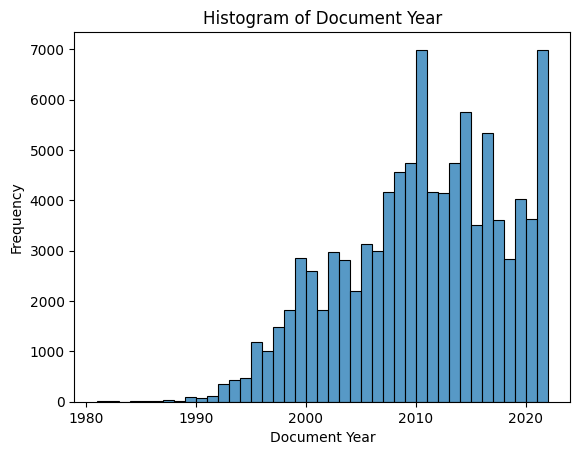

In [ ]:
#Histogram of document_year
sns.histplot(full_ligand_data['document_year'], bins=41, kde=False)
plt.xlabel('Document Year')
plt.ylabel('Frequency')
plt.title('Histogram of Document Year')
plt.show()

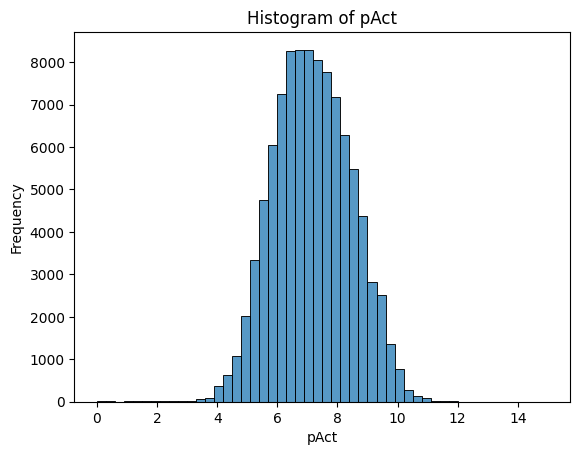

In [ ]:
#Histogram of pAct
sns.histplot(full_ligand_data['pAct'], bins=50, kde=False)
plt.xlabel('pAct')
plt.ylabel('Frequency')
plt.title('Histogram of pAct')
plt.show()

The pAct data is very normally distributed. Wouldn't lend well to turning into a classification problem.

###Creating Different Chemical Representations

In [ ]:
full_ligand_data.rename(columns={'mol': 'SMILES'}, inplace=True)

In [ ]:
full_ligand_data.head()

,molecule_pref_name,SMILES,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor
0,CHEMBL51457,C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]...,369.2,3.368,2,4,1,0,0.360,Ki,B,2012,Serotonin,5HT1A
1,CHEMBL457899,COc1cccc(CCc2ccccc2OCCCN2CCN(CC2)c2cccc(c2)C(F...,498.2,7.026,11,3,0,1,2.542,Ki,B,2008,Serotonin,5HT1A
2,ABT-724,C1CN(CCN1Cc1nc2ccccc2[nH]1)c1ccccn1,293.2,2.686,3,3,1,1,2.556,Ki,B,2004,Serotonin,5HT1A
3,CHEMBL457891,COc1cccc(CCc2ccccc2OCCN2CCN(CC2)c2cccc(c2)C(F)...,484.2,6.722,10,3,0,1,2.851,Ki,B,2008,Serotonin,5HT1A
4,CHEMBL485918,COc1cccc(CCc2ccccc2OCCCCN2CCc3ccccc3C2)c1,415.3,6.748,10,3,0,1,2.876,Ki,B,2008,Serotonin,5HT1A


In [ ]:
#Defining a function to generate fingerprints from chemical SMILES strings
from rdkit import Chem
from rdkit.Chem import AllChem

def generate_fingerprints(smiles_string, radius, n_bits):
    mol = Chem.MolFromSmiles(smiles_string)
    if mol is None:
        return None
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius=radius, nBits=n_bits)
    fingerprint_array = np.array(fingerprint)
    fingerprint_tensor = torch.from_numpy(fingerprint_array).float()
    return fingerprint_tensor


C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]1O)F


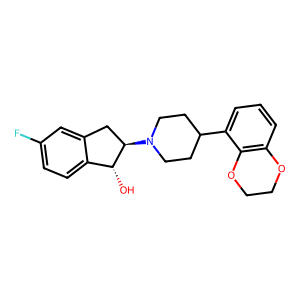

In [ ]:
print(full_ligand_data['SMILES'].iloc[0])
mol = Chem.MolFromSmiles(full_ligand_data['SMILES'].iloc[0])
Draw.MolToImage(mol)

In [ ]:
#Finding the entries in the data with invalid SMILES
invalid_smiles = []

for index, row in full_ligand_data.iterrows():
    mol = Chem.MolFromSmiles(row['SMILES'])
    if mol is None:
        invalid_smiles.append(index)

[04:31:24] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[04:31:24] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:24] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[04:31:24] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:24] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:24] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:24] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:25] Can't kekulize mol.  Unkekulized atoms: 4 11 12
[04:31:25] Ca

In [ ]:
len(invalid_smiles)

240

In [ ]:
#Dropping invalid SMILES data
full_ligand_data.drop(labels = invalid_smiles, axis = 0, inplace = True)

for index, row in full_ligand_data.iterrows():
    mol = Chem.MolFromSmiles(row['SMILES'])
    if mol is None:
        invalid_smiles.append(index)

In [ ]:
len(invalid_smiles)

240

In [ ]:
#Generating ecfp4 and ecfp6 chemical fingerprints
full_ligand_data['ecfp4'] = full_ligand_data['SMILES'].apply(lambda x: generate_fingerprints(x, radius = 2, n_bits = 512))
full_ligand_data['ecfp6'] = full_ligand_data['SMILES'].apply(lambda x: generate_fingerprints(x, radius = 3, n_bits = 1024))

In [ ]:
print(torch.sum(torch.eq(full_ligand_data['ecfp4'].iloc[4], 1)))
print(torch.sum(torch.eq(full_ligand_data['ecfp6'].iloc[4], 1)))

tensor(50)
tensor(77)


In [ ]:
!pip install deepsmiles

In [ ]:
#Defining a function to convert SMILES strings to DeepSMILES strings
import deepsmiles

converter = deepsmiles.Converter(rings=True, branches=True)

def convert_to_deepsmiles(smiles_string):
    try:
        deep_smiles_string = converter.encode(smiles_string)
        return deep_smiles_string
    except deepsmiles.DecodeError as e:
        print(f"Failed to convert SMILES: {smiles_string}")
        return None

# Convert SMILES to DeepSMILES
full_ligand_data['DeepSMILES'] = full_ligand_data['SMILES'].apply(convert_to_deepsmiles)

In [ ]:
pip install selfies

In [ ]:
#Defining a function to convert SMILES strings to SELFIES strings
import selfies

def convert_to_selfies(smiles_string):
    try:
        selfies_string = selfies.encoder(smiles_string)
        return selfies_string
    except Exception as e:
        print(f"Failed to convert SMILES: {smiles_string}")
        print(f"Error: {e}")
        return None

# Convert SMILES to SELFIES
full_ligand_data['SELFIES'] = full_ligand_data['SMILES'].apply(convert_to_selfies)

In [ ]:
#Defining a function that uses Molformer-XL to generate embeddings based on SMILES strings


In [ ]:
full_ligand_data.head()

,molecule_pref_name,SMILES,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor,ecfp4,ecfp6,DeepSMILES,SELFIES
0,CHEMBL51457,C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]...,369.2,3.368,2,4,1,0,0.360,Ki,B,2012,Serotonin,5HT1A,"[tensor(0.), tensor(0.), tensor(0.), tensor(1....","[tensor(0.), tensor(0.), tensor(0.), tensor(1....",CCNCCC6cccccc6OCCO6)))))))))))))[C@@H]Ccccccc6...,[C][C][N][Branch2][Ring1][Ring2][C][C][C][Ring...
1,CHEMBL457899,COc1cccc(CCc2ccccc2OCCCN2CCN(CC2)c2cccc(c2)C(F...,498.2,7.026,11,3,0,1,2.542,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCCNCCNCC6))cccccc6)CF)F)F)))...,[C][O][C][=C][C][=C][C][Branch2][Ring2][O][C][...
2,ABT-724,C1CN(CCN1Cc1nc2ccccc2[nH]1)c1ccccn1,293.2,2.686,3,3,1,1,2.556,Ki,B,2004,Serotonin,5HT1A,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",CCNCCN6Ccncccccc6[nH]9)))))))))))))cccccn6,[C][C][N][Branch2][Ring1][Ring2][C][C][N][Ring...
3,CHEMBL457891,COc1cccc(CCc2ccccc2OCCN2CCN(CC2)c2cccc(c2)C(F)...,484.2,6.722,10,3,0,1,2.851,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCNCCNCC6))cccccc6)CF)F)F))))...,[C][O][C][=C][C][=C][C][Branch2][Ring2][#Branc...
4,CHEMBL485918,COc1cccc(CCc2ccccc2OCCCCN2CCc3ccccc3C2)c1,415.3,6.748,10,3,0,1,2.876,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCCCNCCcccccc6C%10)))))))))))...,[C][O][C][=C][C][=C][C][Branch2][Ring1][=C][C]...


In [ ]:
full_ligand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97451 entries, 0 to 104002
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  97451 non-null  object 
 1   SMILES              97451 non-null  object 
 2   molWeight           97451 non-null  float64
 3   molLogP             97451 non-null  float64
 4   nof_RotB            97451 non-null  int64  
 5   nof_HBA             97451 non-null  int64  
 6   nof_HBD             97451 non-null  int64  
 7   molCharge_total     97451 non-null  int64  
 8   pAct                97451 non-null  float64
 9   standard_type       97451 non-null  object 
 10  assay_type          97451 non-null  object 
 11  document_year       97451 non-null  int64  
 12  Receptor Family     97451 non-null  object 
 13  Receptor            97451 non-null  object 
 14  ecfp4               97451 non-null  object 
 15  ecfp6               97451 non-null  object 
 16  Dee

In [ ]:
#Dropping any duplicates
def drop_duplicates(dup_features, dataset):
  rows_to_drop = []
  indices_duplicated = dataset.duplicated(subset = [dup_features], keep = 'first')

  for i in range(len(indices_duplicated)):
    if indices_duplicated[i] is True:
      rows_to_drop.append[i]

  return dataset.drop(rows_to_drop)

In [ ]:
#full_ligand_data = full_ligand_data.drop_duplicates(['SMILES', 'pAct', 'assay_type', 'document_year', 'Receptor'])
full_ligand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97451 entries, 0 to 104002
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  97451 non-null  object 
 1   SMILES              97451 non-null  object 
 2   molWeight           97451 non-null  float64
 3   molLogP             97451 non-null  float64
 4   nof_RotB            97451 non-null  int64  
 5   nof_HBA             97451 non-null  int64  
 6   nof_HBD             97451 non-null  int64  
 7   molCharge_total     97451 non-null  int64  
 8   pAct                97451 non-null  float64
 9   standard_type       97451 non-null  object 
 10  assay_type          97451 non-null  object 
 11  document_year       97451 non-null  int64  
 12  Receptor Family     97451 non-null  object 
 13  Receptor            97451 non-null  object 
 14  ecfp4               97451 non-null  object 
 15  ecfp6               97451 non-null  object 
 16  Dee

###Molformer-XL Setup

In [ ]:
!pip install Namespace

In [ ]:
from argparse import Namespace
import yaml

with open('/content/drive/MyDrive/Katritch Lab/Molformer-XL/hparams.yaml', 'r') as f:
    config = Namespace(**yaml.safe_load(f))
config

Namespace(accelerator='ddp', batch_size=64, beam_size=0, checkpoint_every=5000, clip_grad=50, config_load=None, config_save=None, d_dropout=0.2, data_path='', data_root='/dccstor/medscan7/smallmolecule/runs/ba-predictor/small-data/affinity', dataset_length=None, dataset_name='sol', debug=True, device='cuda', dropout=0.1, eval_every=1000, fast_dev_run=False, fc_h=512, finetune_path='', freeze_model=False, from_scratch=False, gen_save=None, gpus=8, grad_acc=1, log_file=None, lr=0.001, lr_end=0.00030000000000000003, lr_multiplier=8, lr_start=3e-05, max_epochs=4, max_len=202, measure_name='measure', min_len=1, mode='cls', model_arch='BERT_16GPU_Both_10percent_rotate_no_masking', model_load=None, model_save='model.pt', model_save_dir='./models_dump/', n_batch=1800, n_embd=768, n_head=12, n_jobs=1, n_last=1000, n_layer=12, n_samples=None, n_workers=8, nucleus_thresh=0.9, num_epoch=1, num_feats=32, num_nodes=1, num_seq_returned=0, num_workers=0, pretext_size=0, q_dropout=0.5, restart_path='',

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Katritch Lab/Molformer-XL')

In [ ]:
from smiles_tokenizer import MolTranBertTokenizer

tokenizer = MolTranBertTokenizer('/content/drive/MyDrive/Katritch Lab/Molformer-XL/bert_vocab.txt')
tokenizer.vocab

OrderedDict([('<bos>', 0),
             ('<eos>', 1),
             ('<pad>', 2),
             ('<mask>', 3),
             ('C', 4),
             ('c', 5),
             ('(', 6),
             (')', 7),
             ('1', 8),
             ('O', 9),
             ('N', 10),
             ('2', 11),
             ('=', 12),
             ('n', 13),
             ('3', 14),
             ('[C@H]', 15),
             ('[C@@H]', 16),
             ('F', 17),
             ('S', 18),
             ('4', 19),
             ('Cl', 20),
             ('-', 21),
             ('o', 22),
             ('s', 23),
             ('[nH]', 24),
             ('#', 25),
             ('/', 26),
             ('Br', 27),
             ('[C@]', 28),
             ('[C@@]', 29),
             ('[N+]', 30),
             ('[O-]', 31),
             ('5', 32),
             ('\\', 33),
             ('.', 34),
             ('I', 35),
             ('6', 36),
             ('[S@]', 37),
             ('[S@@]', 38),
             ('P', 39)

In [ ]:
!pip install datasets

In [ ]:
!pip install pytorch-lightning==1.6.4

In [ ]:
!pip install pytorch-fast-transformers

In [ ]:
!rm -rf apex

In [ ]:
%%writefile setup.sh

git clone https://github.com/NVIDIA/apex
cd apex
pip install -v --disable-pip-version-check --no-build-isolation --no-cache-dir ./

Overwriting setup.sh


In [ ]:
!sh setup.sh

Cloning into 'apex'...
remote: Enumerating objects: 11506, done.
remote: Counting objects: 100% (3574/3574), done.
remote: Compressing objects: 100% (494/494), done.
remote: Total 11506 (delta 3250), reused 3183 (delta 3077), pack-reused 7932
Receiving objects: 100% (11506/11506), 15.42 MiB | 17.51 MiB/s, done.
Resolving deltas: 100% (8079/8079), done.
Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
Processing /content/apex
  Running command Preparing metadata (pyproject.toml)


  torch.__version__  = 2.1.0+cu118


  running dist_info
  creating /tmp/pip-modern-metadata-aek_hswc/apex.egg-info
  writing /tmp/pip-modern-metadata-aek_hswc/apex.egg-info/PKG-INFO
  writing dependency_links to /tmp/pip-modern-metadata-aek_hswc/apex.egg-info/dependency_links.txt
  writing requirements to /tmp/pip-modern-metadata-aek_hswc/apex.egg-info/requires.txt
  writing top-level names to /tmp/pip-modern-metadata-aek_hswc/apex.egg-info/top_level.txt
  writing manifest file 

In [ ]:
from train_pubchem_light import LightningModule

ckpt = '/content/drive/MyDrive/Katritch Lab/Molformer-XL/checkpoints/N-Step-Checkpoint_3_30000.ckpt'
lm = LightningModule(config, tokenizer.vocab).load_from_checkpoint(ckpt, config=config, vocab=tokenizer.vocab)
lm

Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding
Using Rotation Embedding


LightningModule(
  (tok_emb): Embedding(2362, 768)
  (drop): Dropout(p=0.2, inplace=False)
  (blocks): TransformerEncoder(
    (layers): ModuleList(
      (0-11): 12 x TransformerEncoderLayer(
        (attention): RotateAttentionLayer(
          (inner_attention): LinearAttention(
            (feature_map): GeneralizedRandomFeatures()
          )
          (query_projection): Linear(in_features=768, out_features=768, bias=True)
          (key_projection): Linear(in_features=768, out_features=768, bias=True)
          (value_projection): Linear(in_features=768, out_features=768, bias=True)
          (out_projection): Linear(in_features=768, out_features=768, bias=True)
          (rotaryemb): RotaryEmbedding()
        )
        (linear1): Linear(in_features=768, out_features=768, bias=True)
        (linear2): Linear(in_features=768, out_features=768, bias=True)
        (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((768,), eps=1e-05, elementwise

In [ ]:
import torch
from fast_transformers.masking import LengthMask as LM

def batch_split(data, batch_size=64):
    i = 0
    while i < len(data):
        yield data[i:min(i+batch_size, len(data))]
        i += batch_size

def embed(model, smiles, tokenizer, batch_size=64):
    model.eval()
    embeddings = []
    for batch in batch_split(smiles, batch_size=batch_size):
        batch_enc = tokenizer.batch_encode_plus(batch, padding=True, add_special_tokens=True)
        idx, mask = torch.tensor(batch_enc['input_ids']), torch.tensor(batch_enc['attention_mask'])
        with torch.no_grad():
            token_embeddings = model.blocks(model.tok_emb(idx), length_mask=LM(mask.sum(-1)))
        # average pooling over tokens
        input_mask_expanded = mask.unsqueeze(-1).expand(token_embeddings.size()).float()
        sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
        sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
        embedding = sum_embeddings / sum_mask
        embeddings.append(embedding.detach().cpu())
    return torch.cat(embeddings)

###Generating SMILES embeddings using Molformer-XL

In [ ]:
def canonicalize_smiles(smiles_string):
    return Chem.MolToSmiles(Chem.MolFromSmiles(smiles_string), canonical=True, isomericSmiles=False)

In [ ]:
smiles_embeddings = embed(lm, full_ligand_data['SMILES'].apply(canonicalize_smiles), tokenizer)

# Convert each row in the array to an individual array and store in a list
embeddings_list = [smiles_embeddings[i] for i in range(len(smiles_embeddings))]

# Assign this list as a new column in your DataFrame
full_ligand_data['Molformer_SMILES'] = embeddings_list

/usr/local/lib/python3.10/dist-packages/fast_transformers/feature_maps/fourier_features.py:37: UserWarning: torch.qr is deprecated in favor of torch.linalg.qr and will be removed in a future PyTorch release.
The boolean parameter 'some' has been replaced with a string parameter 'mode'.
Q, R = torch.qr(A, some)
should be replaced with
Q, R = torch.linalg.qr(A, 'reduced' if some else 'complete') (Triggered internally at ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2426.)
  Q, _ = torch.qr(block)


In [130]:
import pickle

In [148]:
full_ligand_data['Molformer_SMILES'] = full_ligand_data['Molformer_SMILES'].apply(lambda x: x.cpu().numpy())

In [154]:
#Molformer-SMILES Dataset
full_dataset_molformer = full_ligand_data[['SMILES', 'Molformer_SMILES', 'pAct', 'Receptor', 'Receptor Family', 'document_year']]
full_dataset_molformer.to_pickle('/content/drive/MyDrive/Katritch Lab/full_molformer_smiles_noinequalities.pkl')

### Fixing molCharge_total Column

There may be issues with ICM's charge predictor. All of the unique SMILES values will be saved to an '.sdf' file and the charges will be recalculated

In [ ]:
#Retrieving all unique SMILES (Figure this out later)
unique_SMILES = full_ligand_data['SMILES'].unique()
unique_molecules = []

#Converting SMILES to molecules
for SMILES in unique_SMILES:
  mol = Chem.MolFromSmiles(SMILES)
  if mol is not None:
    unique_molecules.append(mol)

#Generating 3D Coordinates for the molecules
for molecule in unique_molecules:
  AllChem.EmbedMolecule(Chem.AddHs(molecule), AllChem.ETKDG())

#Writing the molecules to an sdf file
molecule_writer = Chem.SDWriter('/content/drive/MyDrive/Katritch Lab/unique_aminergic_ligands.sdf')
for molecule in unique_molecules:
  molecule_writer.write(molecule)
molecule_writer.close()

[01:46:33] UFFTYPER: Unrecognized charge state for atom: 16
[01:46:54] UFFTYPER: Unrecognized charge state for atom: 23
[01:47:58] UFFTYPER: Warning: hybridization set to SP3 for atom 28
[01:47:58] UFFTYPER: Warning: hybridization set to SP3 for atom 28
[01:48:03] UFFTYPER: Unrecognized charge state for atom: 21
[01:48:09] UFFTYPER: Unrecognized charge state for atom: 23
[01:48:39] UFFTYPER: Warning: hybridization set to SP3 for atom 26
[01:48:39] UFFTYPER: Warning: hybridization set to SP3 for atom 26
[01:49:15] UFFTYPER: Unrecognized charge state for atom: 13
[01:49:25] UFFTYPER: Warning: hybridization set to SP3 for atom 23
[01:49:25] UFFTYPER: Warning: hybridization set to SP3 for atom 23
[01:51:48] UFFTYPER: Unrecognized charge state for atom: 8
[01:54:16] UFFTYPER: Unrecognized charge state for atom: 8
[01:54:42] UFFTYPER: Unrecognized charge state for atom: 8
[01:54:51] UFFTYPER: Unrecognized charge state for atom: 8
[01:55:10] UFFTYPER: Unrecognized charge state for atom: 8


KeyboardInterrupt: ignored

In [ ]:
#Using RDKit to generate formal charges
def get_formal_charge(SMILES):
  molecule = Chem.MolFromSMILES(SMILES)
  return molecule.GetFormalCharge()

#full_ligand_data['Formal Charge'] = full_ligand_data['SMILES'].apply(get_formal_charge)

In [ ]:
#The test data will consist of entries from the years 2019 and beyond
train_data = full_ligand_data[~full_ligand_data['document_year'].isin([2019, 2020, 2021, 2022])]
test_data = full_ligand_data[full_ligand_data['document_year'].isin([2019, 2020, 2021, 2022])]

In [ ]:
display(train_data.info())
display(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82858 entries, 0 to 104002
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  82858 non-null  object 
 1   SMILES              82858 non-null  object 
 2   molWeight           82858 non-null  float64
 3   molLogP             82858 non-null  float64
 4   nof_RotB            82858 non-null  int64  
 5   nof_HBA             82858 non-null  int64  
 6   nof_HBD             82858 non-null  int64  
 7   molCharge_total     82858 non-null  int64  
 8   pAct                82858 non-null  float64
 9   standard_type       82858 non-null  object 
 10  assay_type          82858 non-null  object 
 11  document_year       82858 non-null  int64  
 12  Receptor Family     82858 non-null  object 
 13  Receptor            82858 non-null  object 
 14  ecfp4               82858 non-null  object 
 15  ecfp6               82858 non-null  object 
 16  Dee

None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14593 entries, 30 to 103910
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  14593 non-null  object 
 1   SMILES              14593 non-null  object 
 2   molWeight           14593 non-null  float64
 3   molLogP             14593 non-null  float64
 4   nof_RotB            14593 non-null  int64  
 5   nof_HBA             14593 non-null  int64  
 6   nof_HBD             14593 non-null  int64  
 7   molCharge_total     14593 non-null  int64  
 8   pAct                14593 non-null  float64
 9   standard_type       14593 non-null  object 
 10  assay_type          14593 non-null  object 
 11  document_year       14593 non-null  int64  
 12  Receptor Family     14593 non-null  object 
 13  Receptor            14593 non-null  object 
 14  ecfp4               14593 non-null  object 
 15  ecfp6               14593 non-null  object 
 16  De

None

### EDA for Numerical Features

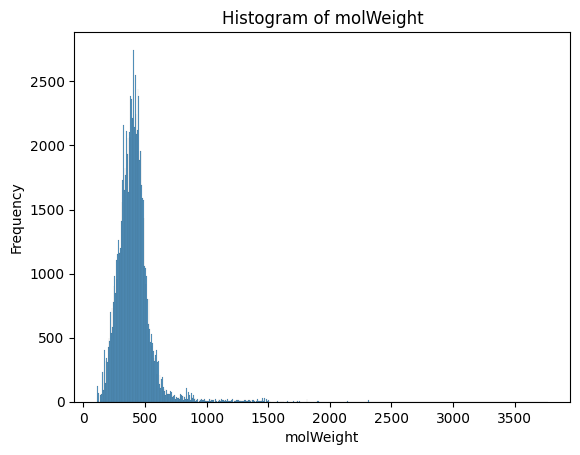

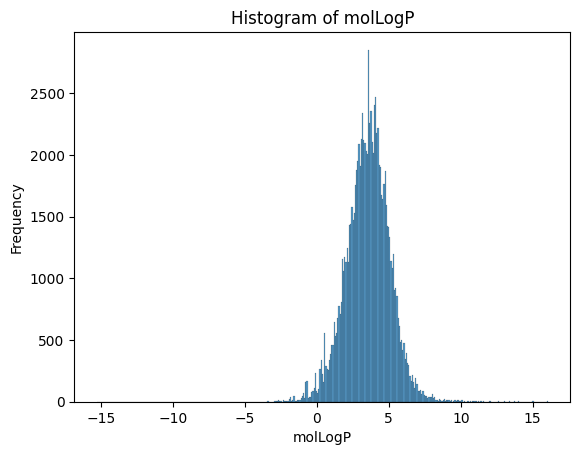

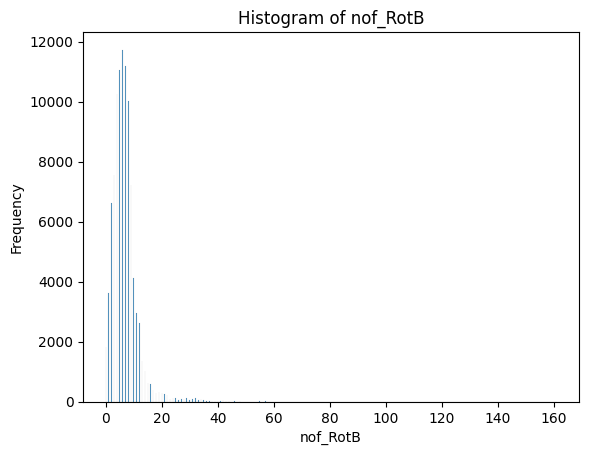

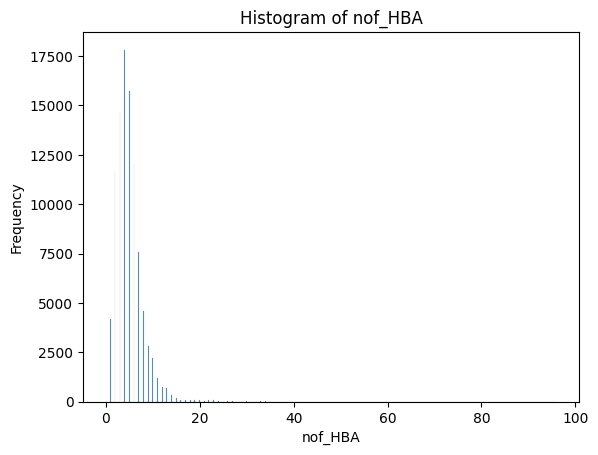

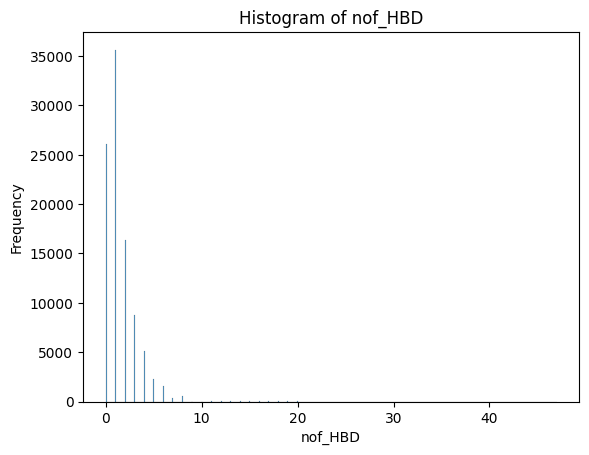

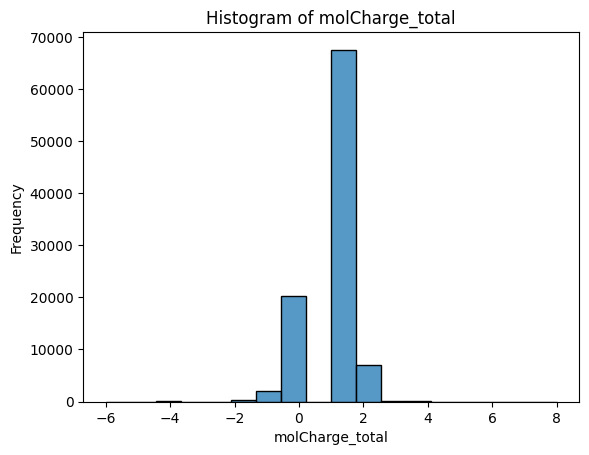

In [ ]:
for feature in ['molWeight', 'molLogP', 'nof_RotB', 'nof_HBA', 'nof_HBD', 'molCharge_total']:
  sns.histplot(full_ligand_data[feature], kde=False)
  plt.xlabel(feature)
  plt.ylabel('Frequency')
  plt.title('Histogram of {}'.format(feature))
  plt.show()

### Preprocessing for Chemical Properties

- molWeight, molLogP, nof_RotB, nof_HBA, nof_HBD, molCharge_total need to be scaled
- assay_type, Receptor Family, and Receptor need to be one encoded

In [ ]:
#One-hot encoding assay_type, Receptor Family, and Receptor (for now they will be split up by receptor)
# train_data = pd.get_dummies(train_data, columns = ['assay_type', 'Receptor Family', 'Receptor'], drop_first = True)
# test_data = pd.get_dummies(test_data, columns = ['assay_type', 'Receptor Family', 'Receptor'], drop_first = True)

# final_columns = train_data.columns
# missing_columns = set(final_columns) - set(test_data.columns)

# for col in missing_columns:
#   test_data[col] = 0

# test_data = test_data[final_columns]

In [ ]:
display(train_data.info(), test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82858 entries, 0 to 104002
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  82858 non-null  object 
 1   SMILES              82858 non-null  object 
 2   molWeight           82858 non-null  float64
 3   molLogP             82858 non-null  float64
 4   nof_RotB            82858 non-null  int64  
 5   nof_HBA             82858 non-null  int64  
 6   nof_HBD             82858 non-null  int64  
 7   molCharge_total     82858 non-null  int64  
 8   pAct                82858 non-null  float64
 9   standard_type       82858 non-null  object 
 10  assay_type          82858 non-null  object 
 11  document_year       82858 non-null  int64  
 12  Receptor Family     82858 non-null  object 
 13  Receptor            82858 non-null  object 
 14  ecfp4               82858 non-null  object 
 15  ecfp6               82858 non-null  object 
 16  Dee

None

None

In [ ]:
train_data.head()

,molecule_pref_name,SMILES,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor,ecfp4,ecfp6,DeepSMILES,SELFIES
0,CHEMBL51457,C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]...,369.2,3.368,2,4,1,0,0.360,Ki,B,2012,Serotonin,5HT1A,"[tensor(0.), tensor(0.), tensor(0.), tensor(1....","[tensor(0.), tensor(0.), tensor(0.), tensor(1....",CCNCCC6cccccc6OCCO6)))))))))))))[C@@H]Ccccccc6...,[C][C][N][Branch2][Ring1][Ring2][C][C][C][Ring...
1,CHEMBL457899,COc1cccc(CCc2ccccc2OCCCN2CCN(CC2)c2cccc(c2)C(F...,498.2,7.026,11,3,0,1,2.542,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCCNCCNCC6))cccccc6)CF)F)F)))...,[C][O][C][=C][C][=C][C][Branch2][Ring2][O][C][...
2,ABT-724,C1CN(CCN1Cc1nc2ccccc2[nH]1)c1ccccn1,293.2,2.686,3,3,1,1,2.556,Ki,B,2004,Serotonin,5HT1A,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",CCNCCN6Ccncccccc6[nH]9)))))))))))))cccccn6,[C][C][N][Branch2][Ring1][Ring2][C][C][N][Ring...
3,CHEMBL457891,COc1cccc(CCc2ccccc2OCCN2CCN(CC2)c2cccc(c2)C(F)...,484.2,6.722,10,3,0,1,2.851,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCNCCNCC6))cccccc6)CF)F)F))))...,[C][O][C][=C][C][=C][C][Branch2][Ring2][#Branc...
4,CHEMBL485918,COc1cccc(CCc2ccccc2OCCCCN2CCc3ccccc3C2)c1,415.3,6.748,10,3,0,1,2.876,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCCCNCCcccccc6C%10)))))))))))...,[C][O][C][=C][C][=C][C][Branch2][Ring1][=C][C]...


In [ ]:
#Scaling molWeight, molLogP, nof_RotB, nof_HBA, nof_HBD, and molCharge_total
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

columns_to_scale = ['molWeight', 'molLogP', 'nof_RotB', 'nof_HBA', 'nof_HBD', 'molCharge_total']

train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])
test_data[columns_to_scale] = scaler.transform(test_data[columns_to_scale])

<ipython-input-167-b940194b1cb1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[columns_to_scale] = scaler.fit_transform(train_data[columns_to_scale])
<ipython-input-167-b940194b1cb1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[columns_to_scale] = scaler.transform(test_data[columns_to_scale])


In [ ]:
train_data.head()

,molecule_pref_name,SMILES,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,assay_type,document_year,Receptor Family,Receptor,ecfp4,ecfp6,DeepSMILES,SELFIES
0,CHEMBL51457,C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]...,-0.213079,-0.121116,-1.00,0.000000,0.0,-1.0,0.360,Ki,B,2012,Serotonin,5HT1A,"[tensor(0.), tensor(0.), tensor(0.), tensor(1....","[tensor(0.), tensor(0.), tensor(0.), tensor(1....",CCNCCC6cccccc6OCCO6)))))))))))))[C@@H]Ccccccc6...,[C][C][N][Branch2][Ring1][Ring2][C][C][C][Ring...
1,CHEMBL457899,COc1cccc(CCc2ccccc2OCCCN2CCN(CC2)c2cccc(c2)C(F...,0.734754,1.805161,1.25,-0.333333,-0.5,0.0,2.542,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCCNCCNCC6))cccccc6)CF)F)F)))...,[C][O][C][=C][C][=C][C][Branch2][Ring2][O][C][...
2,ABT-724,C1CN(CCN1Cc1nc2ccccc2[nH]1)c1ccccn1,-0.771492,-0.480253,-0.75,-0.333333,0.0,0.0,2.556,Ki,B,2004,Serotonin,5HT1A,"[tensor(0.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",CCNCCN6Ccncccccc6[nH]9)))))))))))))cccccn6,[C][C][N][Branch2][Ring1][Ring2][C][C][N][Ring...
3,CHEMBL457891,COc1cccc(CCc2ccccc2OCCN2CCN(CC2)c2cccc(c2)C(F)...,0.631888,1.645076,1.00,-0.333333,-0.5,0.0,2.851,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCNCCNCC6))cccccc6)CF)F)F))))...,[C][O][C][=C][C][=C][C][Branch2][Ring2][#Branc...
4,CHEMBL485918,COc1cccc(CCc2ccccc2OCCCCN2CCc3ccccc3C2)c1,0.125643,1.658768,1.00,-0.333333,-0.5,0.0,2.876,Ki,B,2008,Serotonin,5HT1A,"[tensor(1.), tensor(0.), tensor(0.), tensor(0....","[tensor(0.), tensor(0.), tensor(0.), tensor(0....",COcccccCCcccccc6OCCCCNCCcccccc6C%10)))))))))))...,[C][O][C][=C][C][=C][C][Branch2][Ring1][=C][C]...


### Tokenizing Text Data

In [ ]:
pip install SmilesPE

In [ ]:
#Tokenizing SMILES, SELFIES, and DeepSMILES columns
import codecs
import SmilesPE.pretokenizer as pre
from SmilesPE.tokenizer import *

spe_vocabulary = codecs.open('/content/drive/MyDrive/Katritch Lab/SPE_ChEMBL.txt')
tokenizer = SPE_Tokenizer(spe_vocabulary)

train_data['Tokenized_SMILES'] = train_data['SMILES'].apply(lambda x: tokenizer.tokenize(x))
test_data['Tokenized_SMILES'] = test_data['SMILES'].apply(lambda x: tokenizer.tokenize(x))

train_data['Tokenized_DeepSMILES'] = train_data['DeepSMILES'].apply(lambda x: tokenizer.tokenize(x))
test_data['Tokenized_DeepSMILES'] = test_data['DeepSMILES'].apply(lambda x: tokenizer.tokenize(x))

train_data['Tokenized_SELFIES'] = train_data['SELFIES'].apply(lambda x: tokenizer.tokenize(x))
test_data['Tokenized_SELFIES'] = test_data['SELFIES'].apply(lambda x: tokenizer.tokenize(x))

<ipython-input-170-2bb985536406>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Tokenized_SMILES'] = train_data['SMILES'].apply(lambda x: tokenizer.tokenize(x))
<ipython-input-170-2bb985536406>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Tokenized_SMILES'] = test_data['SMILES'].apply(lambda x: tokenizer.tokenize(x))
<ipython-input-170-2bb985536406>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [ ]:
!pip install gensim

In [ ]:
#Splitting the sequences of tokens
train_data['Split_Tokenized_SMILES'] = train_data['Tokenized_SMILES'].apply(lambda x: x.split())
test_data['Split_Tokenized_SMILES'] = test_data['Tokenized_SMILES'].apply(lambda x: x.split())

train_data['Split_Tokenized_DeepSMILES'] = train_data['Tokenized_DeepSMILES'].apply(lambda x: x.split())
test_data['Split_Tokenized_DeepSMILES'] = test_data['Tokenized_DeepSMILES'].apply(lambda x: x.split())

train_data['Split_Tokenized_SELFIES'] = train_data['Tokenized_SELFIES'].apply(lambda x: x.split())
test_data['Split_Tokenized_SELFIES'] = test_data['Tokenized_SELFIES'].apply(lambda x: x.split())

<ipython-input-172-d6b8a7bc813e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Split_Tokenized_SMILES'] = train_data['Tokenized_SMILES'].apply(lambda x: x.split())
<ipython-input-172-d6b8a7bc813e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Split_Tokenized_SMILES'] = test_data['Tokenized_SMILES'].apply(lambda x: x.split())
<ipython-input-172-d6b8a7bc813e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [ ]:
train_data['Split_Tokenized_SMILES'].head()

0    [C1CN(, CCC1, c1cccc2c1, OCCO2), [C@@H]1, Cc2c...
1    [COc1cccc(, CC, c2ccccc2, OCC, CN2CCN(, CC2), ...
2      [C1CN(, CCN1, Cc1n, c2ccccc2, [nH]1), c1ccccn1]
3    [COc1cccc(, CC, c2ccccc2, OCC, N2CCN(, CC2), c...
4    [COc1cccc(, CC, c2ccccc2, OCCCC, N2CC, c3ccccc...
Name: Split_Tokenized_SMILES, dtype: object

In [ ]:
train_data['Split_Tokenized_DeepSMILES'].head()

0    [CCN, CCC, 6, cccc, cc, 6, OCCO, 6), ), ), ), ...
1    [CO, cccc, c, CC, cccc, cc, 6, OCC, CN, CCN, C...
2    [CCN, CCN, 6, C, cn, cccc, cc, 6, [nH], 9, ), ...
3    [CO, cccc, c, CC, cccc, cc, 6, OCCN, CCN, CC, ...
4    [CO, cccc, c, CC, cccc, cc, 6, OCCCC, NCC, ccc...
Name: Split_Tokenized_DeepSMILES, dtype: object

In [ ]:
train_data['Split_Tokenized_SELFIES'].head()

0    [[C], [C], [N], [Branch2], [Ring1], [Ring2], [...
1    [[C], [O], [C], [=C], [C], [=C], [C], [Branch2...
2    [[C], [C], [N], [Branch2], [Ring1], [Ring2], [...
3    [[C], [O], [C], [=C], [C], [=C], [C], [Branch2...
4    [[C], [O], [C], [=C], [C], [=C], [C], [Branch2...
Name: Split_Tokenized_SELFIES, dtype: object

In [ ]:
#Defining a function to train a Word2Vec model and vectorize the data
import gensim
from gensim.models import Word2Vec

def train_and_vectorize(sentences, vector_size=100):
    model = Word2Vec(sentences=sentences, vector_size=vector_size, window=5, min_count=1, workers=4)
    vectorized_data = sentences.apply(lambda x: np.mean([model.wv[word] for word in x if word in model.wv], axis=0) if x else None)
    return model, vectorized_data

In [ ]:
#Defining a new function that trains a Word2Vec model and vectorizes the data.
#Unlike the previous function. It creates a tensor of the token embeddings rather than averaging them
import gensim
from gensim.models import Word2Vec

def train_and_vectorize(sentences, vector_size=100):
    # Train the Word2Vec model
    model = Word2Vec(sentences=sentences, vector_size=vector_size, window=5, min_count=1, workers=4)

    # Vectorize the sentences
    vectorized_data = []
    for sentence in sentences:
        vectorized_sentence = []
        for word in sentence:
            if word in model.wv:
                vectorized_sentence.append(model.wv[word])
        # Convert the list of vectors for this sentence into a tensor
        if vectorized_sentence:
            vectorized_sentence = torch.tensor(vectorized_sentence)
        else:
            # Handle empty sentences by creating a zero tensor
            vectorized_sentence = torch.zeros(1, vector_size)
        vectorized_data.append(vectorized_sentence)

    return model, vectorized_data


In [ ]:
#Accepts trained word2vec model
#Apply to tokenized SMILES/DeepSMILES/SELFIES test data to generate vectors
def vectorize_data(data, word2vec_model, vector_size=100):
    vectorized_data = []
    for sentence in data:
        vectorized_sentence = []
        for word in sentence:
            if word in word2vec_model.wv:
                vectorized_sentence.append(word2vec_model.wv[word])
        # Convert the list of vectors for this sentence into a tensor
        if vectorized_sentence:
            vectorized_sentence = torch.tensor(vectorized_sentence)
        else:
            # Handle empty sentences by creating a zero tensor
            vectorized_sentence = torch.zeros(1, vector_size)
        vectorized_data.append(vectorized_sentence)

    return vectorized_data

In [ ]:
#Vectorizing SMILES data
smiles_model, train_vectorized_smiles = train_and_vectorize(train_data['Split_Tokenized_SMILES'])
test_vectorized_smiles = vectorize_data(test_data['Split_Tokenized_SMILES'], smiles_model)

train_data['Vectorized_SMILES'] = train_vectorized_smiles
test_data['Vectorized_SMILES'] = test_vectorized_smiles

<ipython-input-177-a1ccfee4a1e4>:19: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  vectorized_sentence = torch.tensor(vectorized_sentence)
<ipython-input-179-9600feddff87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Vectorized_SMILES'] = train_vectorized_smiles
<ipython-input-179-9600feddff87>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
#Vectorizing SMILES data
#smiles_model, train_vectorized_smiles = train_and_vectorize(train_data['Split_Tokenized_SMILES'])
#test_vectorized_smiles = test_data['Split_Tokenized_SMILES'].apply(lambda x: np.mean([smiles_model.wv[word] for word in x if word in smiles_model.wv], axis=0) if x else None)
#
#train_data['Vectorized_SMILES'] = train_vectorized_smiles
#test_data['Vectorized_SMILES'] = test_vectorized_smiles

In [ ]:
#Vectorizing DeepSMILES data
deepsmiles_model, train_vectorized_deepsmiles = train_and_vectorize(train_data['Split_Tokenized_DeepSMILES'])
test_vectorized_deepsmiles = vectorize_data(test_data['Split_Tokenized_DeepSMILES'], deepsmiles_model)

train_data['Vectorized_DeepSMILES'] = train_vectorized_deepsmiles
test_data['Vectorized_DeepSMILES'] = test_vectorized_deepsmiles

<ipython-input-181-160f9eb23634>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Vectorized_DeepSMILES'] = train_vectorized_deepsmiles
<ipython-input-181-160f9eb23634>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Vectorized_DeepSMILES'] = test_vectorized_deepsmiles


In [ ]:
#Vectorizing DeepSMILES data
#deepsmiles_model, train_vectorized_deepsmiles = train_and_vectorize(train_data['Split_Tokenized_DeepSMILES'])
#test_vectorized_deepsmiles = test_data['Split_Tokenized_DeepSMILES'].apply(lambda x: np.mean([deepsmiles_model.wv[word] for word in x if word in deepsmiles_model.wv], axis=0) if x else None)
#
#train_data['Vectorized_DeepSMILES'] = train_vectorized_deepsmiles
#test_data['Vectorized_DeepSMILES'] = test_vectorized_deepsmiles

In [ ]:
#Vectorizing SELFIES data
selfies_model, train_vectorized_selfies = train_and_vectorize(train_data['Split_Tokenized_SELFIES'])
test_vectorized_selfies = vectorize_data(test_data['Split_Tokenized_SELFIES'], selfies_model)

train_data['Vectorized_SELFIES'] = train_vectorized_selfies
test_data['Vectorized_SELFIES'] = test_vectorized_selfies

<ipython-input-183-624aac687dbc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Vectorized_SELFIES'] = train_vectorized_selfies
<ipython-input-183-624aac687dbc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Vectorized_SELFIES'] = test_vectorized_selfies


In [ ]:
#Vectorizing SELFIES data
#selfies_model, train_vectorized_selfies = train_and_vectorize(train_data['Split_Tokenized_SELFIES'])
#test_vectorized_selfies = test_data['Split_Tokenized_SELFIES'].apply(lambda x: np.mean([selfies_model.wv[word] for word in x if word in selfies_model.wv], axis=0) if x else None)
#
#train_data['Vectorized_SELFIES'] = train_vectorized_selfies
#test_data['Vectorized_SELFIES'] = test_vectorized_selfies

In [ ]:
train_data.head()

,molecule_pref_name,SMILES,molWeight,molLogP,nof_RotB,nof_HBA,nof_HBD,molCharge_total,pAct,standard_type,...,SELFIES,Tokenized_SMILES,Tokenized_DeepSMILES,Tokenized_SELFIES,Split_Tokenized_SMILES,Split_Tokenized_DeepSMILES,Split_Tokenized_SELFIES,Vectorized_SMILES,Vectorized_DeepSMILES,Vectorized_SELFIES
0,CHEMBL51457,C1CN(CCC1c1cccc2c1OCCO2)[C@@H]1Cc2cc(ccc2[C@H]...,-0.213079,-0.121116,-1.00,0.000000,0.0,-1.0,0.360,Ki,...,[C][C][N][Branch2][Ring1][Ring2][C][C][C][Ring...,C1CN( CCC1 c1cccc2c1 OCCO2) [C@@H]1 Cc2cc( ccc...,CCN CCC 6 cccc cc 6 OCCO 6) ) ) ) ) ) ) ) ) ) ...,[C] [C] [N] [Branch2] [Ring1] [Ring2] [C] [C] ...,"[C1CN(, CCC1, c1cccc2c1, OCCO2), [C@@H]1, Cc2c...","[CCN, CCC, 6, cccc, cc, 6, OCCO, 6), ), ), ), ...","[[C], [C], [N], [Branch2], [Ring1], [Ring2], [...","[[tensor(1.1382), tensor(-0.5524), tensor(-0.1...","[[tensor(1.0867), tensor(-0.6292), tensor(-0.1...","[[tensor(0.4282), tensor(0.4588), tensor(0.010..."
1,CHEMBL457899,COc1cccc(CCc2ccccc2OCCCN2CCN(CC2)c2cccc(c2)C(F...,0.734754,1.805161,1.25,-0.333333,-0.5,0.0,2.542,Ki,...,[C][O][C][=C][C][=C][C][Branch2][Ring2][O][C][...,COc1cccc( CC c2ccccc2 OCC CN2CCN( CC2) c2cccc(...,CO cccc c CC cccc cc 6 OCC CN CCN CC 6) ) cccc...,[C] [O] [C] [=C] [C] [=C] [C] [Branch2] [Ring2...,"[COc1cccc(, CC, c2ccccc2, OCC, CN2CCN(, CC2), ...","[CO, cccc, c, CC, cccc, cc, 6, OCC, CN, CCN, C...","[[C], [O], [C], [=C], [C], [=C], [C], [Branch2...","[[tensor(1.3589), tensor(0.8884), tensor(0.069...","[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...","[[tensor(0.4282), tensor(0.4588), tensor(0.010..."
2,ABT-724,C1CN(CCN1Cc1nc2ccccc2[nH]1)c1ccccn1,-0.771492,-0.480253,-0.75,-0.333333,0.0,0.0,2.556,Ki,...,[C][C][N][Branch2][Ring1][Ring2][C][C][N][Ring...,C1CN( CCN1 Cc1n c2ccccc2 [nH]1) c1ccccn1,CCN CCN 6 C cn cccc cc 6 [nH] 9 ) ) ) ) ) ) ) ...,[C] [C] [N] [Branch2] [Ring1] [Ring2] [C] [C] ...,"[C1CN(, CCN1, Cc1n, c2ccccc2, [nH]1), c1ccccn1]","[CCN, CCN, 6, C, cn, cccc, cc, 6, [nH], 9, ), ...","[[C], [C], [N], [Branch2], [Ring1], [Ring2], [...","[[tensor(1.1382), tensor(-0.5524), tensor(-0.1...","[[tensor(1.0867), tensor(-0.6292), tensor(-0.1...","[[tensor(0.4282), tensor(0.4588), tensor(0.010..."
3,CHEMBL457891,COc1cccc(CCc2ccccc2OCCN2CCN(CC2)c2cccc(c2)C(F)...,0.631888,1.645076,1.00,-0.333333,-0.5,0.0,2.851,Ki,...,[C][O][C][=C][C][=C][C][Branch2][Ring2][#Branc...,COc1cccc( CC c2ccccc2 OCC N2CCN( CC2) c2cccc( ...,CO cccc c CC cccc cc 6 OCCN CCN CC 6) ) cccc c...,[C] [O] [C] [=C] [C] [=C] [C] [Branch2] [Ring2...,"[COc1cccc(, CC, c2ccccc2, OCC, N2CCN(, CC2), c...","[CO, cccc, c, CC, cccc, cc, 6, OCCN, CCN, CC, ...","[[C], [O], [C], [=C], [C], [=C], [C], [Branch2...","[[tensor(1.3589), tensor(0.8884), tensor(0.069...","[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...","[[tensor(0.4282), tensor(0.4588), tensor(0.010..."
4,CHEMBL485918,COc1cccc(CCc2ccccc2OCCCCN2CCc3ccccc3C2)c1,0.125643,1.658768,1.00,-0.333333,-0.5,0.0,2.876,Ki,...,[C][O][C][=C][C][=C][C][Branch2][Ring1][=C][C]...,COc1cccc( CC c2ccccc2 OCCCC N2CC c3ccccc3 C2)c1,CO cccc c CC cccc cc 6 OCCCC NCC cccc cc 6 C %...,[C] [O] [C] [=C] [C] [=C] [C] [Branch2] [Ring1...,"[COc1cccc(, CC, c2ccccc2, OCCCC, N2CC, c3ccccc...","[CO, cccc, c, CC, cccc, cc, 6, OCCCC, NCC, ccc...","[[C], [O], [C], [=C], [C], [=C], [C], [Branch2...","[[tensor(1.3589), tensor(0.8884), tensor(0.069...","[[tensor(1.6786), tensor(-2.3740), tensor(-0.8...","[[tensor(0.4282), tensor(0.4588), tensor(0.010..."


### Preparing Different Training and Testing Datasets

In [ ]:
full_ligand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97451 entries, 0 to 104002
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_pref_name  97451 non-null  object 
 1   SMILES              97451 non-null  object 
 2   molWeight           97451 non-null  float64
 3   molLogP             97451 non-null  float64
 4   nof_RotB            97451 non-null  int64  
 5   nof_HBA             97451 non-null  int64  
 6   nof_HBD             97451 non-null  int64  
 7   molCharge_total     97451 non-null  int64  
 8   pAct                97451 non-null  float64
 9   standard_type       97451 non-null  object 
 10  assay_type          97451 non-null  object 
 11  document_year       97451 non-null  int64  
 12  Receptor Family     97451 non-null  object 
 13  Receptor            97451 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 11.2+ MB


In [ ]:
train_data.columns

Index(['molecule_pref_name', 'SMILES', 'molWeight', 'molLogP', 'nof_RotB',
       'nof_HBA', 'nof_HBD', 'molCharge_total', 'pAct', 'standard_type',
       'assay_type', 'document_year', 'Receptor Family', 'Receptor', 'ecfp4',
       'ecfp6', 'DeepSMILES', 'SELFIES', 'Tokenized_SMILES',
       'Tokenized_DeepSMILES', 'Tokenized_SELFIES', 'Split_Tokenized_SMILES',
       'Split_Tokenized_DeepSMILES', 'Split_Tokenized_SELFIES',
       'Vectorized_SMILES', 'Vectorized_DeepSMILES', 'Vectorized_SELFIES'],
      dtype='object')

In [ ]:
import pickle

In [ ]:
#Chemical Properties dataset
#chem_data_train = train_data.drop(columns = ['molecule_pref_name', 'SMILES', 'standard_type', 'document_year', 'ecfp4', 'ecfp6',
#                                             'DeepSMILES', 'SELFIES', 'Tokenized_SMILES', 'Tokenized_DeepSMILES', 'Tokenized_SELFIES', 'Split_Tokenized_SMILES',
#                                             'Split_Tokenized_DeepSMILES', 'Split_Tokenized_SELFIES', 'Vectorized_SMILES', 'Vectorized_DeepSMILES', 'Vectorized_SELFIES'])

#chem_data_test = test_data.drop(columns = ['molecule_pref_name', 'SMILES', 'standard_type', 'document_year', 'ecfp4', 'ecfp6',
#                                             'DeepSMILES', 'SELFIES', 'Tokenized_SMILES', 'Tokenized_DeepSMILES', 'Tokenized_SELFIES', 'Split_Tokenized_SMILES',
#                                             'Split_Tokenized_DeepSMILES', 'Split_Tokenized_SELFIES', 'Vectorized_SMILES', 'Vectorized_DeepSMILES', 'Vectorized_SELFIES'])

chem_data_train = train_data.drop(columns = ['molecule_pref_name', 'SMILES', 'standard_type', 'document_year', 'ecfp4', 'ecfp6'])

chem_data_test = test_data.drop(columns = ['molecule_pref_name', 'SMILES', 'standard_type', 'document_year', 'ecfp4', 'ecfp6'])


#chem_data_train.to_pickle('/content/drive/MyDrive/Katritch Lab/chem_data_train.pkl')
#chem_data_test.to_pickle('/content/drive/MyDrive/Katritch Lab/chem_data_test.pkl')

In [ ]:
chem_data_train.columns

Index(['molWeight', 'molLogP', 'nof_RotB', 'nof_HBA', 'nof_HBD',
       'molCharge_total', 'pAct', 'assay_type', 'Receptor Family', 'Receptor',
       'DeepSMILES', 'SELFIES', 'Tokenized_SMILES', 'Tokenized_DeepSMILES',
       'Tokenized_SELFIES', 'Split_Tokenized_SMILES',
       'Split_Tokenized_DeepSMILES', 'Split_Tokenized_SELFIES',
       'Vectorized_SMILES', 'Vectorized_DeepSMILES', 'Vectorized_SELFIES'],
      dtype='object')

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = chem_data_train.drop(columns = ['pAct'])
y_train = chem_data_train['pAct']

model = LinearRegression()
model.fit(X_train, y_train)

ValueError: ignored

In [ ]:
#SMILES dataset
smiles_train = train_data[['Vectorized_SMILES', 'pAct', 'Receptor', 'Receptor Family']]
smiles_test = test_data[['Vectorized_SMILES', 'pAct', 'Receptor', 'Receptor Family']]

smiles_train.to_pickle('/content/drive/MyDrive/Katritch Lab/smiles_train_good_noinequalities.pkl')
smiles_test.to_pickle('/content/drive/MyDrive/Katritch Lab/smiles_test_good_noinequalities.pkl')

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.array(smiles_train['Vectorized_SMILES'].tolist())
y_train = smiles_train['pAct']

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
#DeepSMILES dataset
deepsmiles_train = train_data[['Vectorized_DeepSMILES', 'pAct', 'Receptor', 'Receptor Family']]
deepsmiles_test = test_data[['Vectorized_DeepSMILES', 'pAct', 'Receptor', 'Receptor Family']]

deepsmiles_train.to_pickle('/content/drive/MyDrive/Katritch Lab/deepsmiles_train_good_noinequalities.pkl')
deepsmiles_test.to_pickle('/content/drive/MyDrive/Katritch Lab/deepsmiles_test_good_noinequalities.pkl')

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.array(deepsmiles_train['Vectorized_DeepSMILES'].tolist())
y_train = deepsmiles_train['pAct']

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
#SELFIES dataset
selfies_train = train_data[['Vectorized_SELFIES', 'pAct', 'Receptor', 'Receptor Family']]
selfies_test = test_data[['Vectorized_SELFIES', 'pAct', 'Receptor', 'Receptor Family']]

selfies_train.to_pickle('/content/drive/MyDrive/Katritch Lab/selfies_train_good_noinequalities.pkl')
selfies_test.to_pickle('/content/drive/MyDrive/Katritch Lab/selfies_test_good_noinequalities.pkl')

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.array(selfies_train['Vectorized_SELFIES'].tolist())
y_train = selfies_train['pAct']

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
#ecfp4 dataset
ecfp4_train = train_data[['ecfp4', 'pAct', 'Receptor', 'Receptor Family']]
ecfp4_test = test_data[['ecfp4', 'pAct', 'Receptor', 'Receptor Family']]

ecfp4_train.to_pickle('/content/drive/MyDrive/Katritch Lab/ecfp4_512_train.pkl')
ecfp4_test.to_pickle('/content/drive/MyDrive/Katritch Lab/ecfp4_512_test.pkl')

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.array([[tensor.item() for tensor in sample] for sample in ecfp4_train['ecfp4']])
y_train = ecfp4_train['pAct']

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
X_train

In [ ]:
#ecfp6 dataset
ecfp6_train = train_data[['ecfp6', 'pAct', 'Receptor', 'Receptor Family']]
ecfp6_test = test_data[['ecfp6', 'pAct', 'Receptor', 'Receptor Family']]

ecfp6_train.to_pickle('/content/drive/MyDrive/Katritch Lab/ecfp6_1024_train.pkl')
ecfp6_test.to_pickle('/content/drive/MyDrive/Katritch Lab/ecfp6_1024_test.pkl')

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.array([[tensor.item() for tensor in sample] for sample in ecfp6_train['ecfp6']])
y_train = ecfp6_train['pAct']

model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
X_test = np.array([[tensor.item() for tensor in sample] for sample in ecfp6_test['ecfp6']])
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(ecfp6_test['pAct'], y_preds)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ecfp6_test['pAct'], y_preds))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


In [ ]:
plt.scatter(ecfp6_test['pAct'], y_preds, color='blue', label='Predictions')
plt.plot([min(ecfp6_test['pAct']), max(ecfp6_test['pAct'])], [min(ecfp6_test['pAct']), max(ecfp6_test['pAct'])], color='red', linestyle='--', label='Perfect Prediction Line')

# Labeling the plot
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear', C=1, epsilon=0.1)
model.fit(X_train, y_train)

In [ ]:
X_test = np.array([[tensor.item() for tensor in sample] for sample in ecfp6_test['ecfp6']])
y_preds = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R-squared
r2 = r2_score(ecfp6_test['pAct'], y_preds)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ecfp6_test['pAct'], y_preds))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")